# IMPORT LIBRARY

In [47]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns 
import math

# IMPORT MODEL

In [48]:
from FFNN_basic_class import Layer, FFNN

# LOAD DATA

In [49]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = y.astype(np.uint8)

In [50]:
X.shape

(70000, 784)

In [51]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, train_size=65000, test_size=5000, stratify=y, random_state=42)

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, train_size=0.8, stratify=y_train_full, random_state=42)

In [53]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# MODEL TESTING

## Test Class Layer and FFNN

In [54]:
model_ffnn = FFNN(
    loss='cce',
    batch_size=200,
    learning_rate=0.01,
    epochs=5,
    verbose=1,
    l1_lambda=0.1, 
    l2_lambda=0.1
)

In [55]:
model_ffnn.build_layers(
    Layer(n_neurons=2, init='zero', activation='linear', use_rmsnorm=True),
    Layer(n_neurons=2, init='uniform', activation='relu', init_params={'lower': -0.5, 'upper': 0.5}),
    Layer(n_neurons=2, init='normal', activation='tanh', init_params={'mean': 0, 'variance': 0.01}),
    Layer(n_neurons=2, init='xavier_normal', activation='softmax'),
    Layer(n_neurons=2, init='xavier_uniform', activation='leaky_relu'),
    Layer(n_neurons=2, init='he_normal', activation='elu'),
    Layer(n_neurons=10, init='he_uniform', activation='sigmoid')
)

In [56]:
model_ffnn.fit(X_train, y_train)

Epoch 1/5: 100%|██████████| 52000/52000 [00:00<00:00, 198713.72sample/s]


Epoch 1/5 - Train Loss: 2.4699, Val Loss: 2.4697


Epoch 2/5: 100%|██████████| 52000/52000 [00:00<00:00, 195775.60sample/s]


Epoch 2/5 - Train Loss: 1.9206, Val Loss: 1.9200


Epoch 3/5: 100%|██████████| 52000/52000 [00:00<00:00, 199930.71sample/s]


Epoch 3/5 - Train Loss: 1.8238, Val Loss: 1.8236


Epoch 4/5: 100%|██████████| 52000/52000 [00:00<00:00, 224068.97sample/s]


Epoch 4/5 - Train Loss: 1.8519, Val Loss: 1.8517


Epoch 5/5: 100%|██████████| 52000/52000 [00:00<00:00, 207533.31sample/s]


Epoch 5/5 - Train Loss: 1.9322, Val Loss: 1.9319


In [57]:
y_pred = model_ffnn.predict(X_test)
for h in y_pred:
    max_index = np.argmax(h)
    print(max_index)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## Test Load and Save

In [58]:
model_ffnn.save('model_ffnn.pkl')

Model saved to model_ffnn.pkl


In [59]:
loaded_model = FFNN.load('model_ffnn.pkl')

Model loaded from model_ffnn.pkl


In [60]:
y_pred = loaded_model.predict(X_test)
for h in y_pred:
    max_index = np.argmax(h)
    print(max_index)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [61]:
y_test

array([2, 9, 0, ..., 4, 7, 7], dtype=uint8)

## Test Visualization

In [62]:
# loaded_model.visualize_architecture()

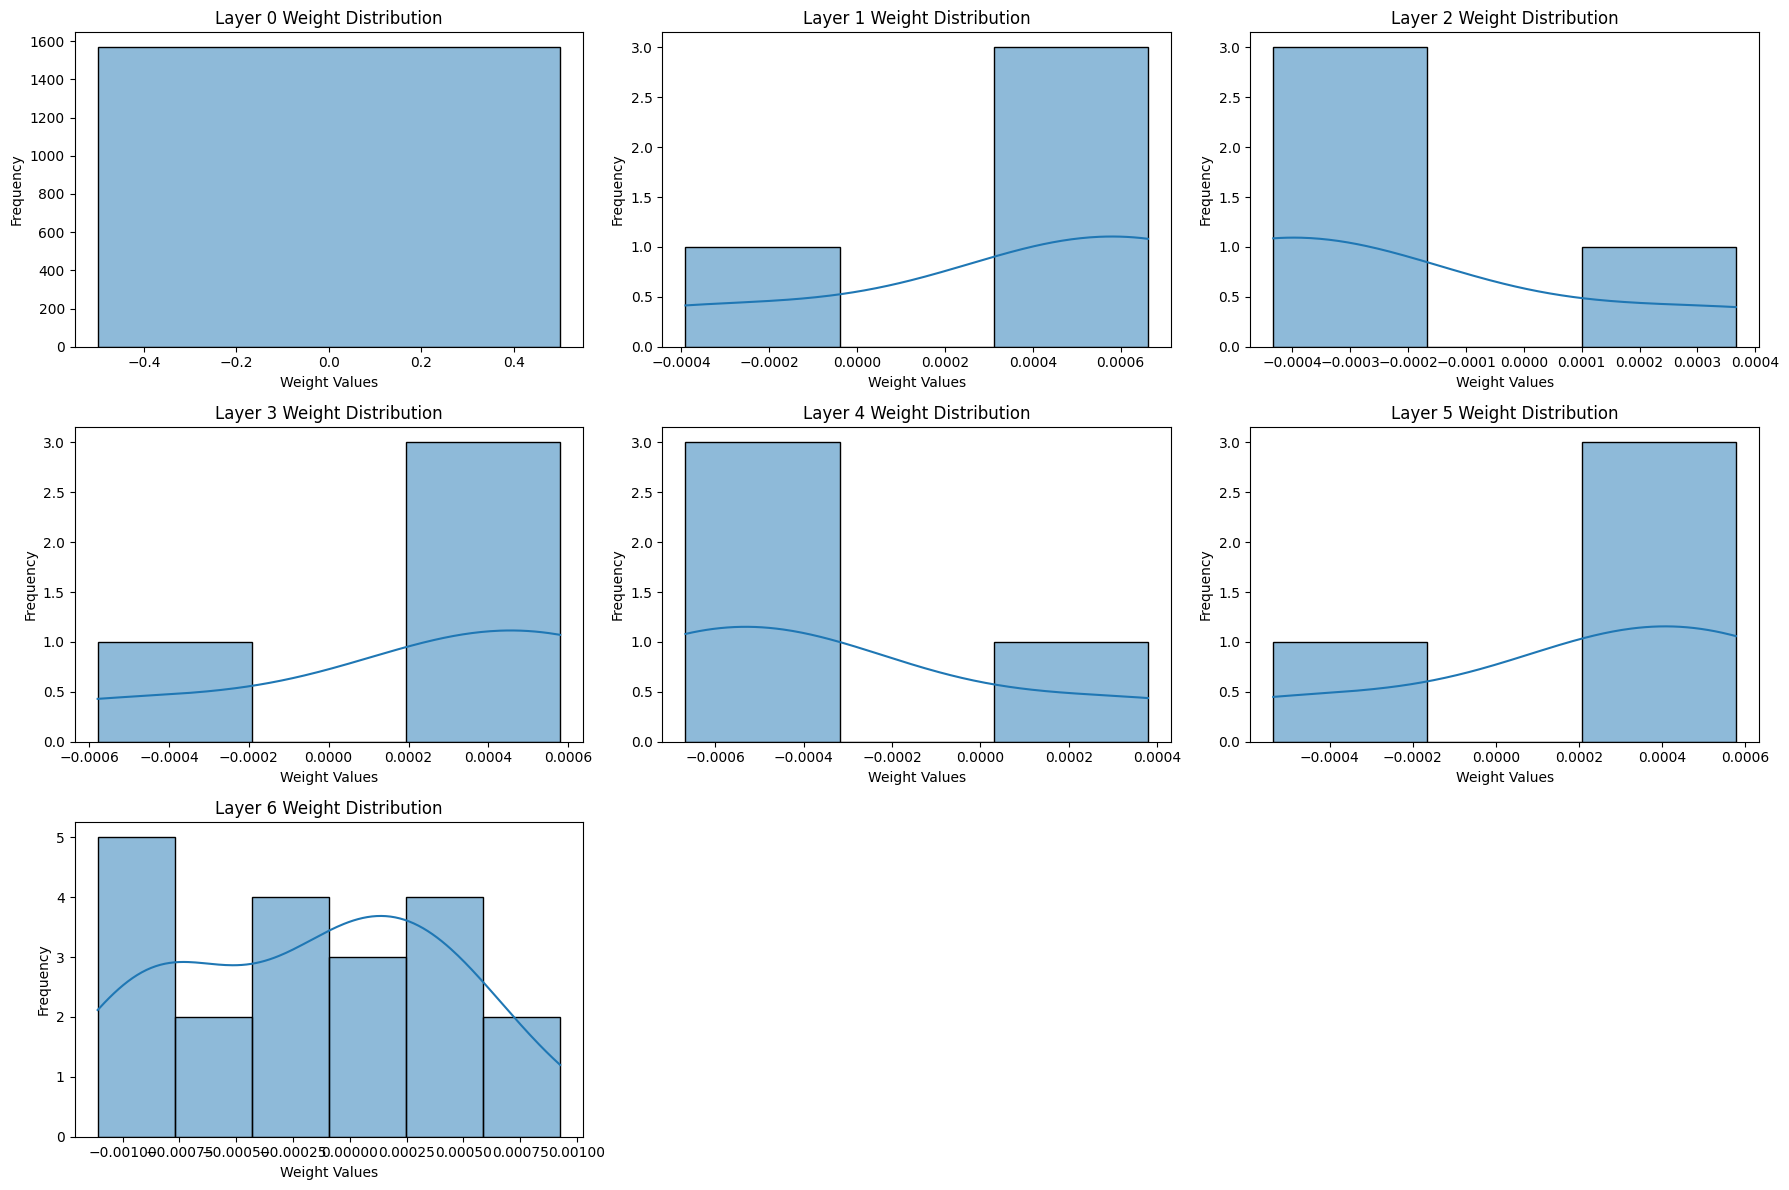

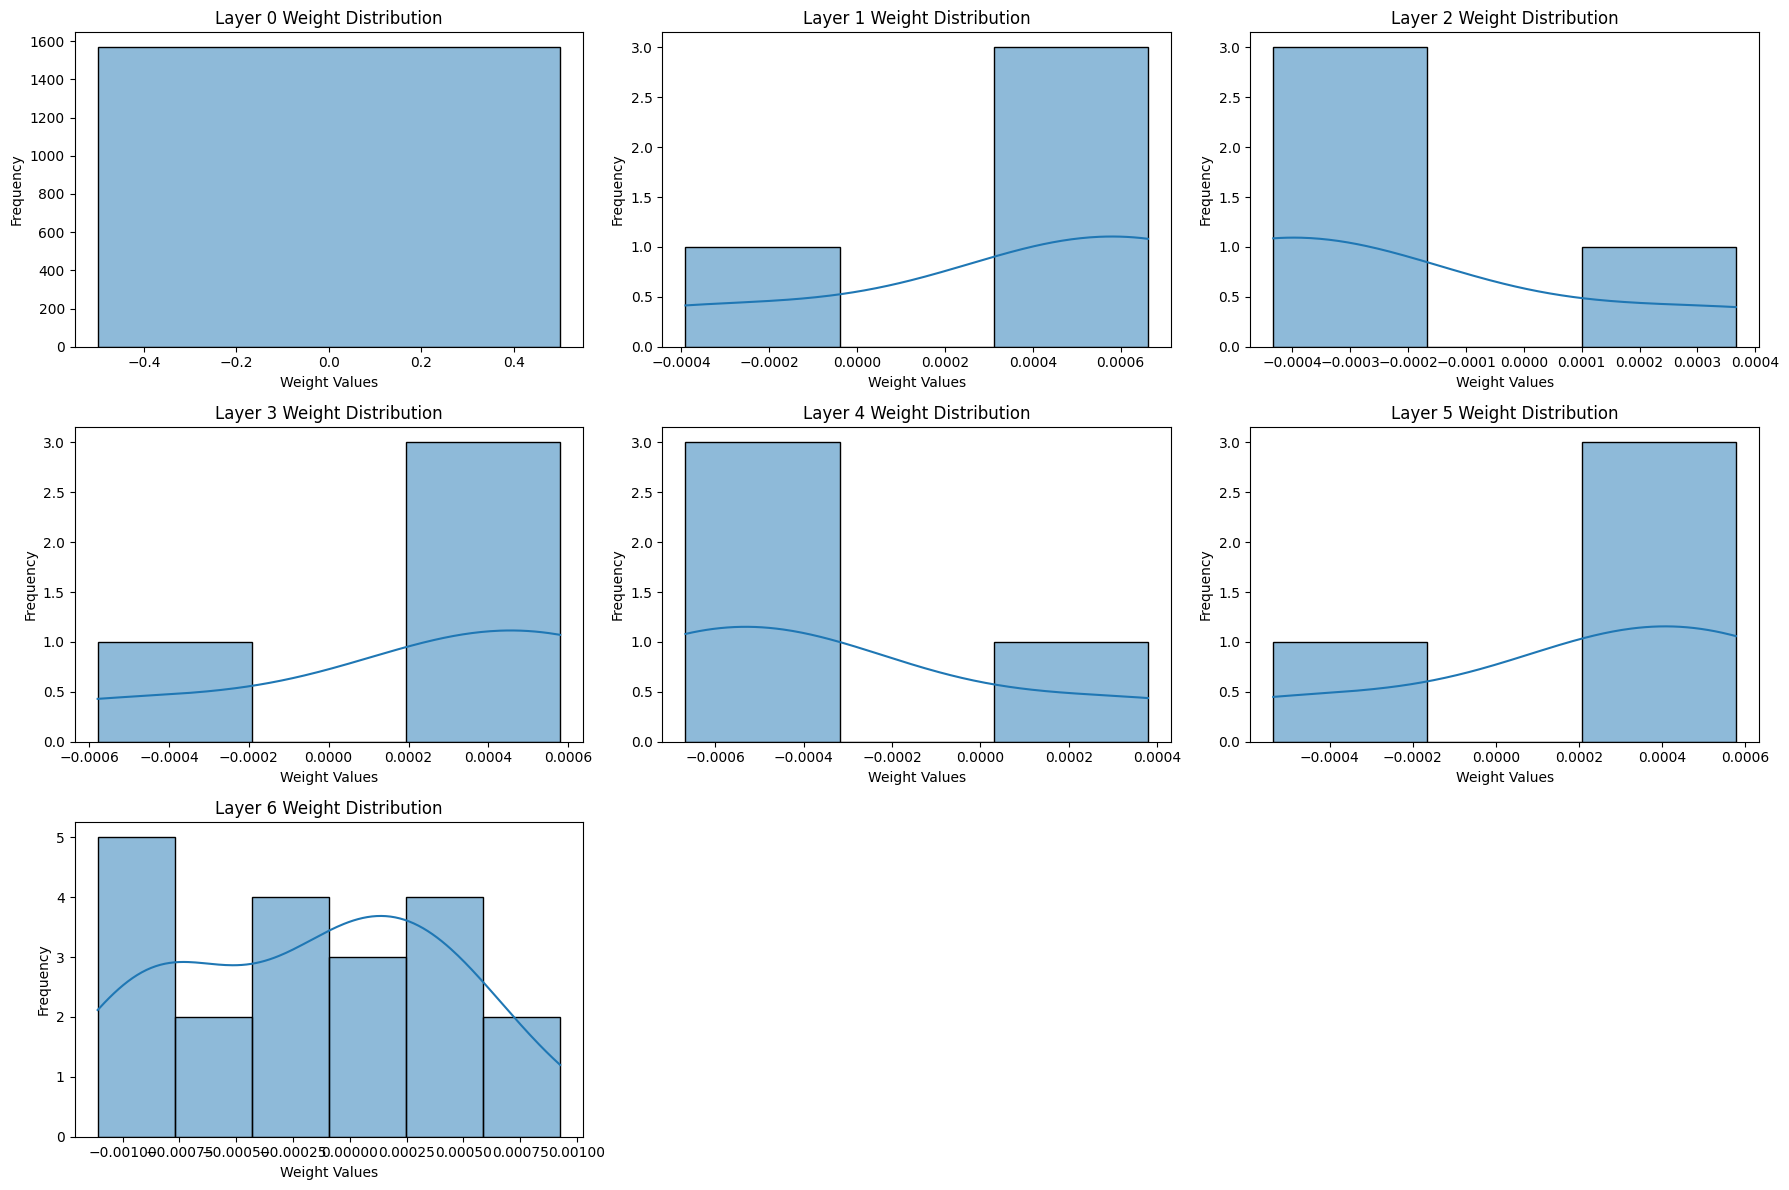

In [63]:
loaded_model.plot_weight_distribution()

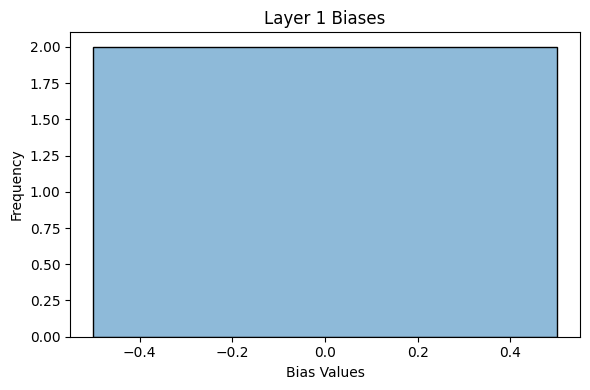

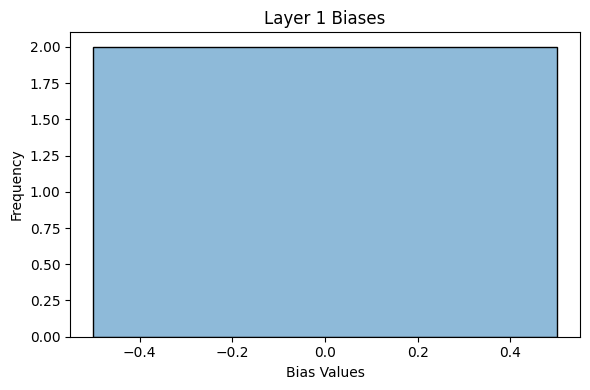

In [64]:
loaded_model.plot_biases_distribution(layers_to_plot=[1])

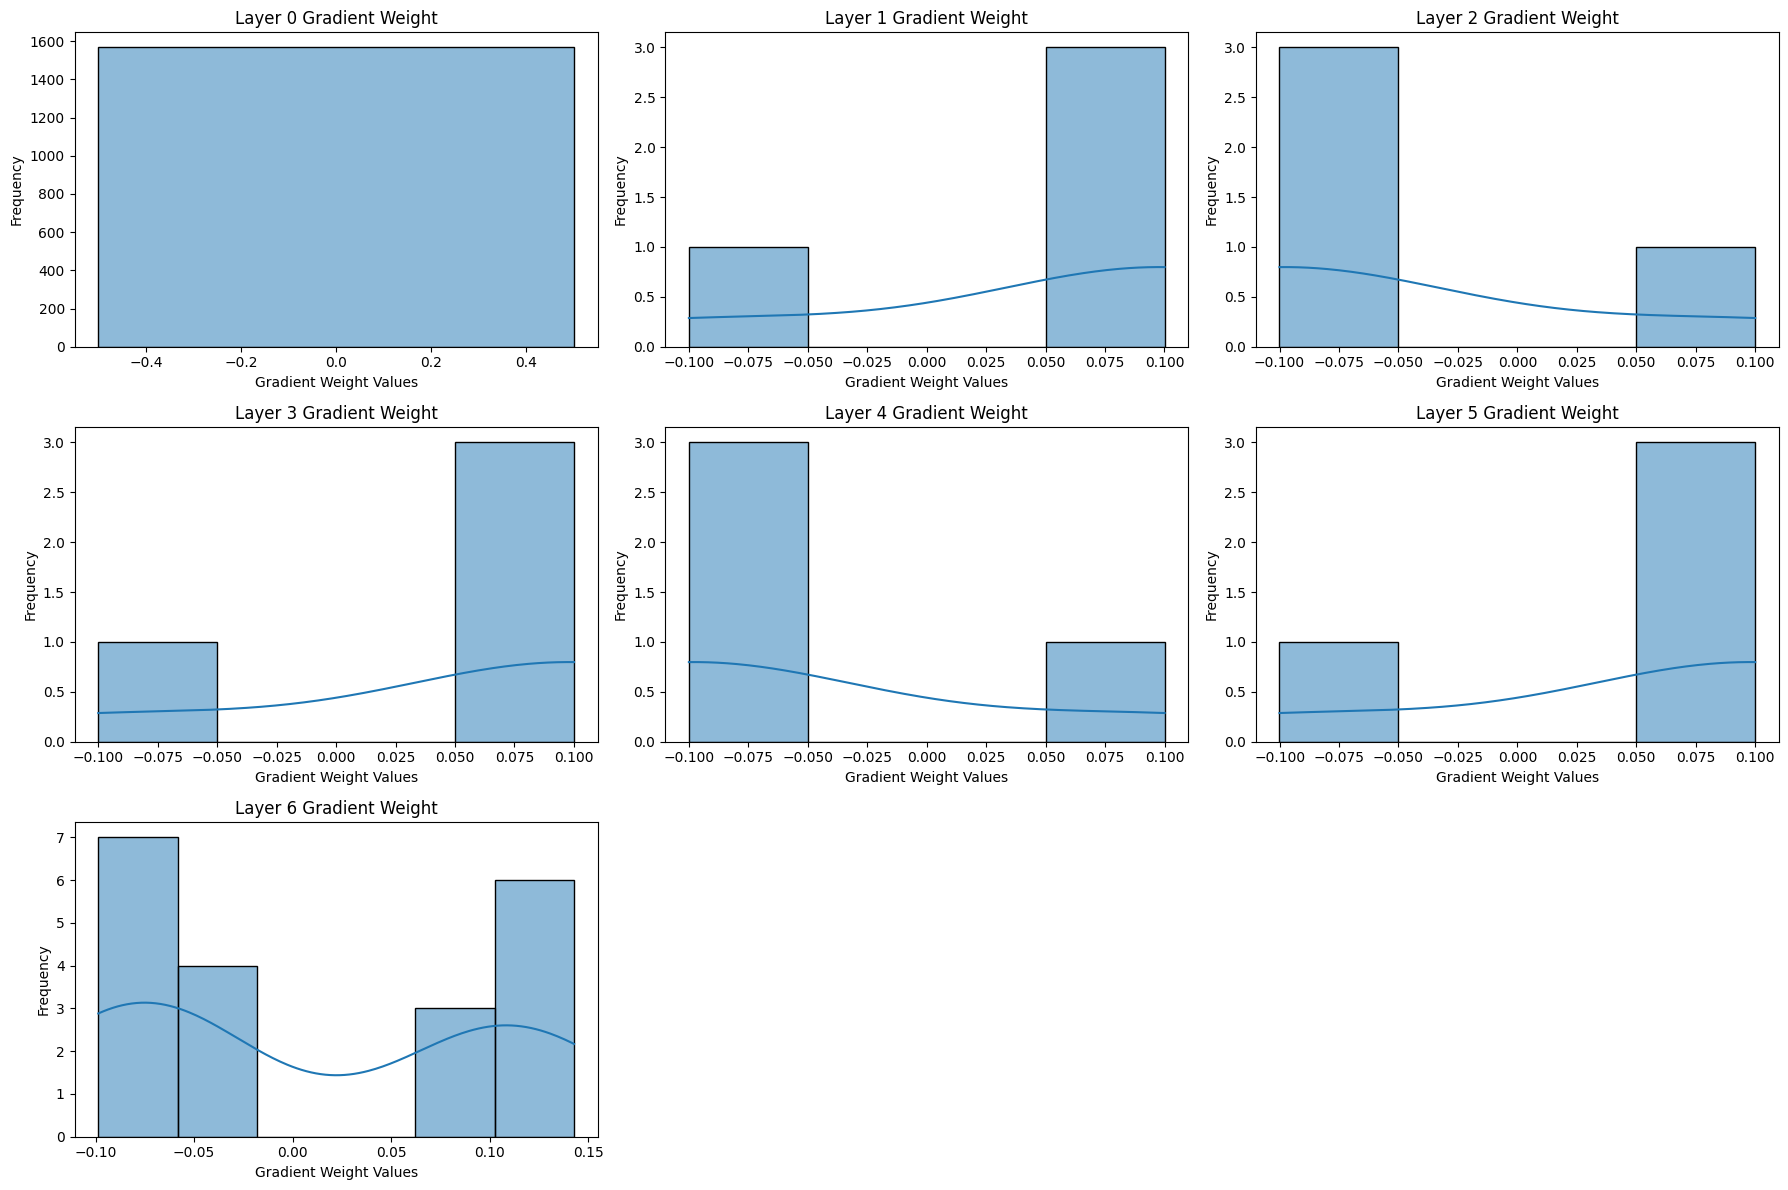

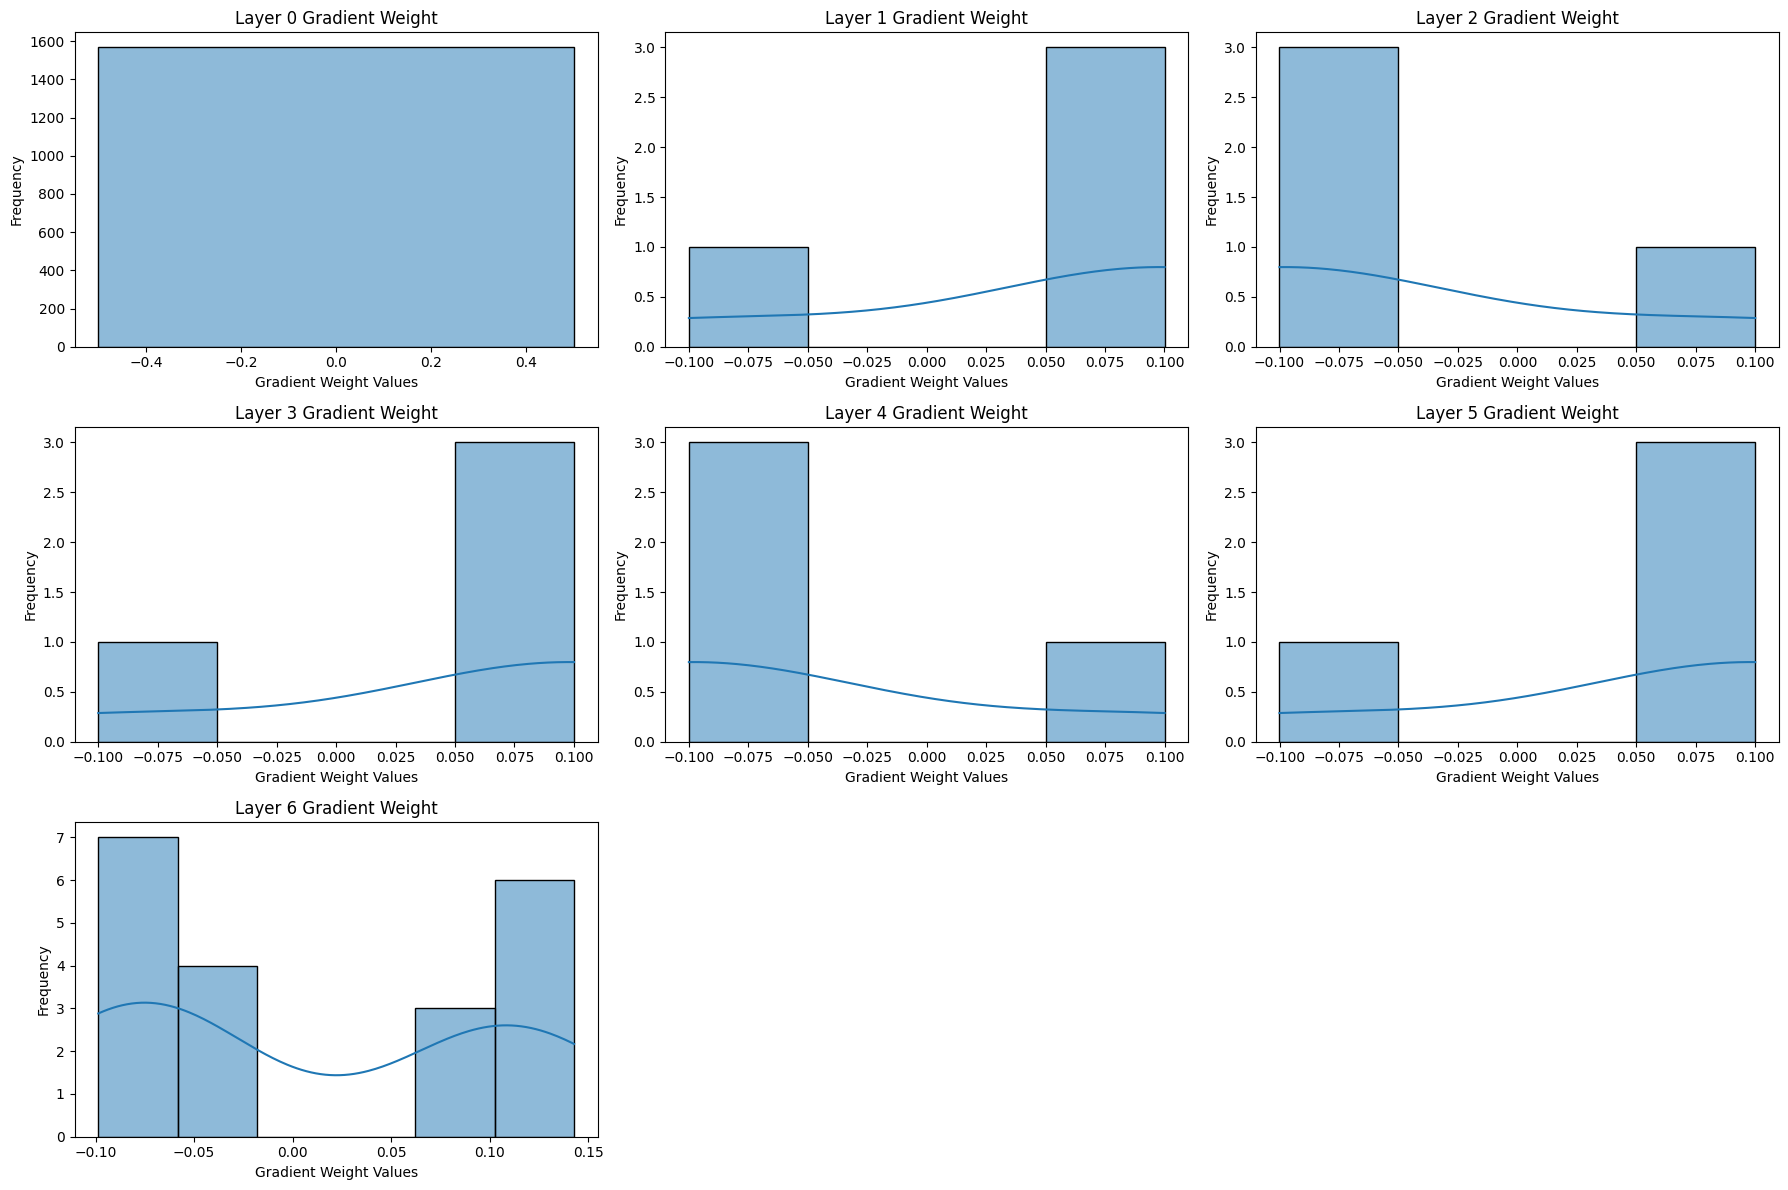

In [65]:
loaded_model.plot_gradient_weight_distribution()

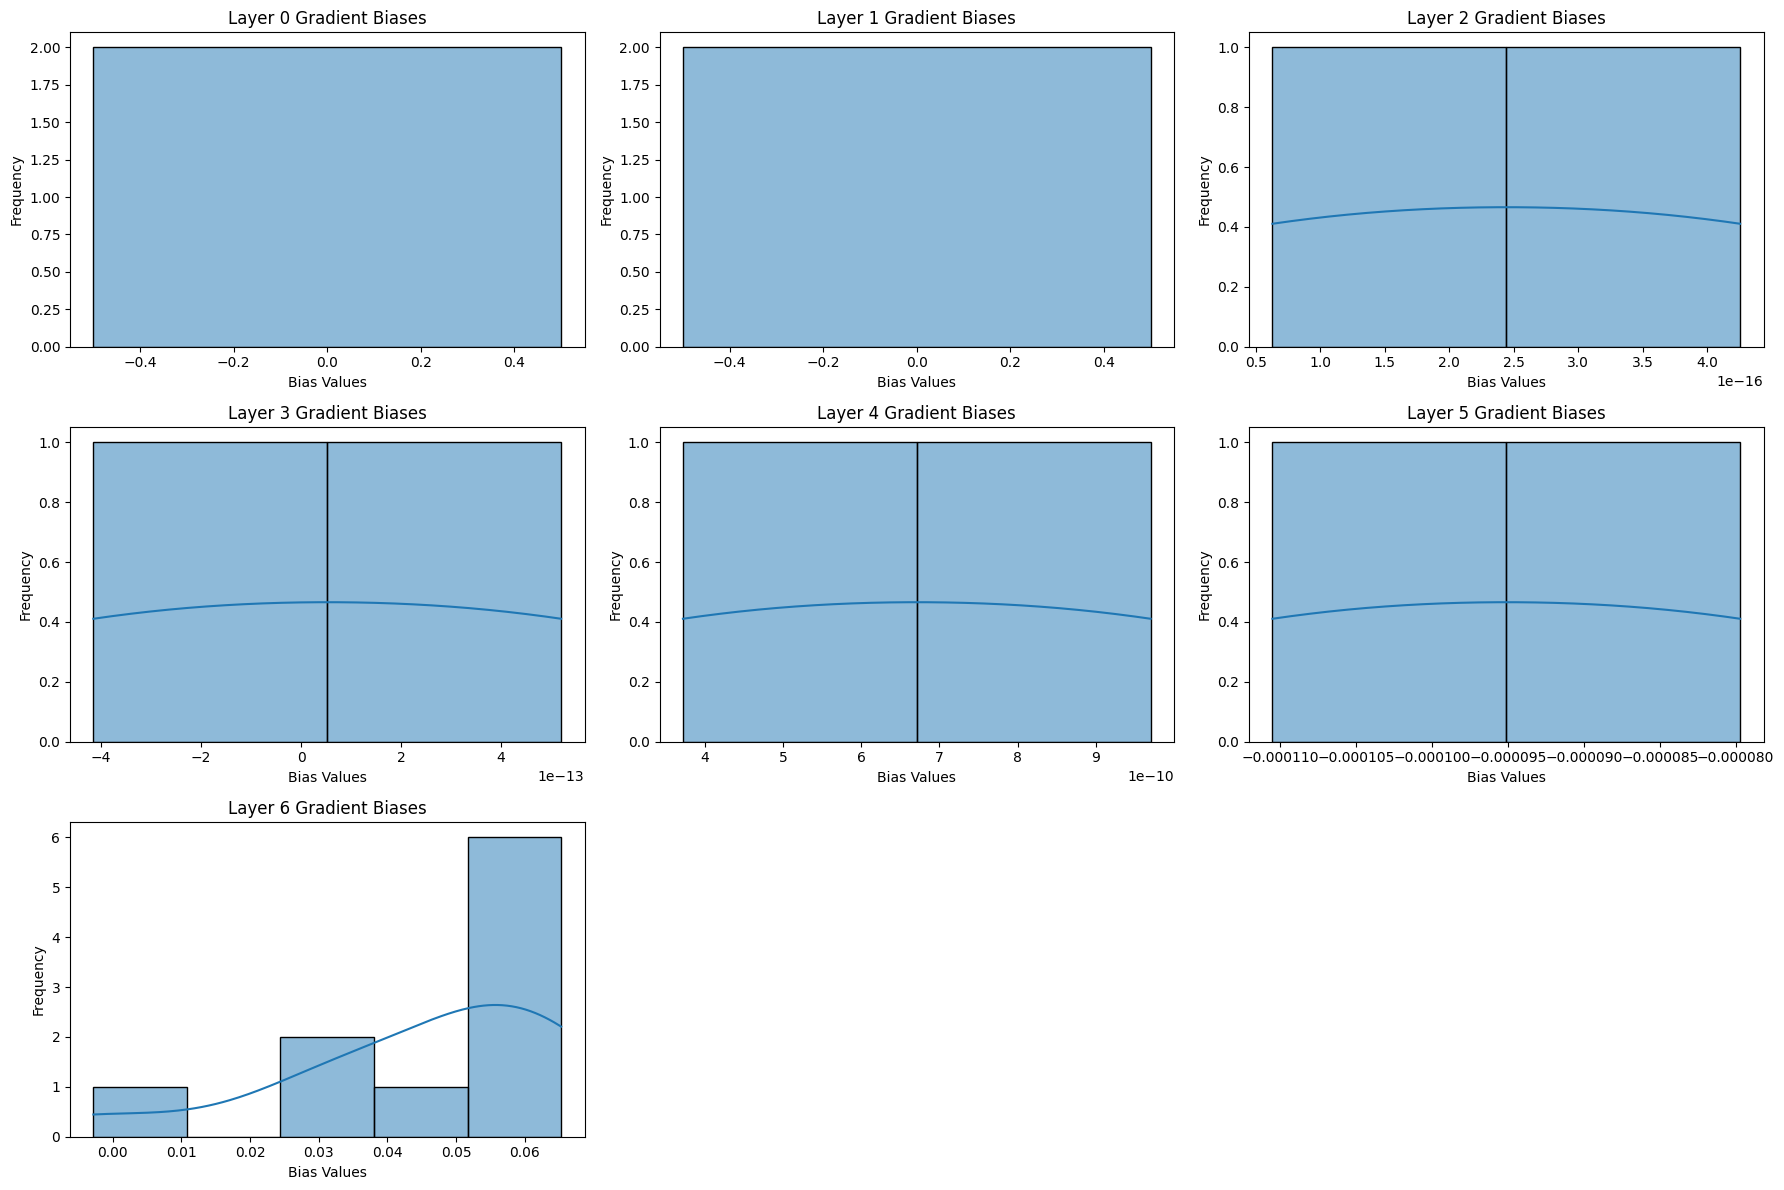

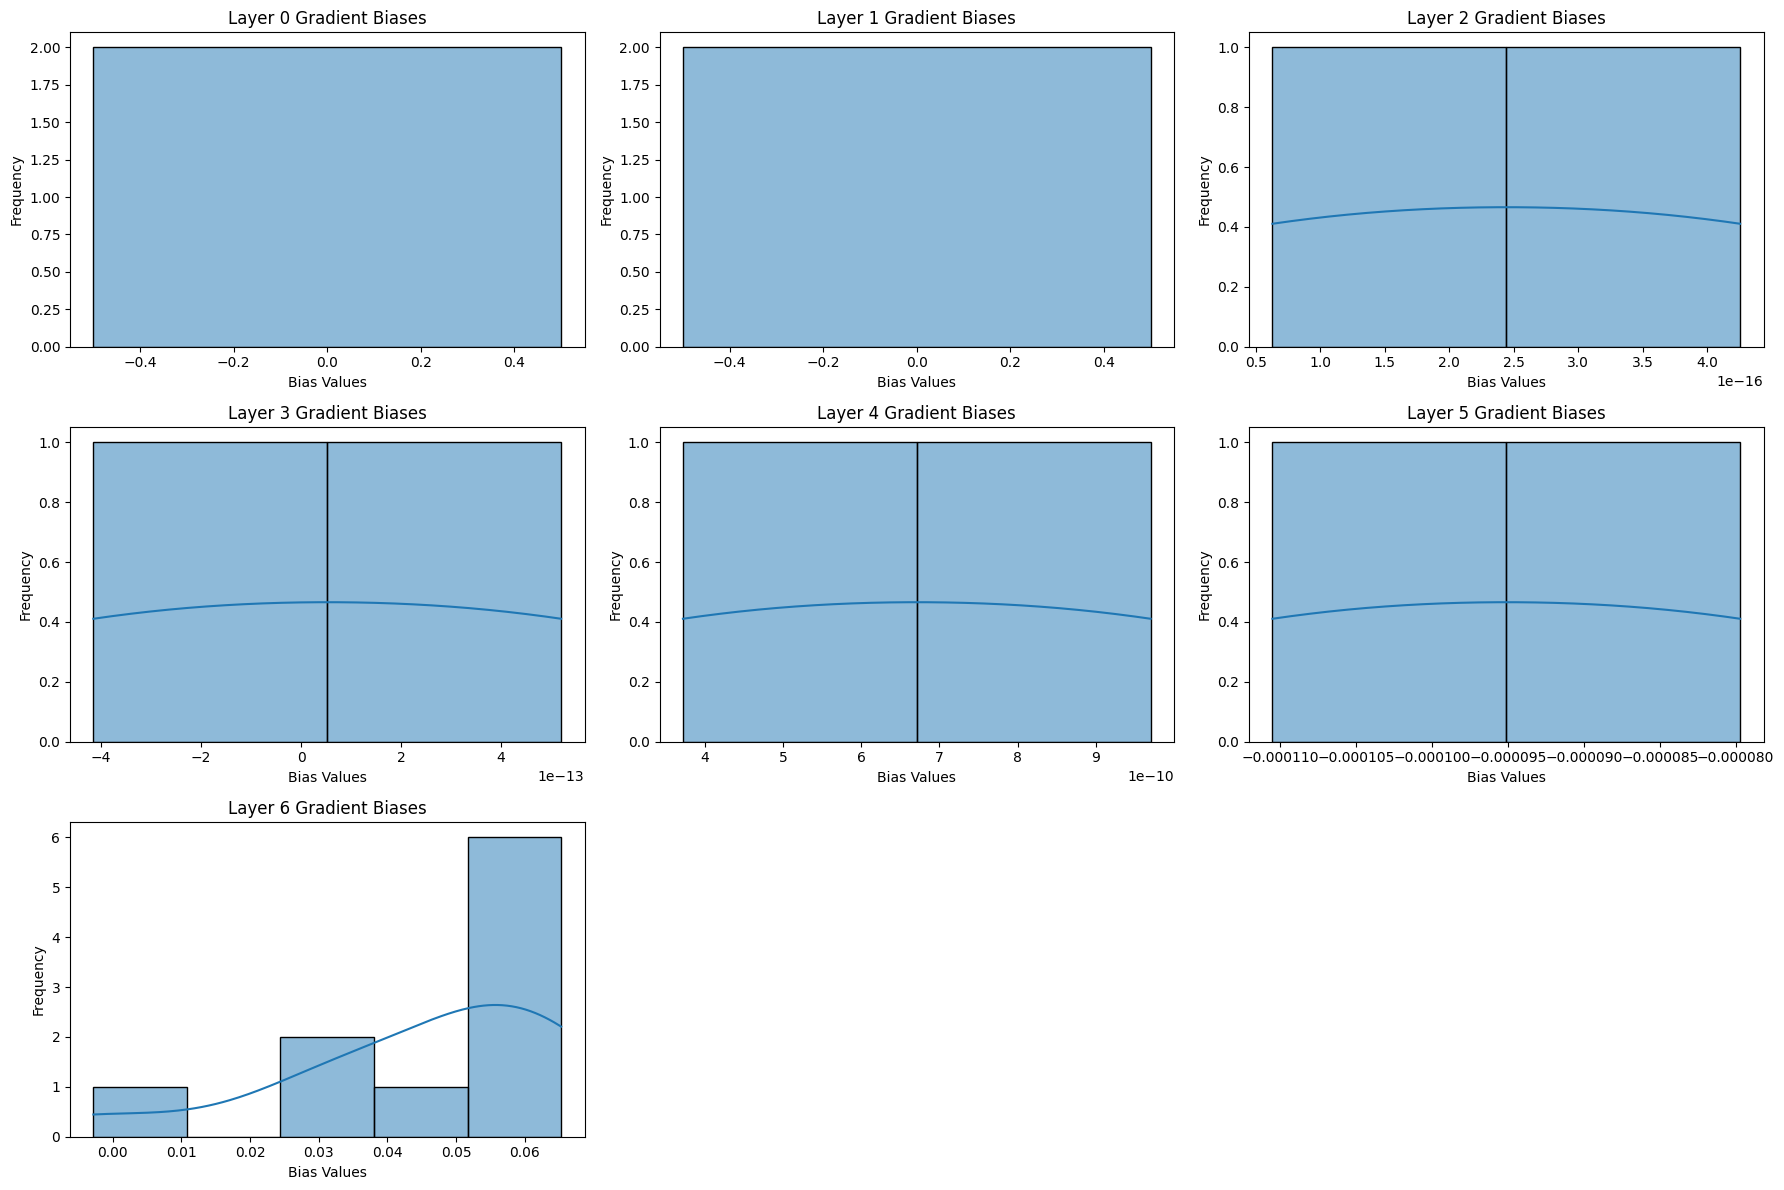

In [66]:
loaded_model.plot_gradient_biases_distribution()

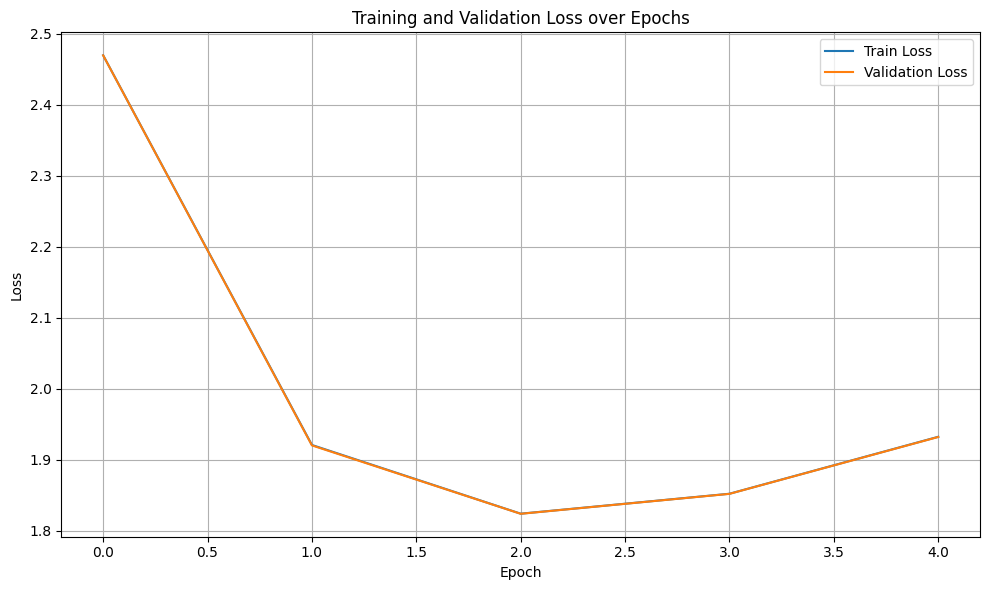

In [67]:
model_ffnn.plot_training_loss()

# Analisis Pengaruh Beberapa Hyperparameter

In [68]:
def accuracy(y_pred, y_test):
    correct = np.sum(y_pred == y_test)
    total = len(y_test)
    accuracy = correct / total
    return accuracy

## Pengaruh Depth

### Depth = 3

In [ ]:
model_depth_low = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=100,
    verbose=0
)

model_depth_low.build_layers(
    Layer(n_neurons=64, init='uniform', activation='softmax'),
    Layer(n_neurons=32, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_depth_low.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_depth_low = model_depth_low.predict(X_test)
res_depth_low = []

for h in y_pred_depth_low:
    max_index = np.argmax(h)
    res_depth_low.append(max_index)

res_depth_low = np.array(res_depth_low)

In [ ]:
acc_depth_low = accuracy(res_depth_low, y_test)
acc_depth_low
print("Accuracy of the low depth model: ", acc_depth_low)
print("Predictions: ", res_depth_low[:10])
print("Target: ", y_test[:10])

Accuracy of the low depth model:  0.3448
Predictions:  [2 9 0 3 4 3 2 2 0 6]
Target:  [2 9 0 0 4 3 2 9 0 4]


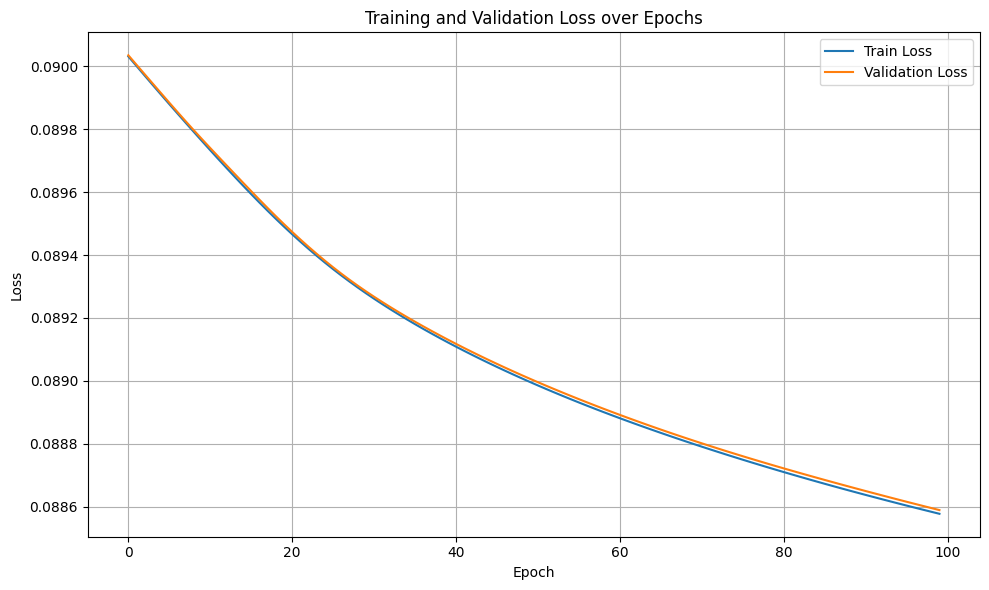

In [ ]:
model_depth_low.plot_training_loss()

### Depth = 5

In [ ]:
model_depth_intermediate = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=100,
    verbose=0
)

model_depth_intermediate.build_layers(
    Layer(n_neurons=128, init='uniform', activation='softmax'),
    Layer(n_neurons=64, init='uniform', activation='softmax'),
    Layer(n_neurons=64, init='uniform', activation='softmax'),
    Layer(n_neurons=32, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_depth_intermediate.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_depth_intermediate = model_depth_intermediate.predict(X_test)
res_depth_intermediate = []

for h in y_pred_depth_intermediate:
    max_index = np.argmax(h)
    res_depth_intermediate.append(max_index)

res_depth_intermediate = np.array(res_depth_intermediate)

In [ ]:
acc_depth_intermediate = accuracy(res_depth_intermediate, y_test)
acc_depth_intermediate


print("Accuracy of the intermediate depth model: ", acc_depth_intermediate)
print("Predictions: ", res_depth_intermediate[:10])
print("Target: ", y_test[:10])


Accuracy of the intermediate depth model:  0.1786
Predictions:  [2 4 2 2 4 2 2 2 2 4]
Target:  [2 9 0 0 4 3 2 9 0 4]


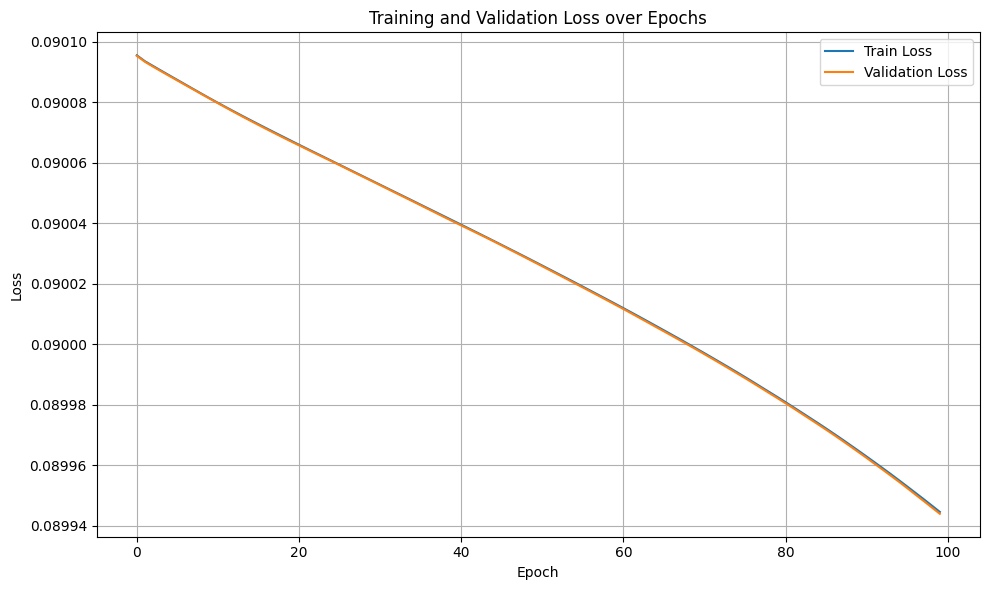

In [ ]:
model_depth_intermediate.plot_training_loss()

### Depth = 7

In [ ]:
model_depth_high = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=100,
    verbose=0
)

model_depth_high.build_layers(
    Layer(n_neurons=128, init='uniform', activation='softmax'),
    Layer(n_neurons=128, init='uniform', activation='softmax'),
    Layer(n_neurons=64, init='uniform', activation='softmax'),
    Layer(n_neurons=64, init='uniform', activation='softmax'),
    Layer(n_neurons=32, init='uniform', activation='softmax'),
    Layer(n_neurons=32, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_depth_high.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_depth_high = model_depth_high.predict(X_test)
res_depth_high = []

for h in y_pred_depth_high:
    max_index = np.argmax(h)
    res_depth_high.append(max_index)

res_depth_high = np.array(res_depth_high)

In [ ]:
acc_depth_high = accuracy(res_depth_high, y_test)
acc_depth_high

print("Accuracy of the high depth model: ", acc_depth_high)
print("Predictions: ", res_depth_high[:10])
print("Target: ", y_test[:10])

Accuracy of the high depth model:  0.0974
Predictions:  [4 4 4 4 4 4 4 4 4 4]
Target:  [2 9 0 0 4 3 2 9 0 4]


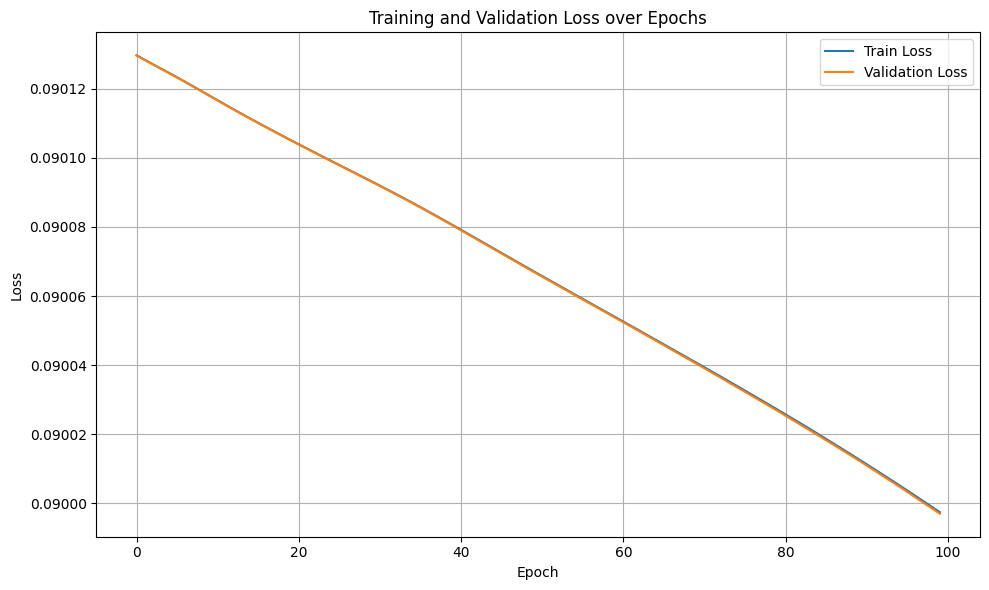

In [ ]:
model_depth_high.plot_training_loss()

## Pengaruh Width

### Width = 32 neuron

In [ ]:
model_width_low = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=100,
    verbose=0
)

model_width_low.build_layers(
    Layer(n_neurons=32, init='uniform', activation='softmax'),
    Layer(n_neurons=32, init='uniform', activation='softmax'),
    Layer(n_neurons=32, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_width_low.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_width_low = model_width_low.predict(X_test)
res_width_low = []

for h in y_pred_width_low:
    max_index = np.argmax(h)
    res_width_low.append(max_index)

res_width_low = np.array(res_width_low)

In [ ]:
acc_width_low = accuracy(res_width_low, y_test)
acc_width_low
print("Accuracy of the low width model: ", acc_width_low)
print("Predictions: ", res_width_low[:10])
print("Target: ", y_test[:10])

Accuracy of the low width model:  0.1042
Predictions:  [7 7 7 7 7 7 7 7 7 7]
Target:  [2 9 0 0 4 3 2 9 0 4]


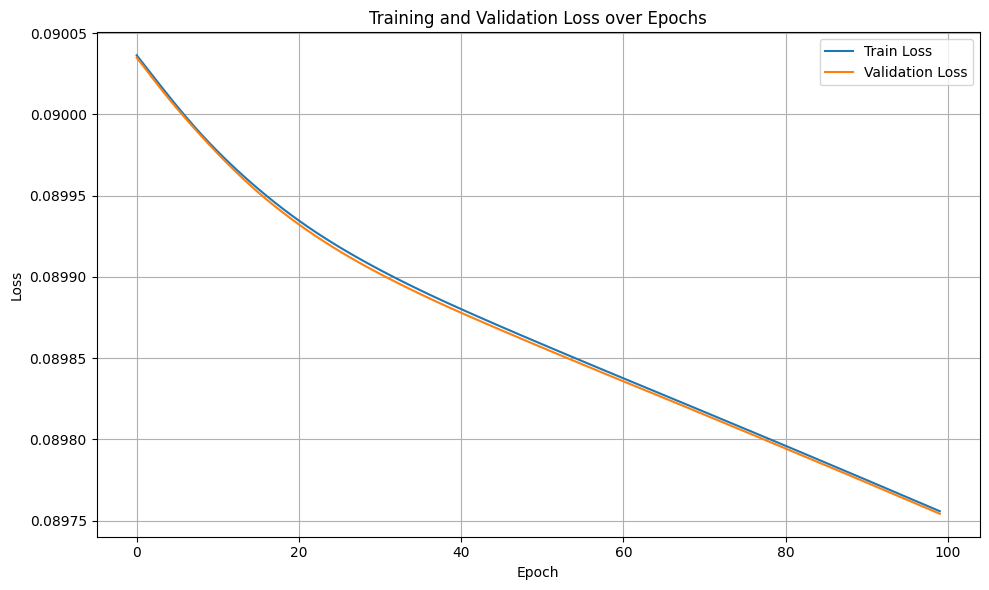

In [ ]:
model_width_low.plot_training_loss()

### Width = 64 neuron

In [ ]:
model_width_intermediate = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=100,
    verbose=0
)

model_width_intermediate.build_layers(
    Layer(n_neurons=64, init='uniform', activation='softmax'),
    Layer(n_neurons=64, init='uniform', activation='softmax'),
    Layer(n_neurons=64, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_width_intermediate.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_width_intermediate = model_width_intermediate.predict(X_test)
res_width_intermediate = []

for h in y_pred_width_intermediate:
    max_index = np.argmax(h)
    res_width_intermediate.append(max_index)

res_width_intermediate = np.array(res_width_intermediate)

In [ ]:
acc_width_intermediate = accuracy(res_width_intermediate, y_test)
acc_width_intermediate
print("Accuracy of the intermediate width model: ", acc_width_intermediate)
print("Predictions: ", res_width_intermediate[:10])
print("Target: ", y_test[:10])

Accuracy of the intermediate width model:  0.102
Predictions:  [3 3 3 3 3 3 3 3 3 3]
Target:  [2 9 0 0 4 3 2 9 0 4]


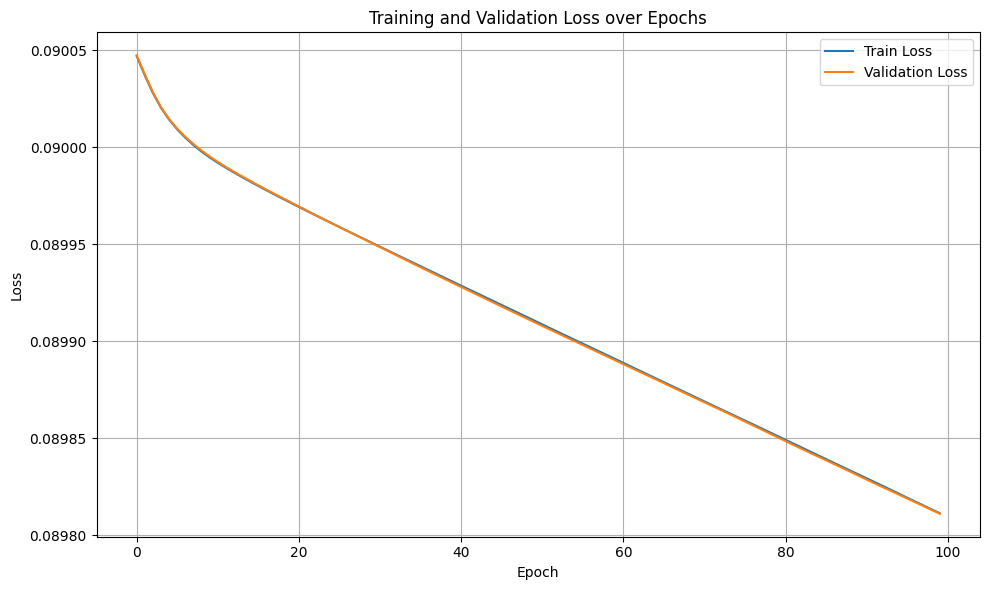

In [ ]:
model_width_intermediate.plot_training_loss()

### Width = 128 neuron

In [ ]:
model_width_high = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=100,
    verbose=0
)

model_width_high.build_layers(
    Layer(n_neurons=128, init='uniform', activation='softmax'),
    Layer(n_neurons=128, init='uniform', activation='softmax'),
    Layer(n_neurons=128, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_width_high.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_width_high = model_width_high.predict(X_test)
res_width_high = []

for h in y_pred_width_high:
    max_index = np.argmax(h)
    res_width_high.append(max_index)

res_width_high = np.array(res_width_high)

In [ ]:
acc_width_high = accuracy(res_width_high, y_test)
acc_width_high
print("Accuracy of the high width model: ", acc_width_high)
print("Predictions: ", res_width_high[:10])
print("Target: ", y_test[:10])

Accuracy of the high width model:  0.1916
Predictions:  [9 9 9 9 9 9 9 1 9 9]
Target:  [2 9 0 0 4 3 2 9 0 4]


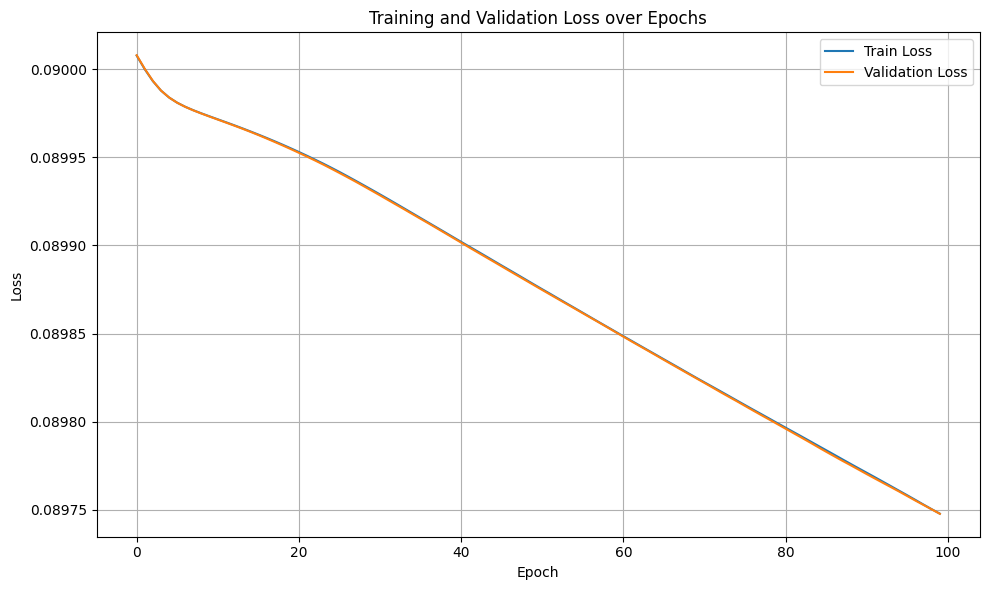

In [ ]:
model_width_high.plot_training_loss()

## Pengaruh Learning Rate

### Learning rate = 0.001

In [ ]:
model_lr_low = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.001,
    epochs=100,
    verbose=0
)

model_lr_low.build_layers(
    Layer(n_neurons=128, init='uniform', activation='softmax'),
    Layer(n_neurons=64, init='uniform', activation='softmax'),
    Layer(n_neurons=32, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_lr_low.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_lr_low = model_lr_low.predict(X_test)
res_lr_low = []

for h in y_pred_lr_low:
    max_index = np.argmax(h)
    res_lr_low.append(max_index)

res_lr_low = np.array(res_lr_low)

In [ ]:
acc_lr_low = accuracy(res_lr_low, y_test)
acc_lr_low
print("accuracy: ", acc_lr_low)
print("Predictions: ", res_lr_low[:10])
print("Target: ", y_test[:10])

accuracy:  0.0902
Predictions:  [5 5 5 5 5 5 5 5 5 5]
Target:  [2 9 0 0 4 3 2 9 0 4]


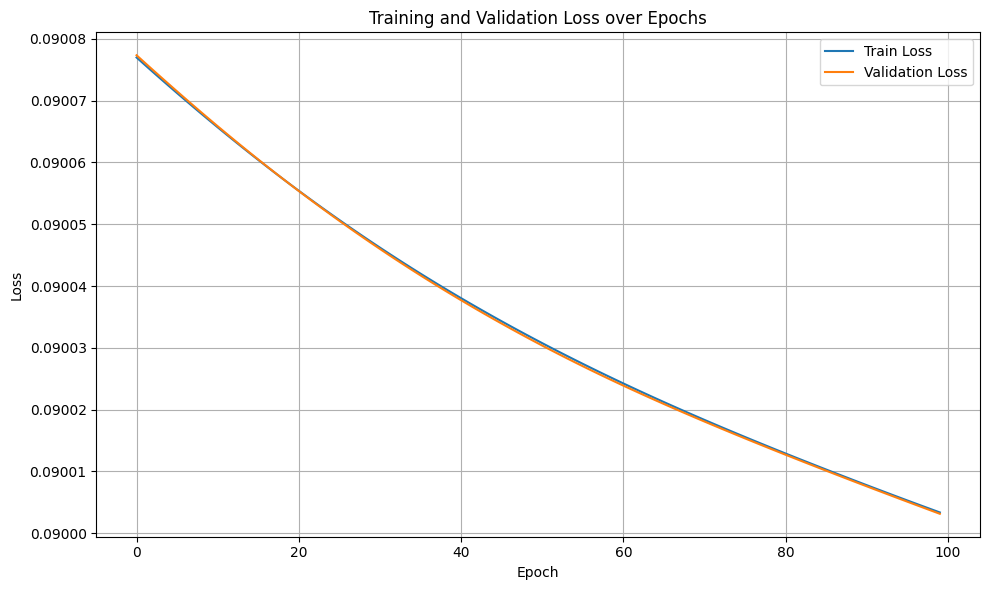

In [ ]:
model_lr_low.plot_training_loss()

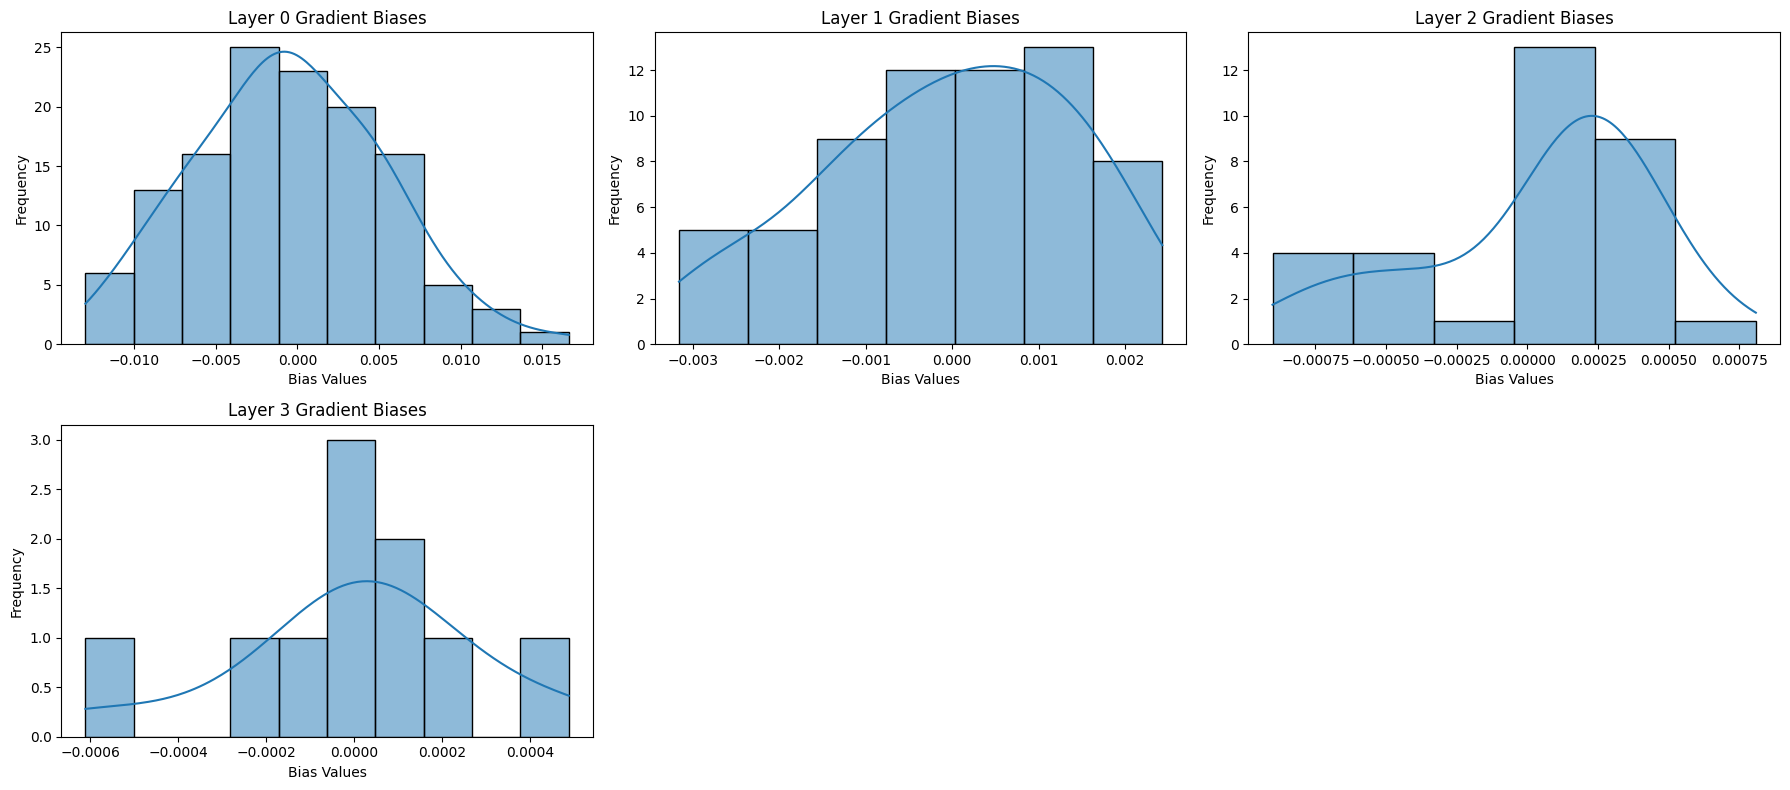

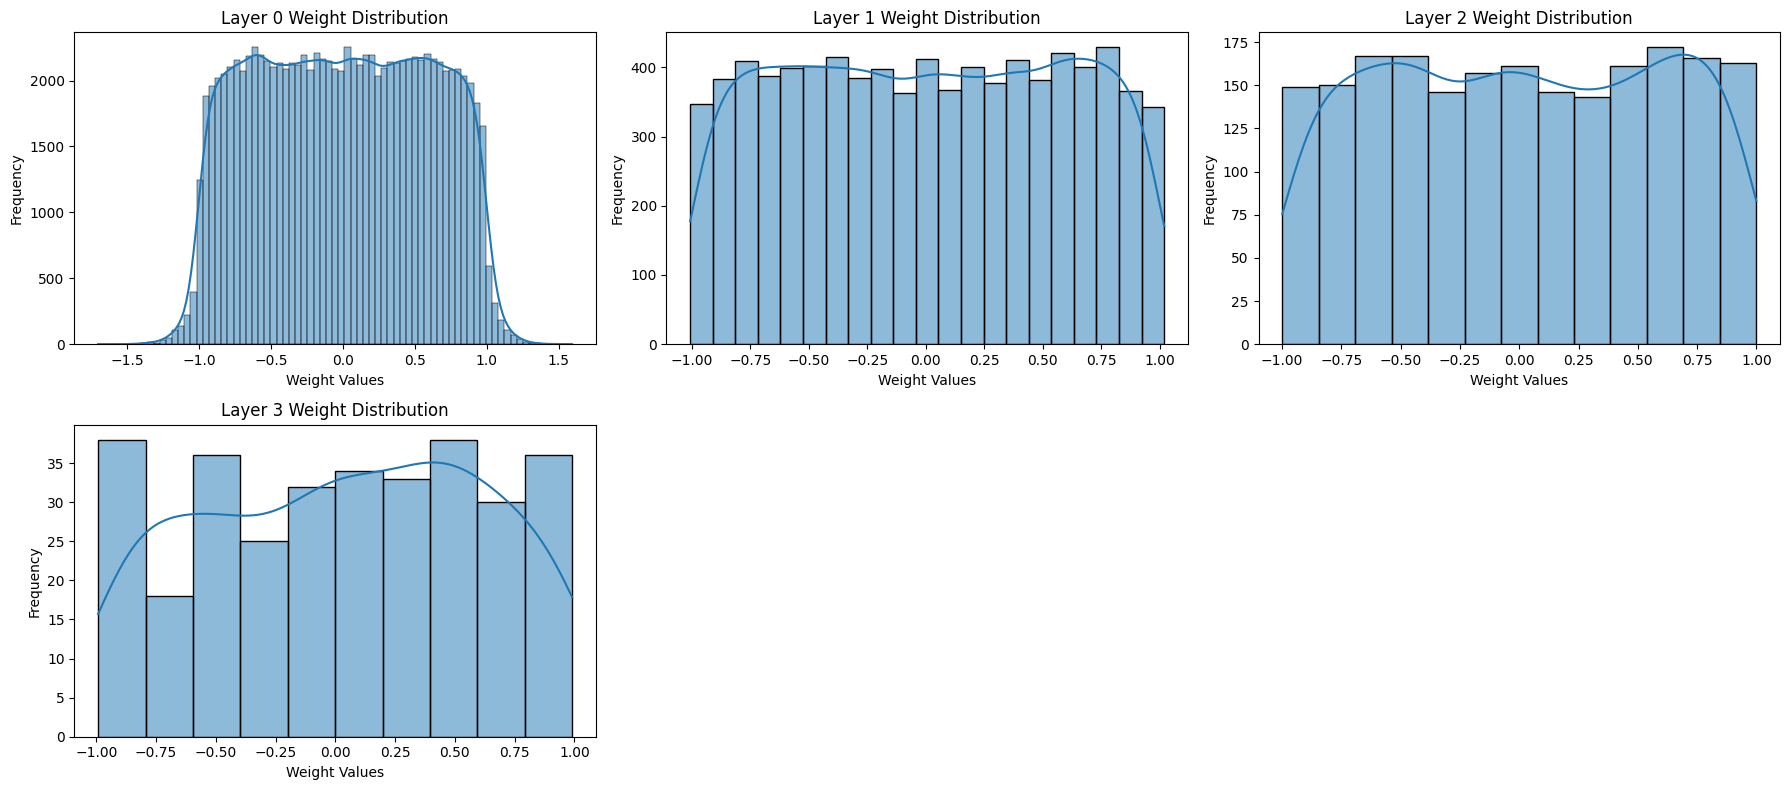

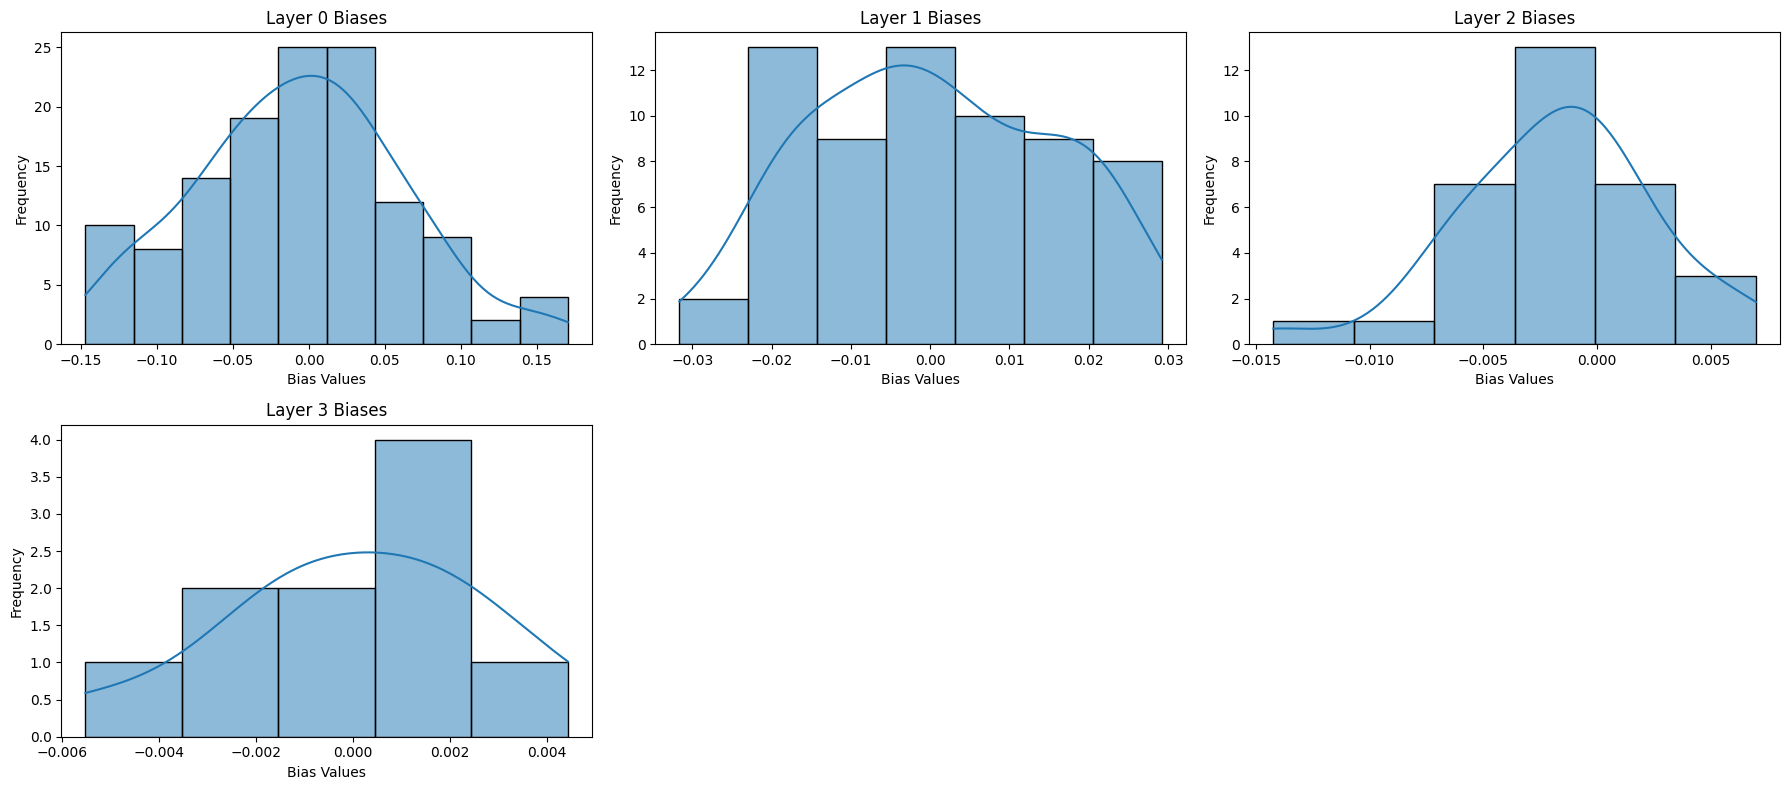

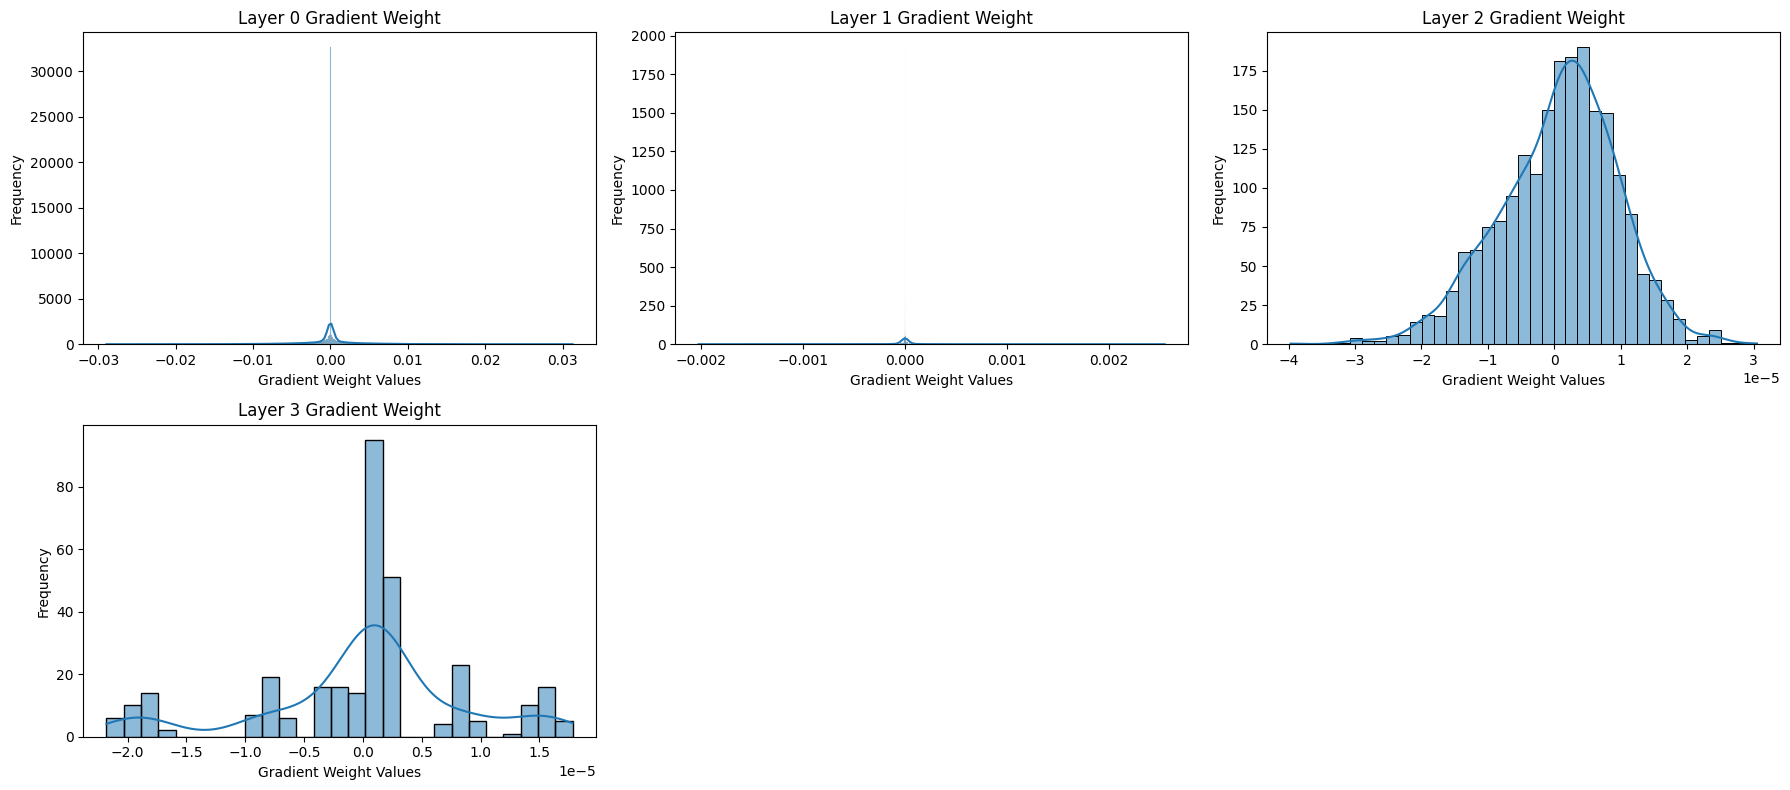

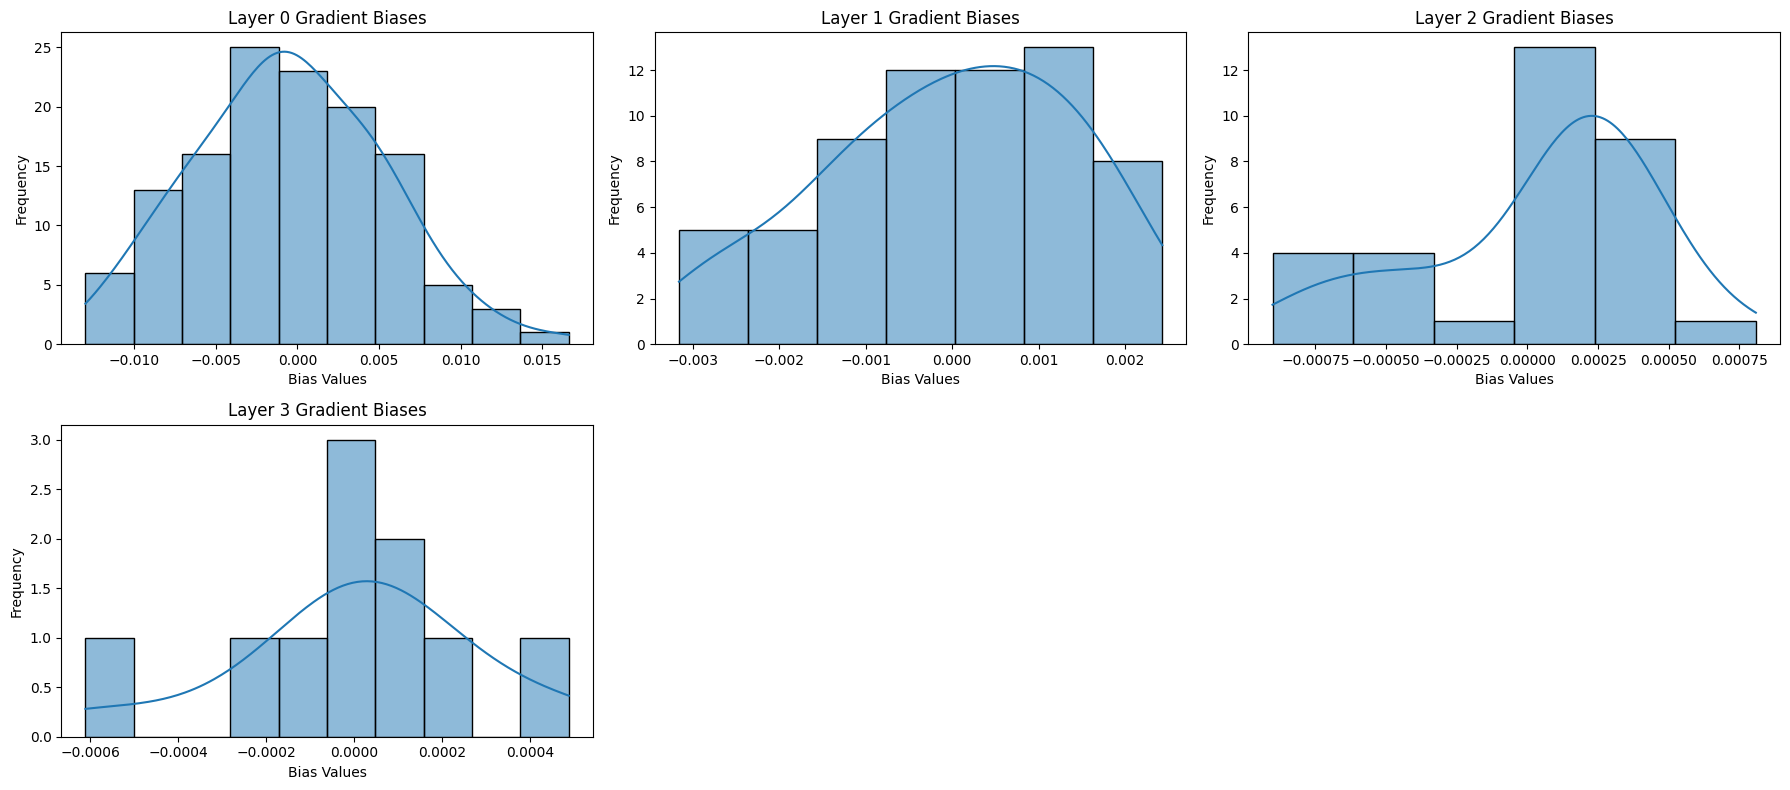

In [ ]:
model_lr_low.plot_weight_distribution()
model_lr_low.plot_biases_distribution()
model_lr_low.plot_gradient_weight_distribution()
model_lr_low.plot_gradient_biases_distribution()

### Learning rate = 0.01

In [ ]:
model_lr_intermediate = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=100,
    verbose=0
)

model_lr_intermediate.build_layers(
    Layer(n_neurons=128, init='uniform', activation='softmax'),
    Layer(n_neurons=64, init='uniform', activation='softmax'),
    Layer(n_neurons=32, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_lr_intermediate.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_lr_intermediate = model_lr_intermediate.predict(X_test)
res_lr_intermediate = []

for h in y_pred_lr_intermediate:
    max_index = np.argmax(h)
    res_lr_intermediate.append(max_index)

res_lr_intermediate = np.array(res_lr_intermediate)

In [ ]:
acc_lr_intermediate = accuracy(res_lr_intermediate, y_test)
acc_lr_intermediate
print("accuracy: ", acc_lr_intermediate)
print("Predictions: ", res_lr_intermediate[:10])
print("Target: ", y_test[:10])

accuracy:  0.0994
Predictions:  [9 9 9 9 9 9 9 9 9 9]
Target:  [2 9 0 0 4 3 2 9 0 4]


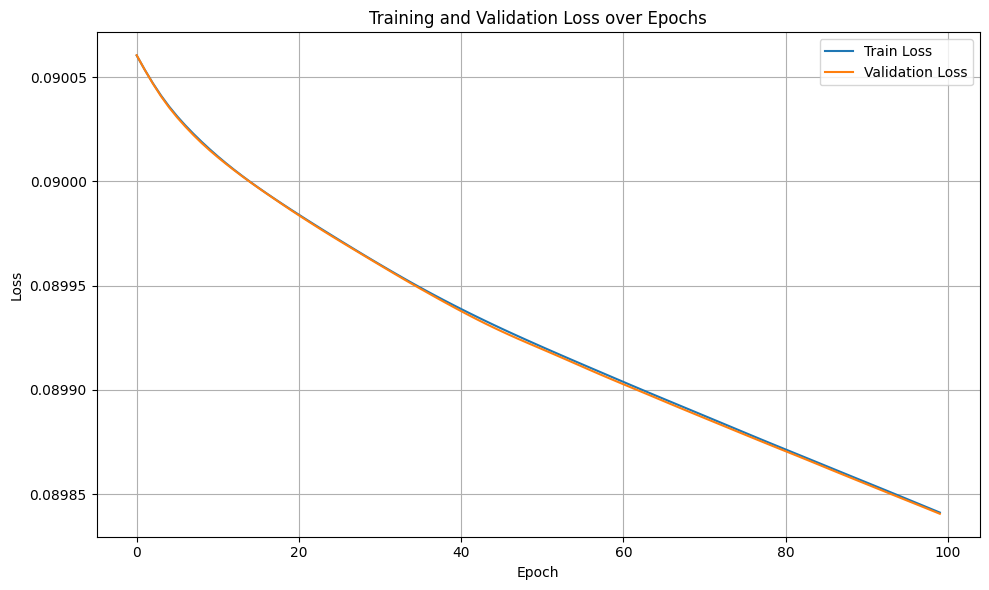

In [ ]:
model_lr_intermediate.plot_training_loss()

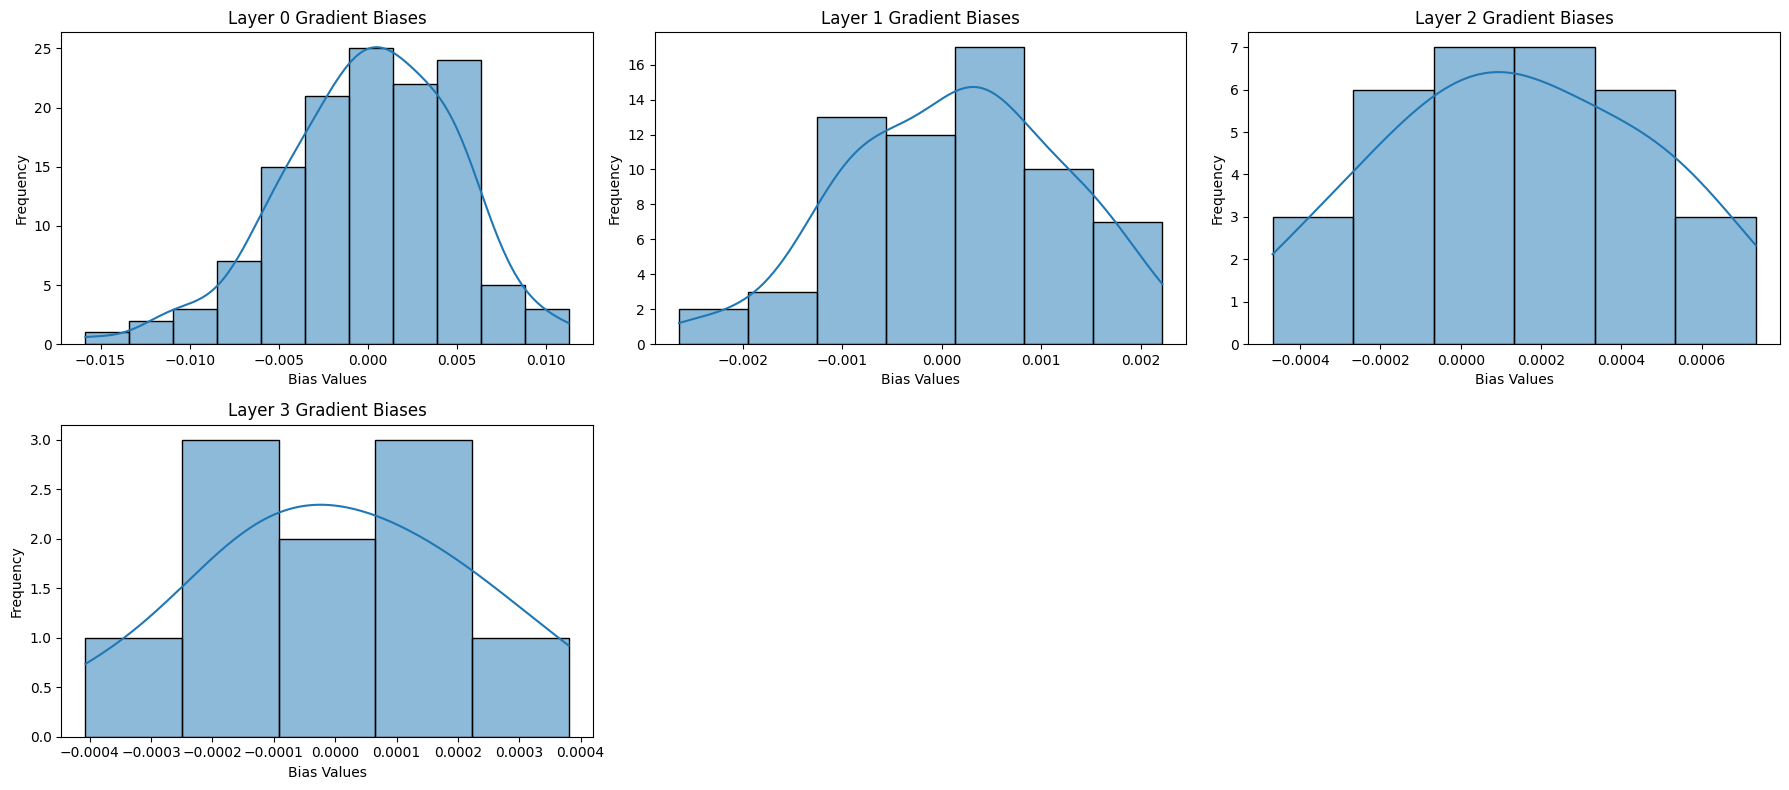

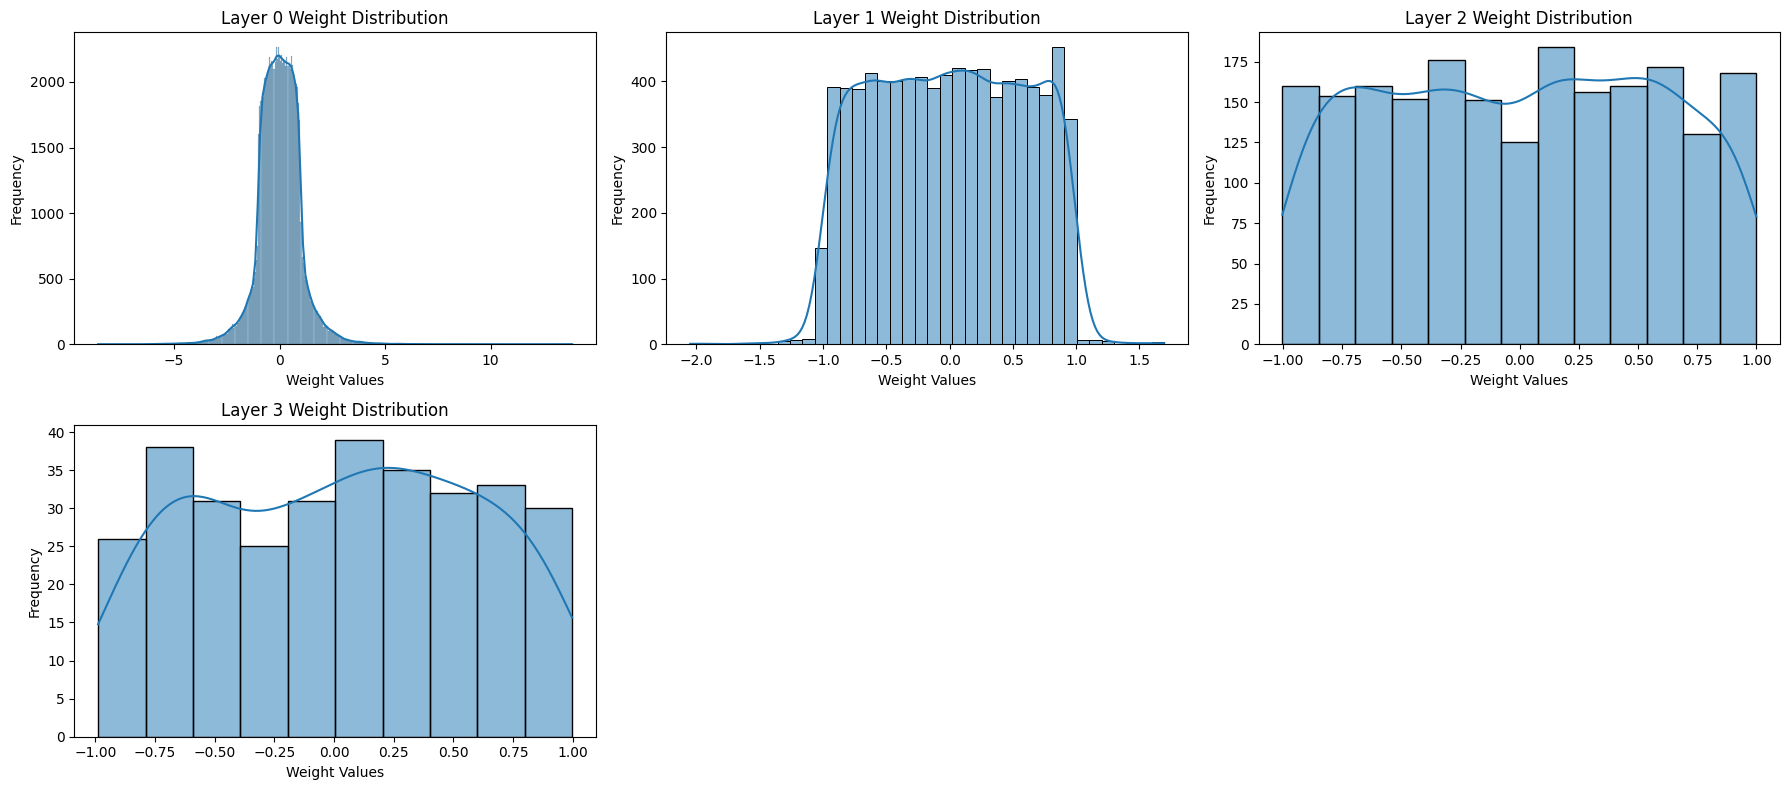

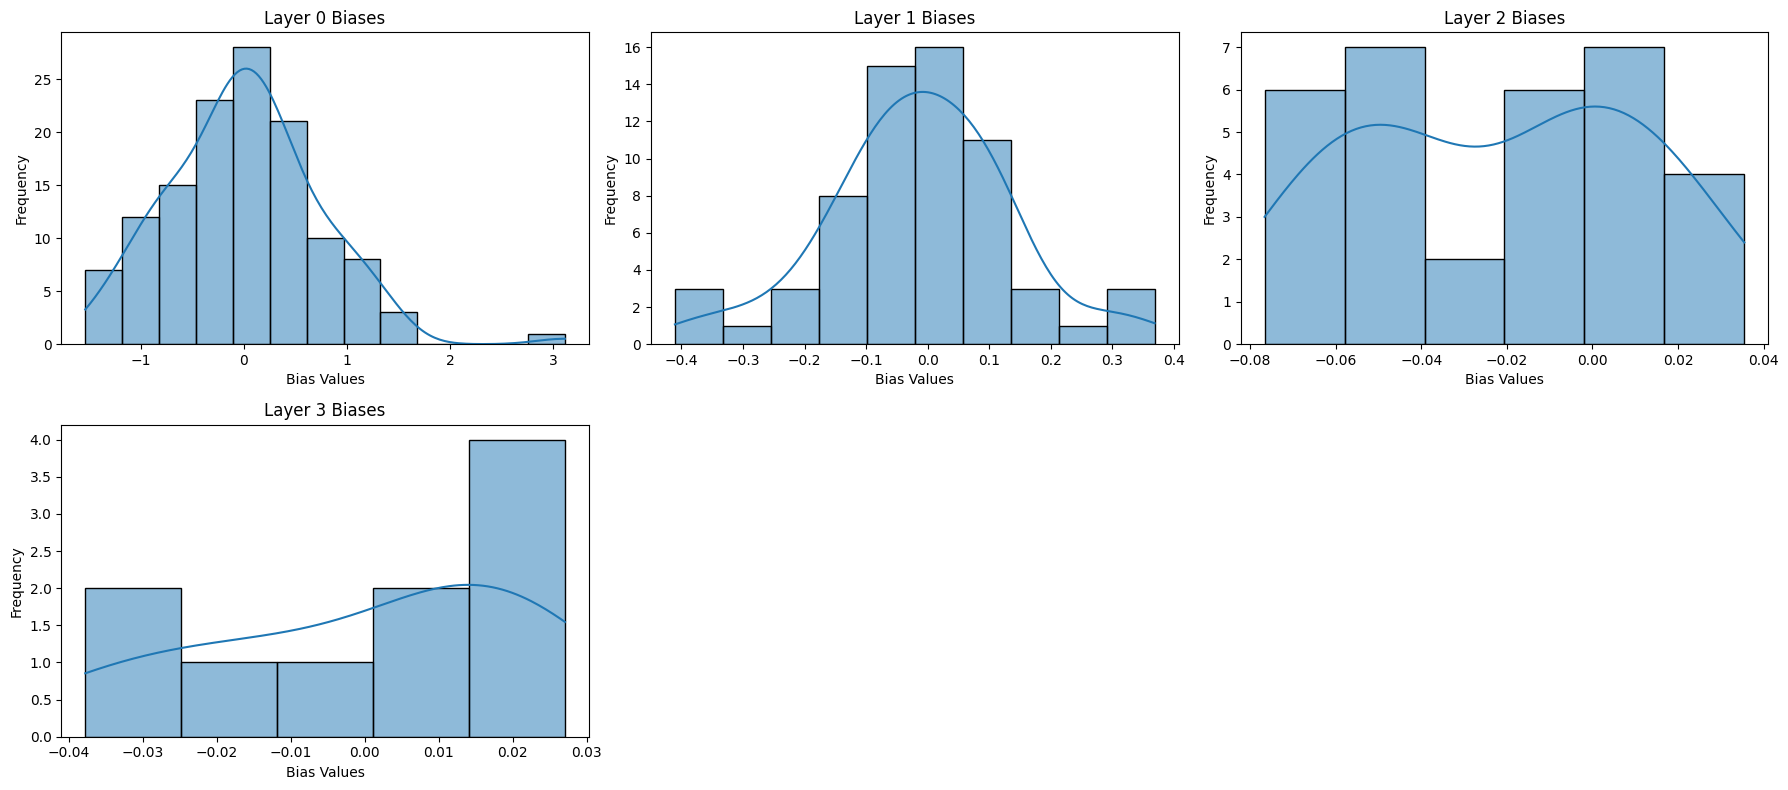

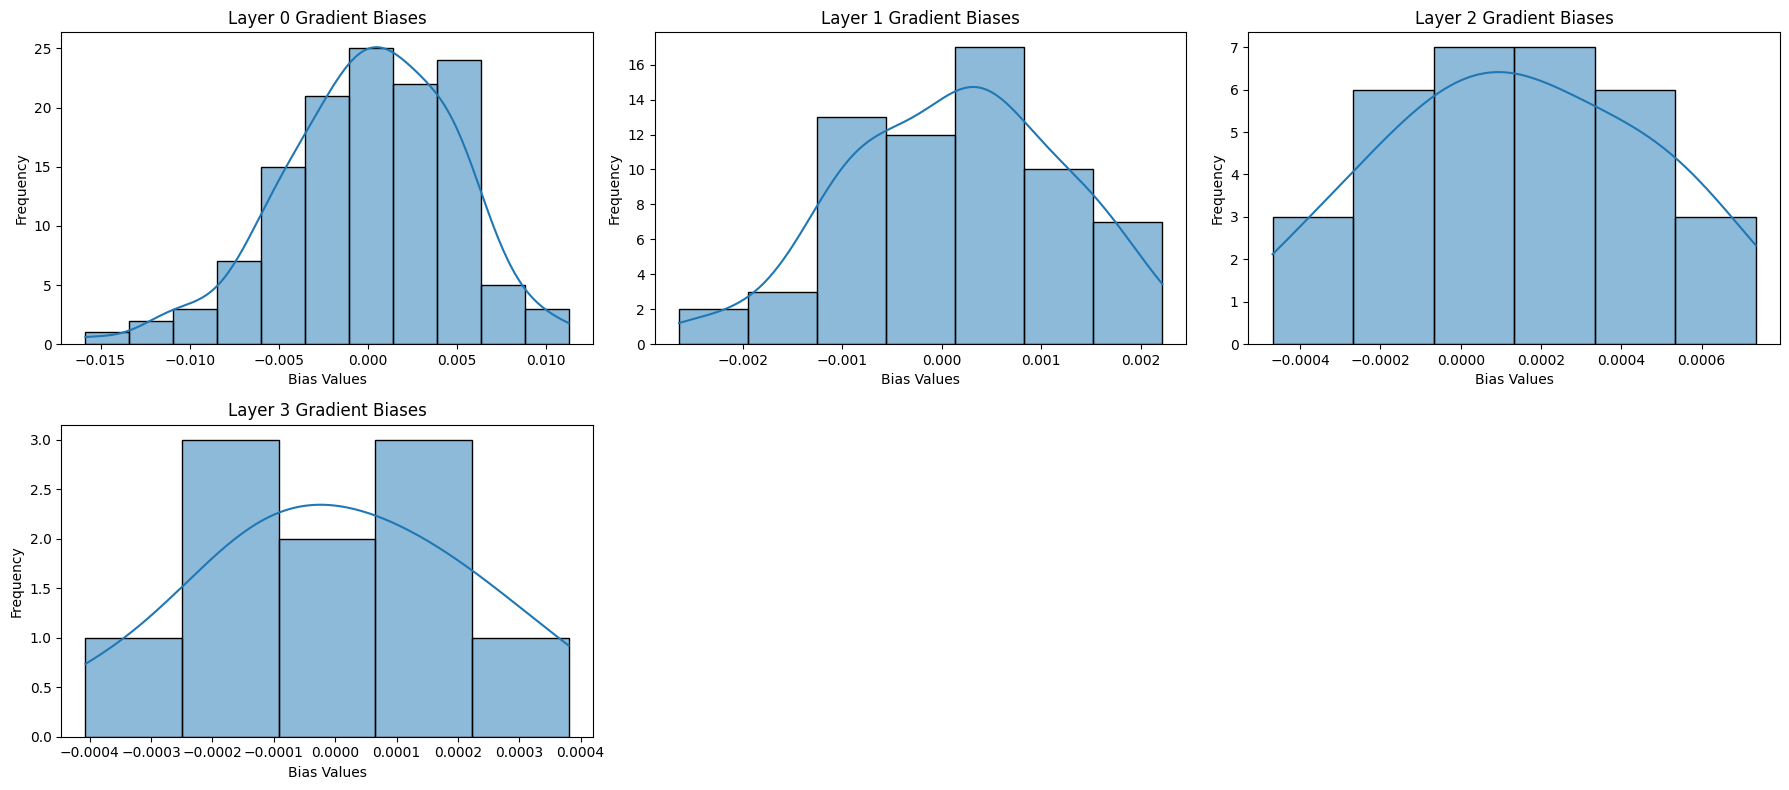

In [ ]:
model_lr_intermediate.plot_weight_distribution()
model_lr_intermediate.plot_biases_distribution()
# model_lr_intermediate.plot_gradient_weight_distribution()
model_lr_intermediate.plot_gradient_biases_distribution()

### Learning rate = 0.1

In [ ]:
model_lr_high = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.1,
    epochs=100,
    verbose=0
)

model_lr_high.build_layers(
    Layer(n_neurons=128, init='uniform', activation='softmax'),
    Layer(n_neurons=64, init='uniform', activation='softmax'),
    Layer(n_neurons=32, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_lr_high.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_lr_high = model_lr_high.predict(X_test)
res_lr_high = []

for h in y_pred_lr_high:
    max_index = np.argmax(h)
    res_lr_high.append(max_index)

res_lr_high = np.array(res_lr_high)

In [ ]:
acc_lr_high = accuracy(res_lr_high, y_test)
acc_lr_high
print("accuracy: ", acc_lr_high)
print("Predictions: ", res_lr_high[:10])
print("Target: ", y_test[:10])

accuracy:  0.32
Predictions:  [3 7 3 3 6 3 3 1 3 6]
Target:  [2 9 0 0 4 3 2 9 0 4]


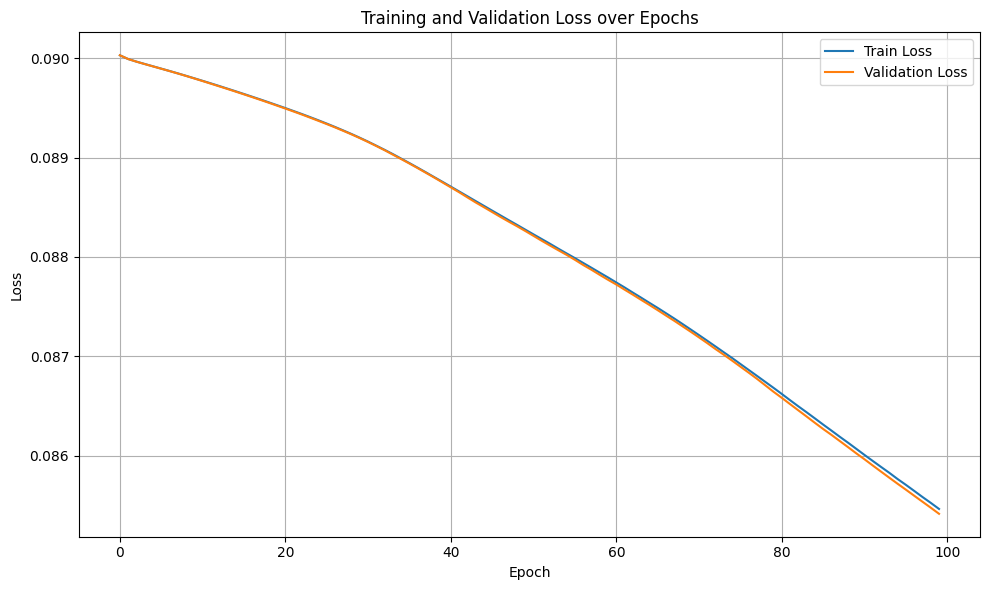

In [ ]:
model_lr_high.plot_training_loss()

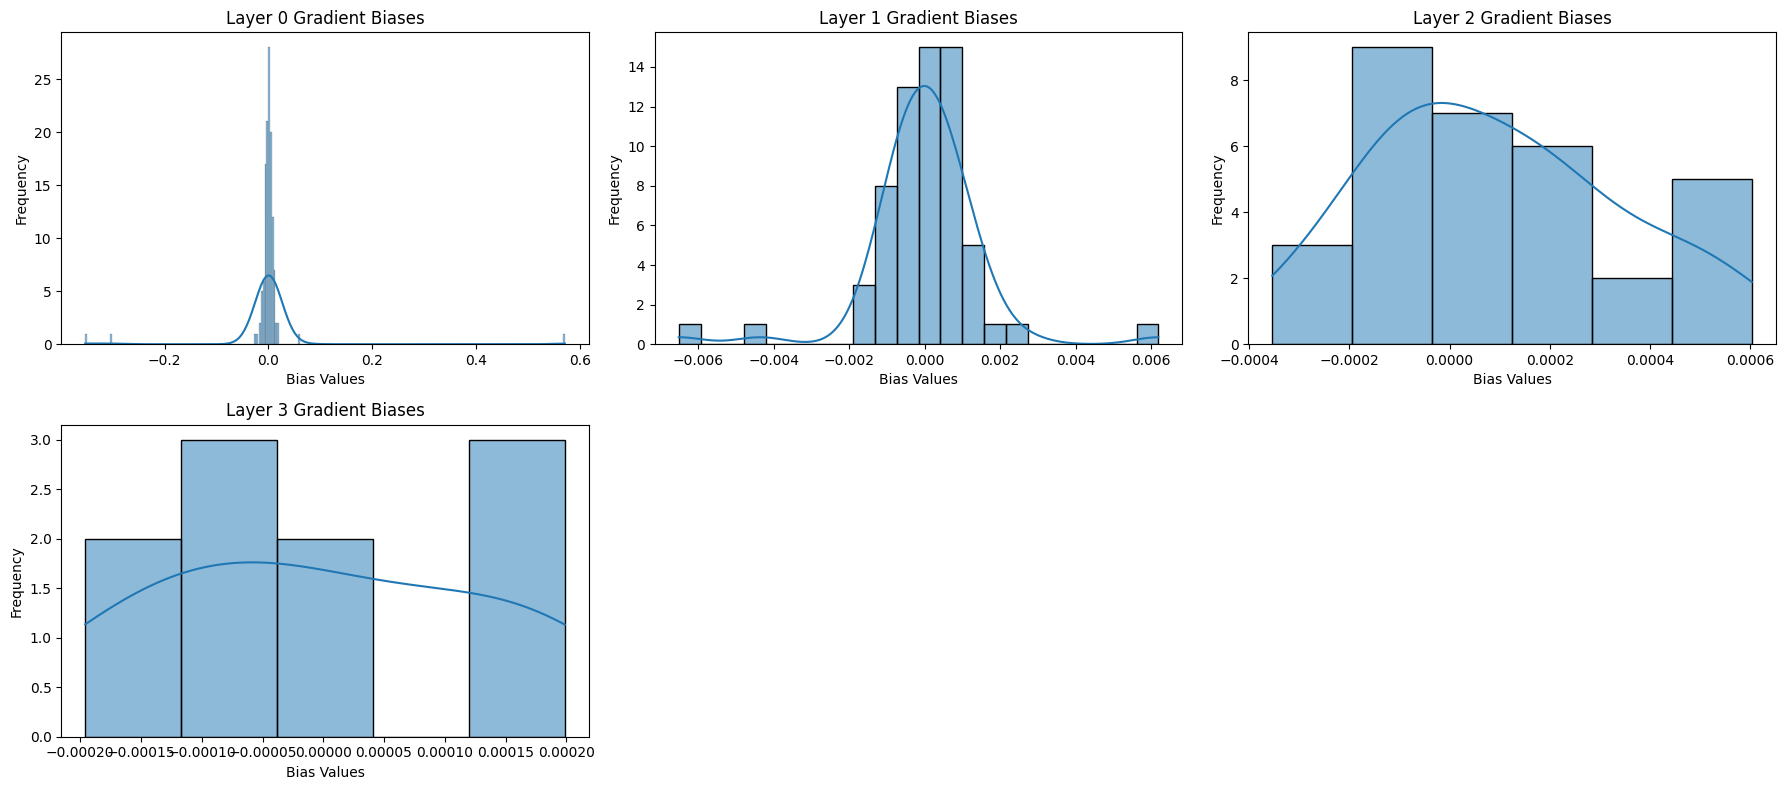

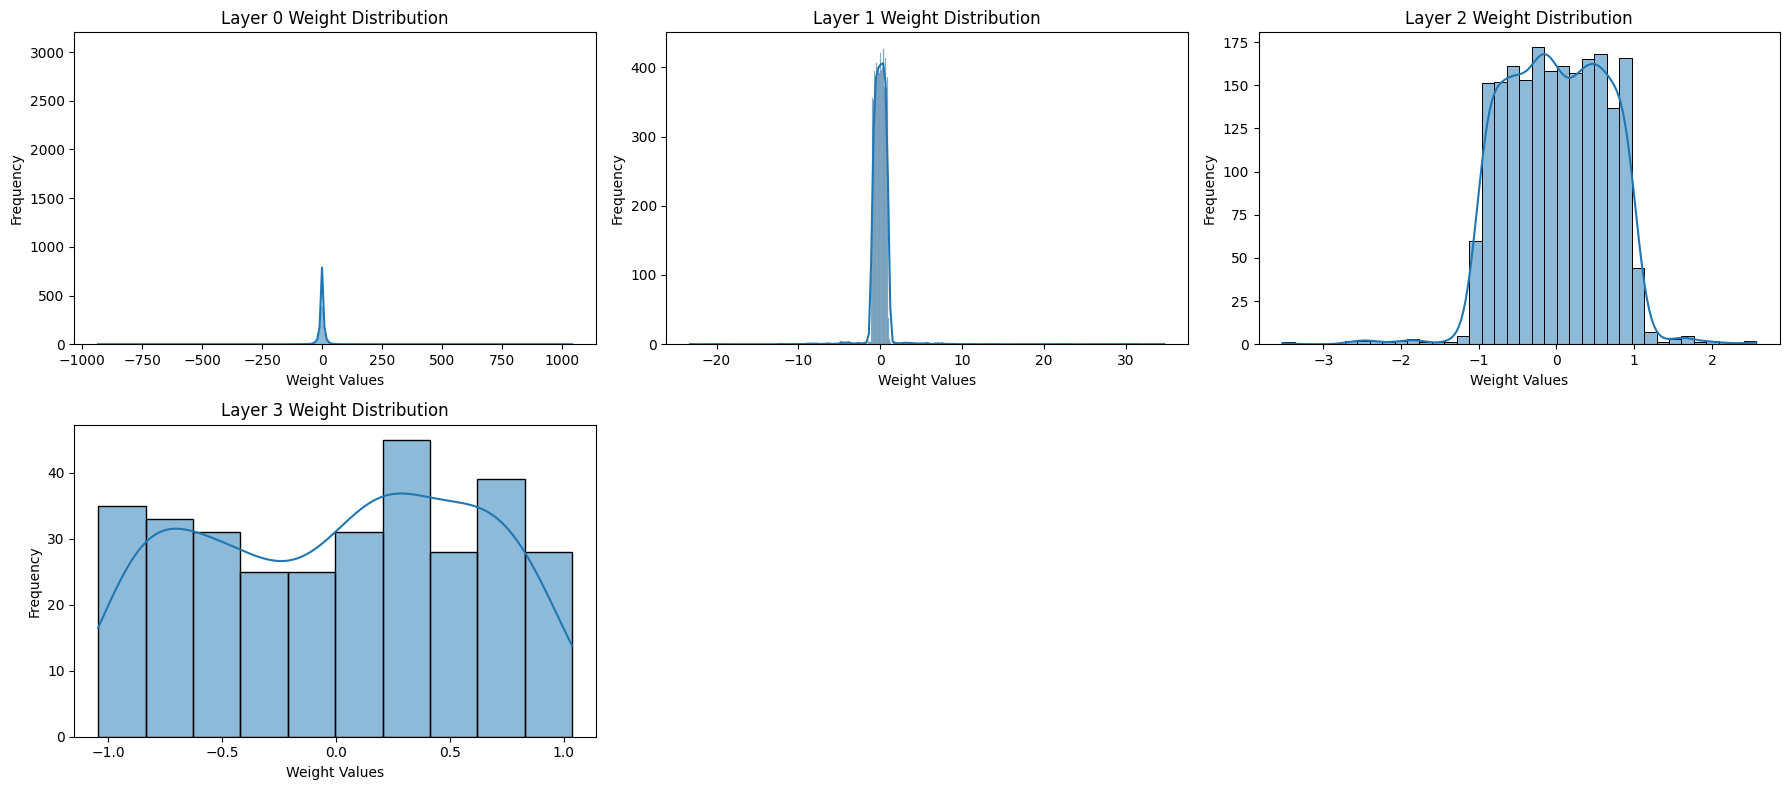

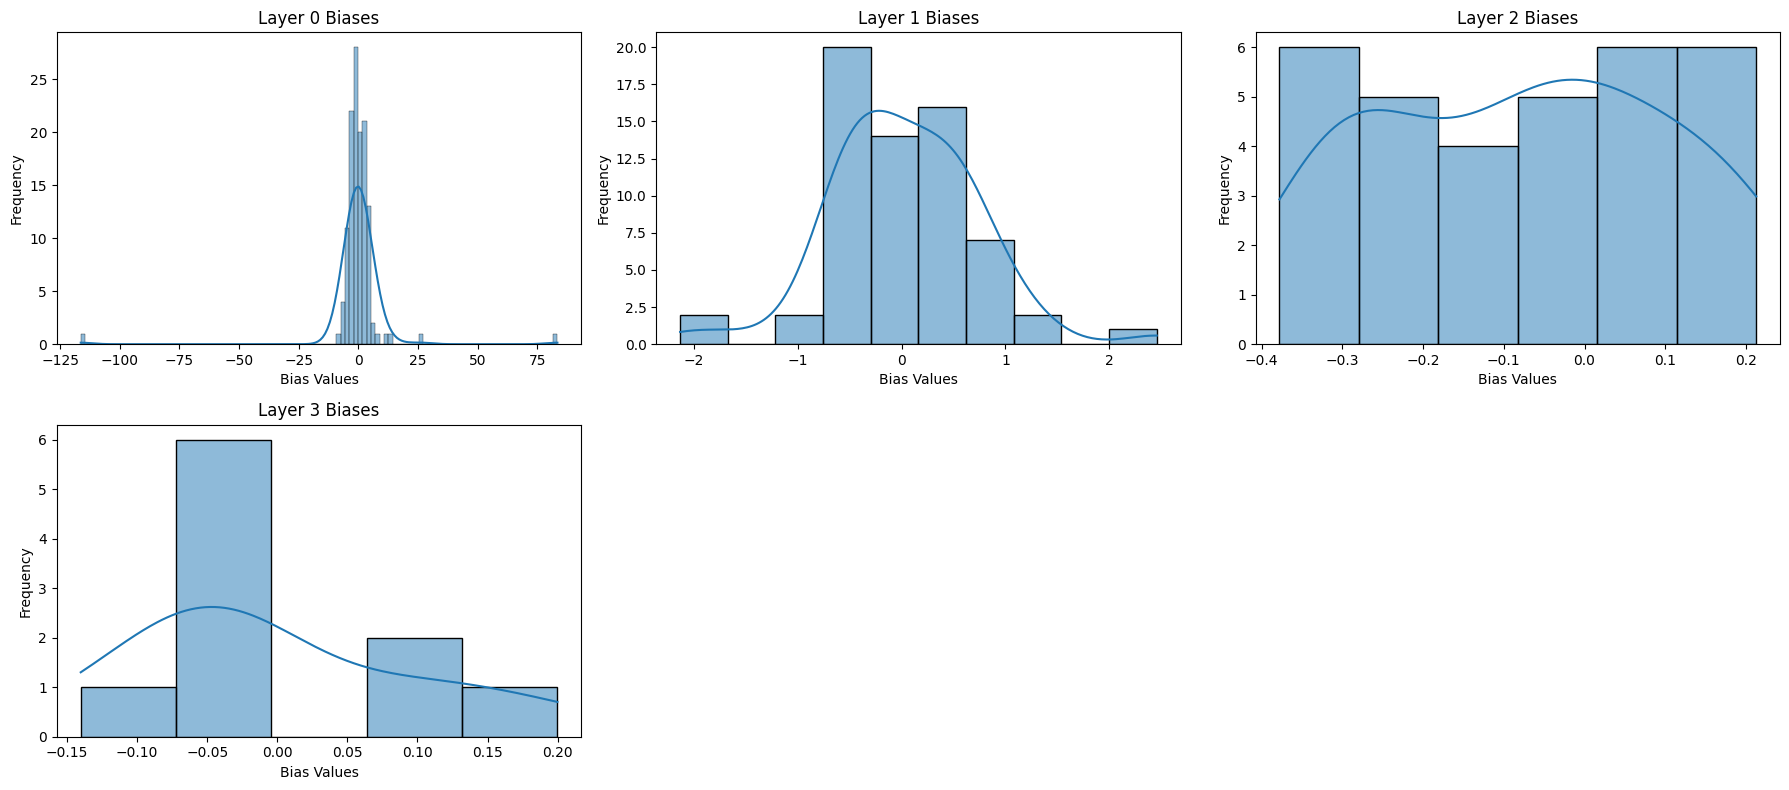

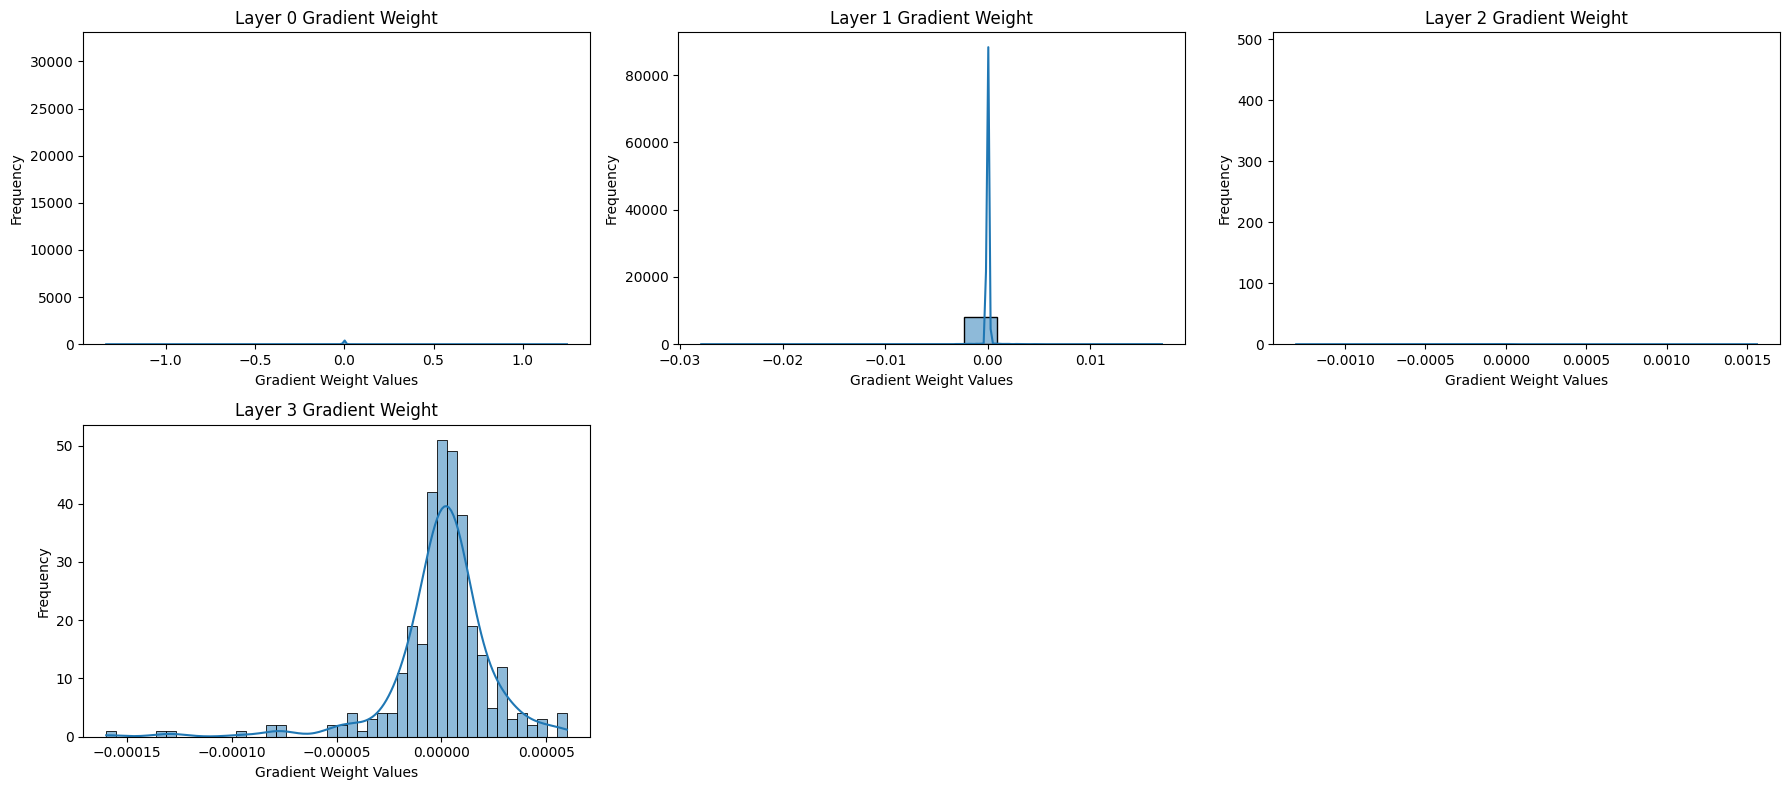

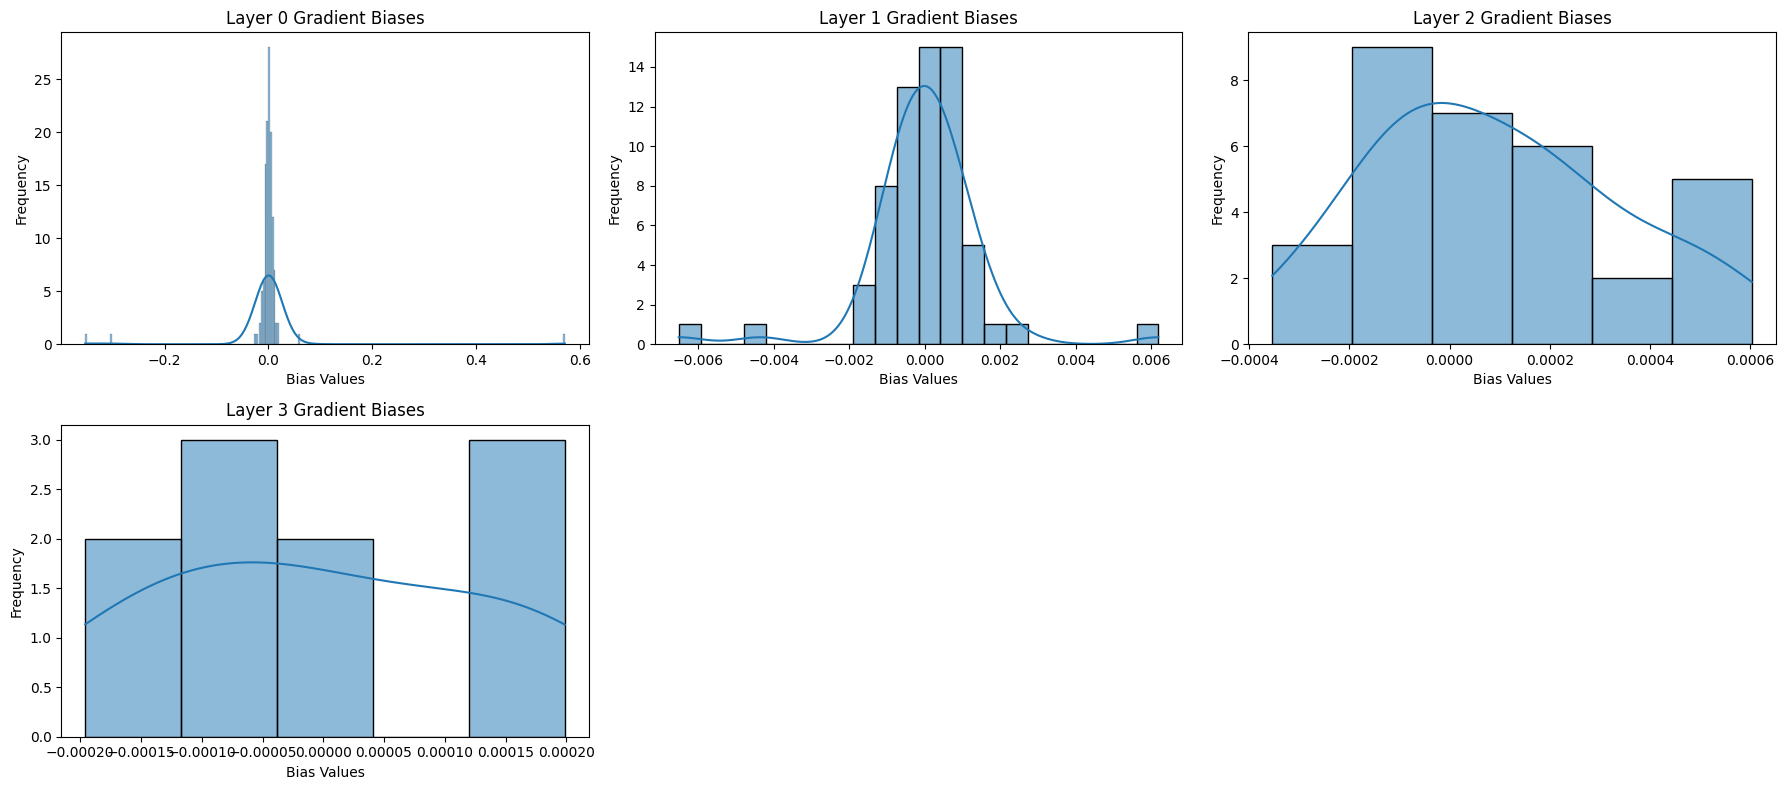

In [ ]:
model_lr_high.plot_weight_distribution()
model_lr_high.plot_biases_distribution()
model_lr_high.plot_gradient_weight_distribution()
model_lr_high.plot_gradient_biases_distribution()

## Test Pengaruh Weight Initialization


🚀 Running for initialization method: zero
Accuracy: 0.0994
Predictions: [9 9 9 9 9 9 9 9 9 9]
Target: [2 9 0 0 4 3 2 9 0 4]

📈 Loss Curve for init=zero


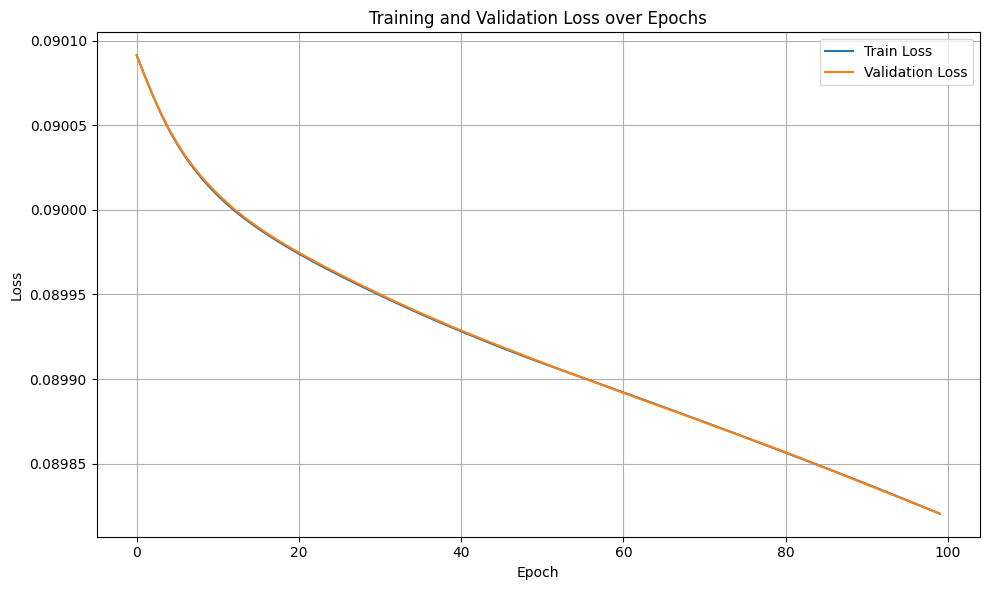


⚖️ Weight Distribution for init=zero


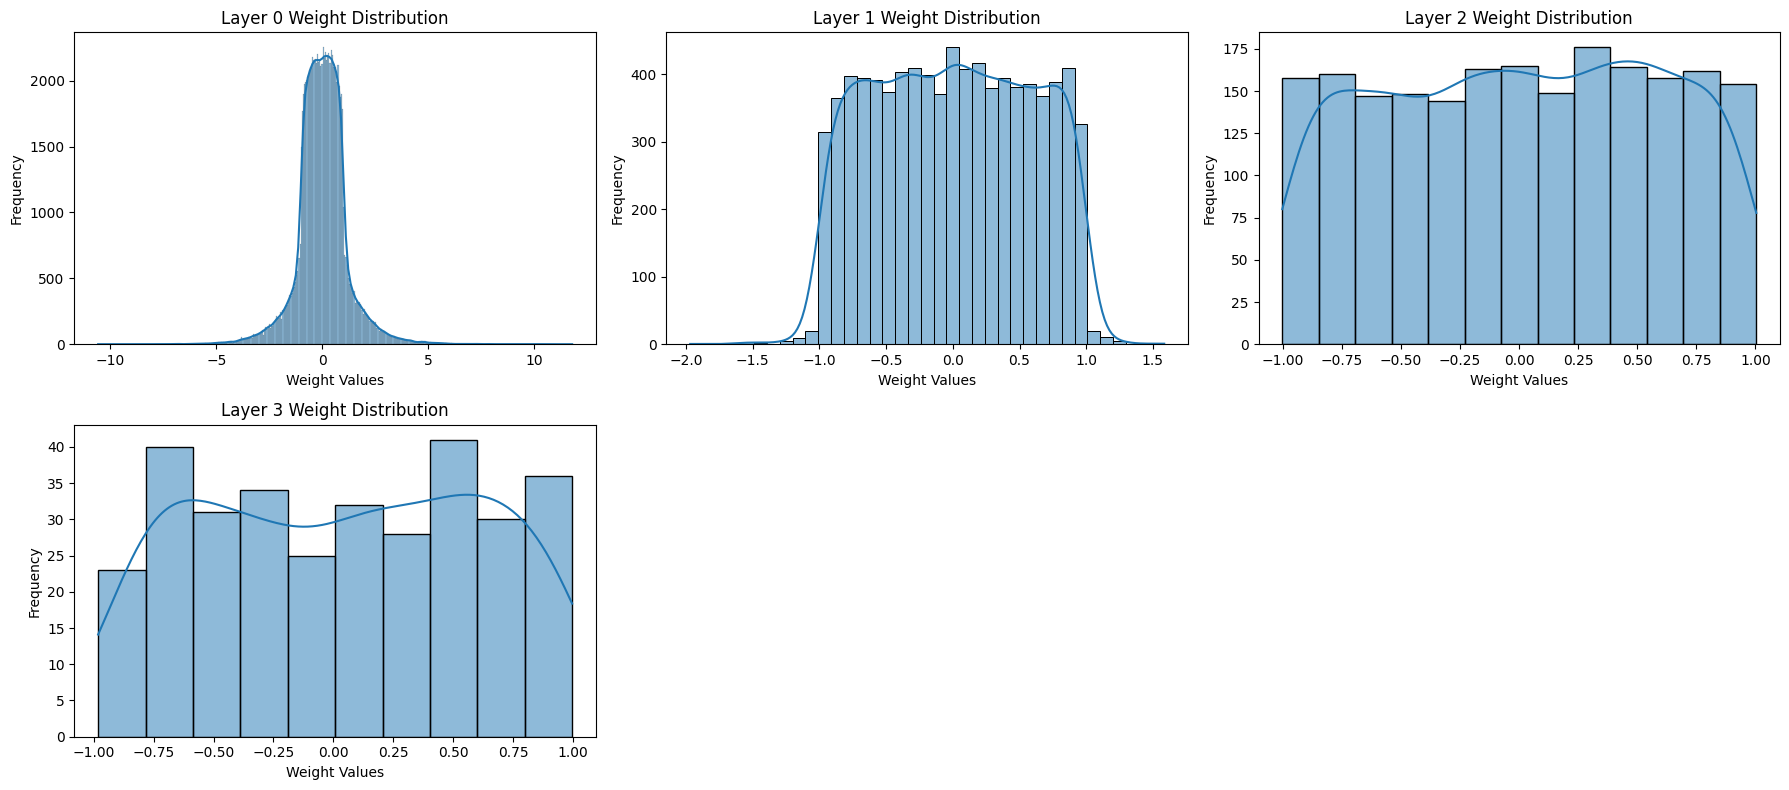


🌀 Gradient Distribution for init=zero


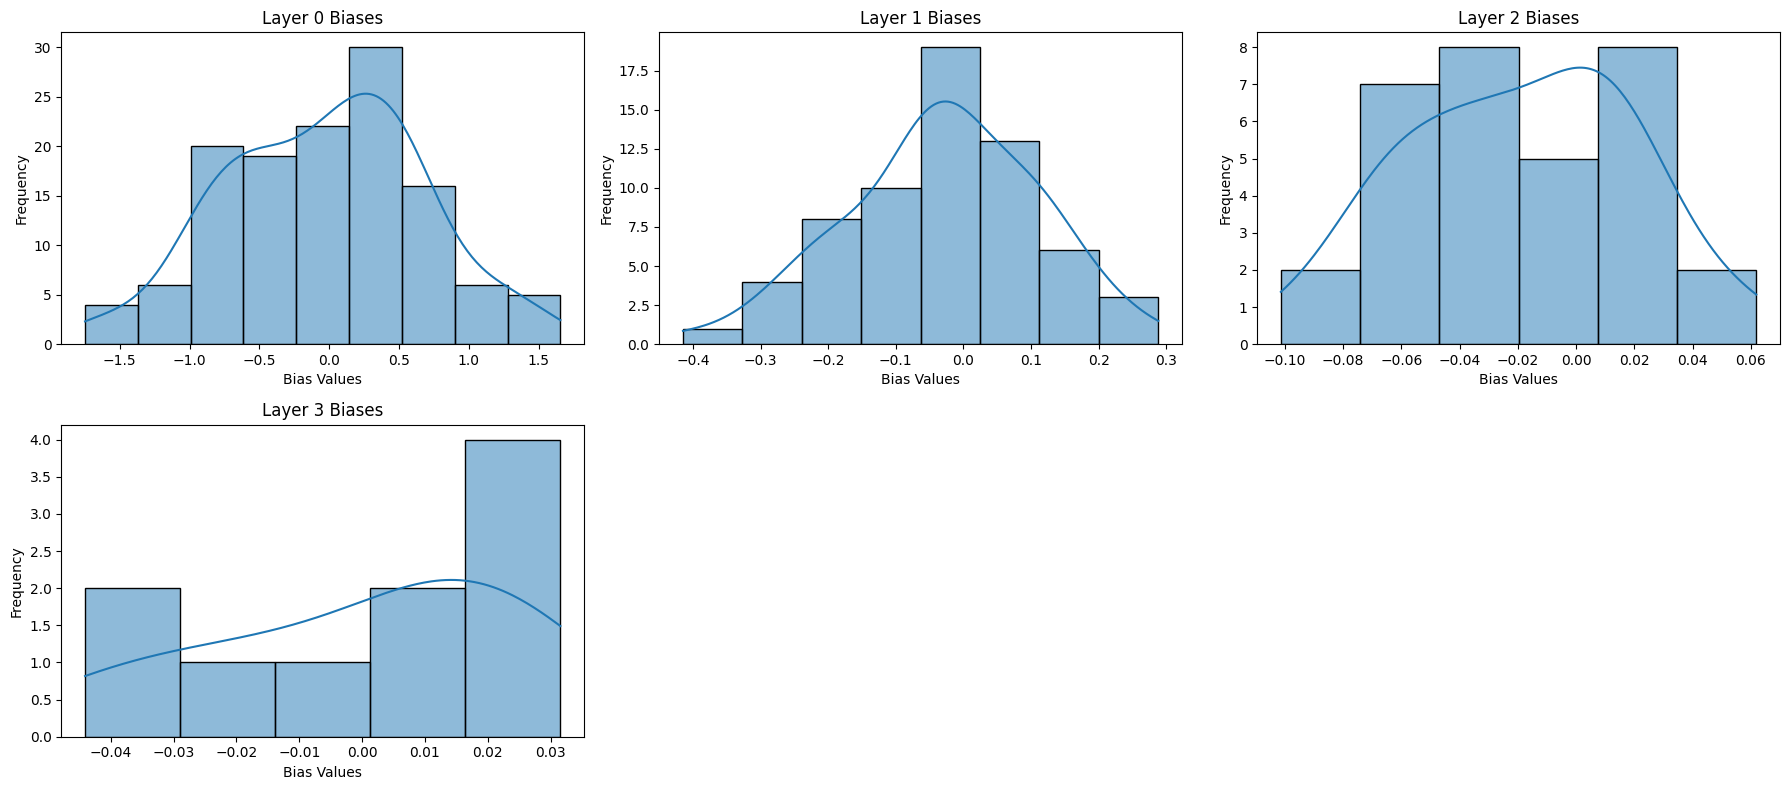


🚀 Running for initialization method: uniform
Accuracy: 0.1042
Predictions: [7 7 7 7 7 7 7 7 7 7]
Target: [2 9 0 0 4 3 2 9 0 4]

📈 Loss Curve for init=uniform


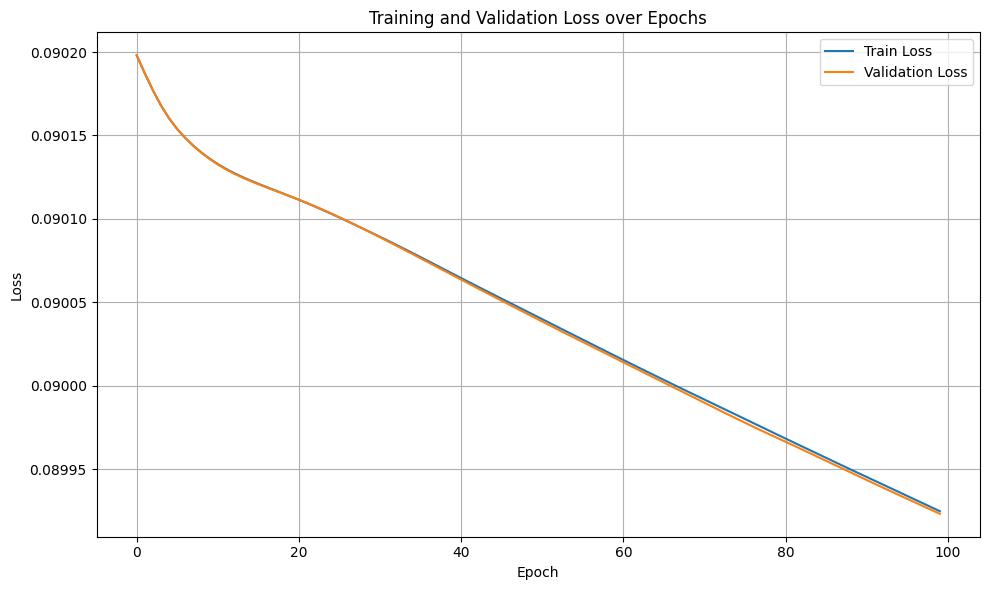


⚖️ Weight Distribution for init=uniform


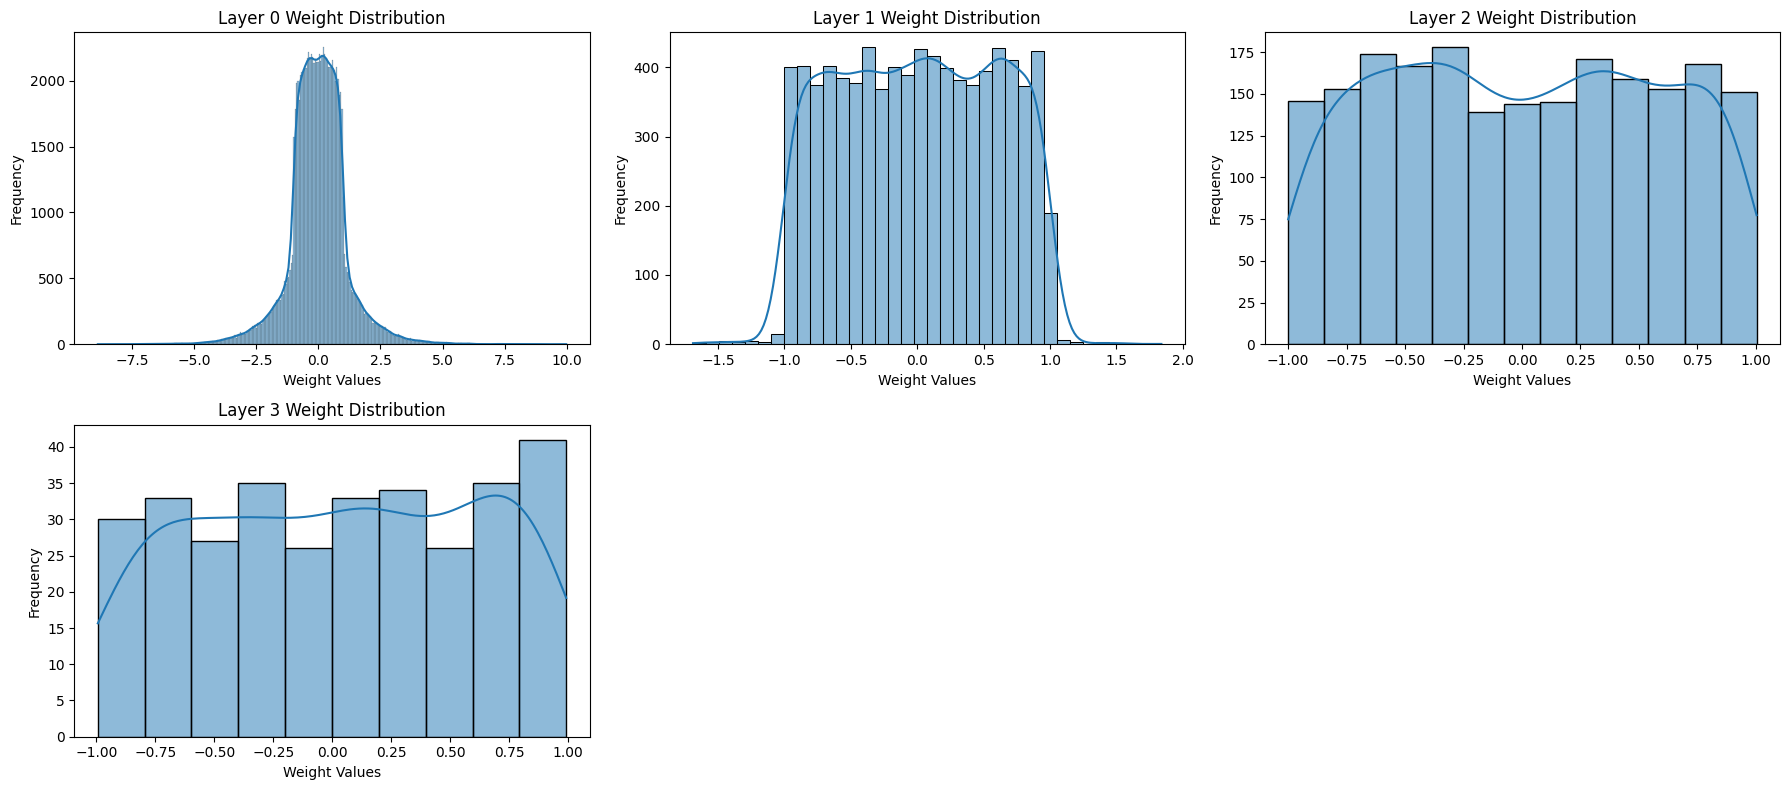


🌀 Gradient Distribution for init=uniform


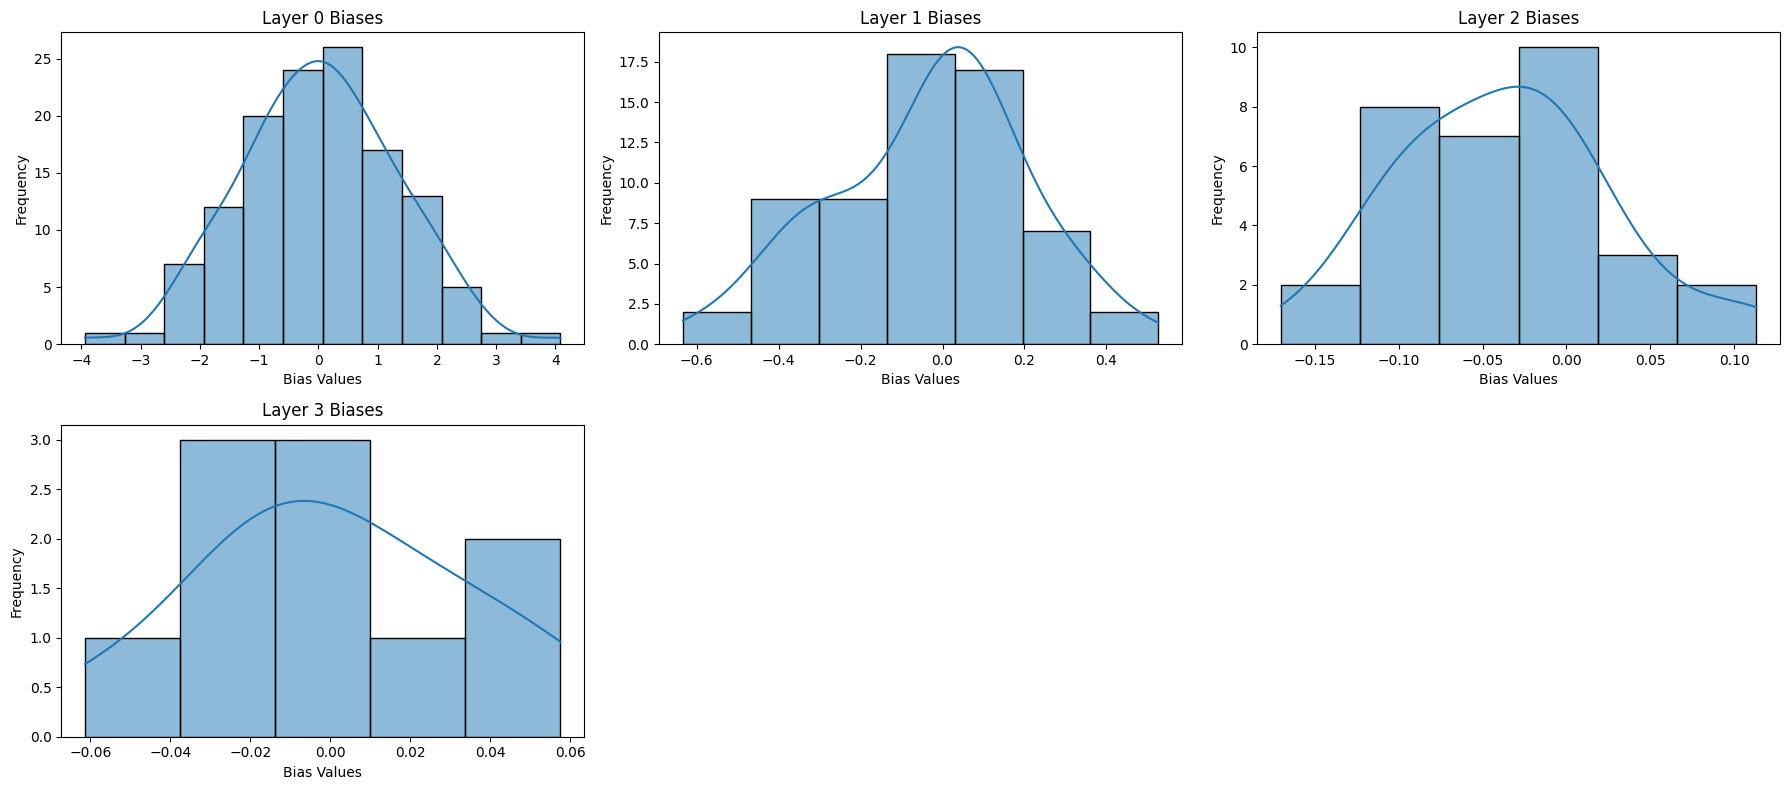


🚀 Running for initialization method: normal
Accuracy: 0.0998
Predictions: [2 2 2 2 2 2 2 2 2 2]
Target: [2 9 0 0 4 3 2 9 0 4]

📈 Loss Curve for init=normal


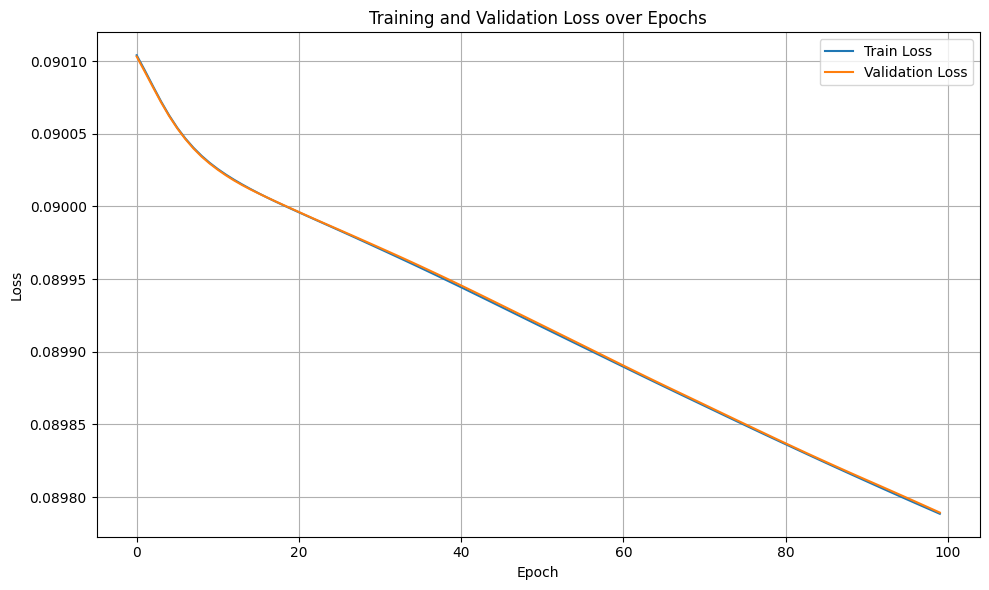


⚖️ Weight Distribution for init=normal


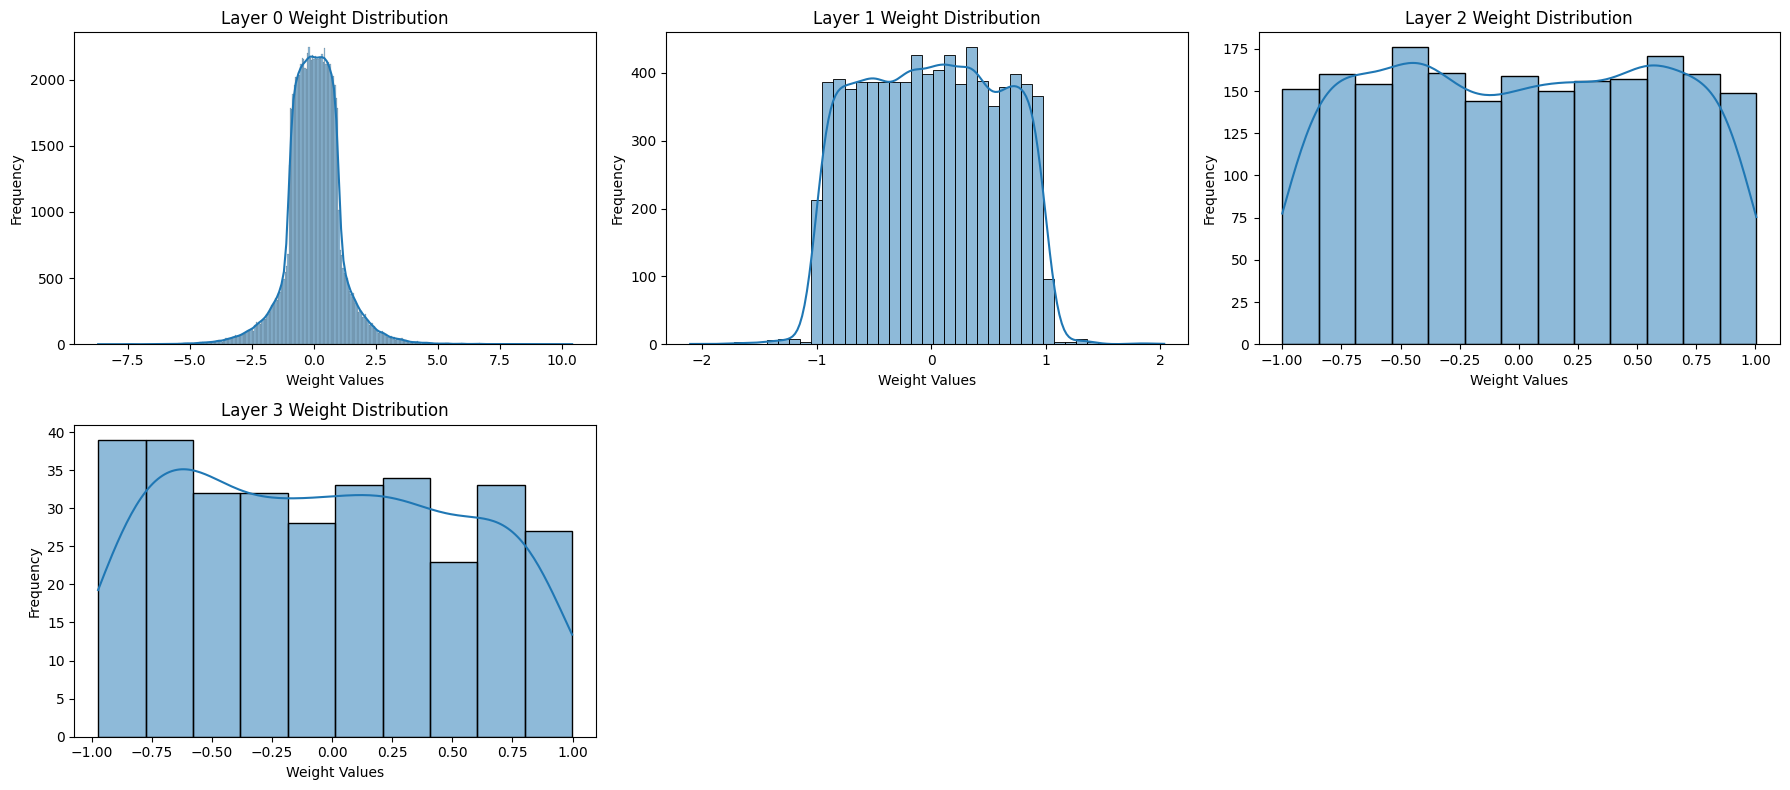


🌀 Gradient Distribution for init=normal


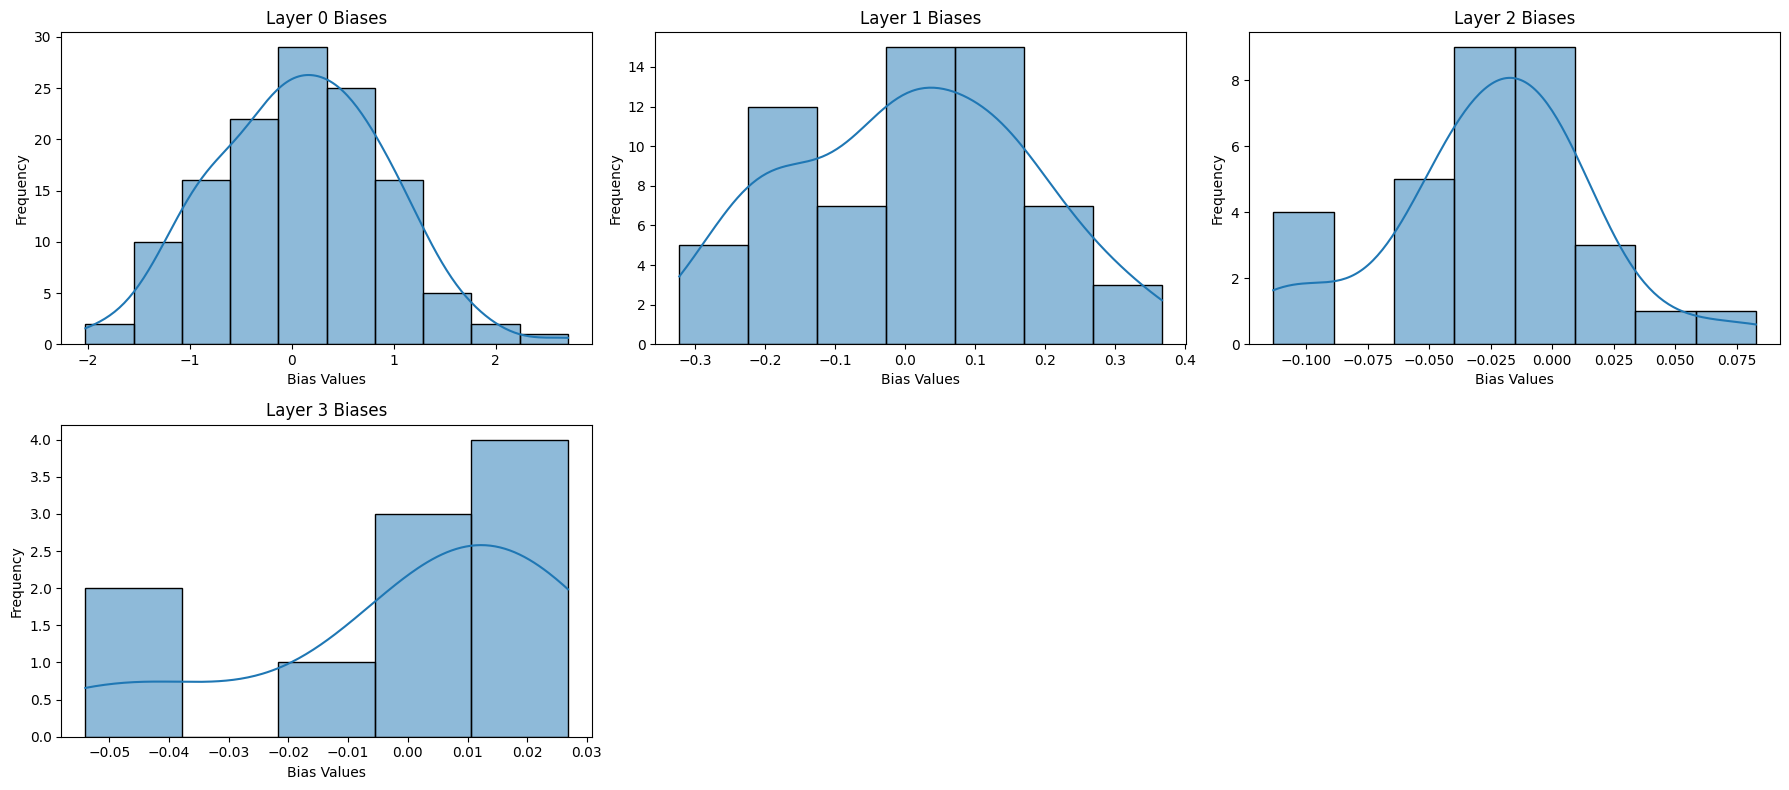


🚀 Running for initialization method: xavier_uniform
Accuracy: 0.1636
Predictions: [6 6 6 6 6 7 7 7 6 6]
Target: [2 9 0 0 4 3 2 9 0 4]

📈 Loss Curve for init=xavier_uniform


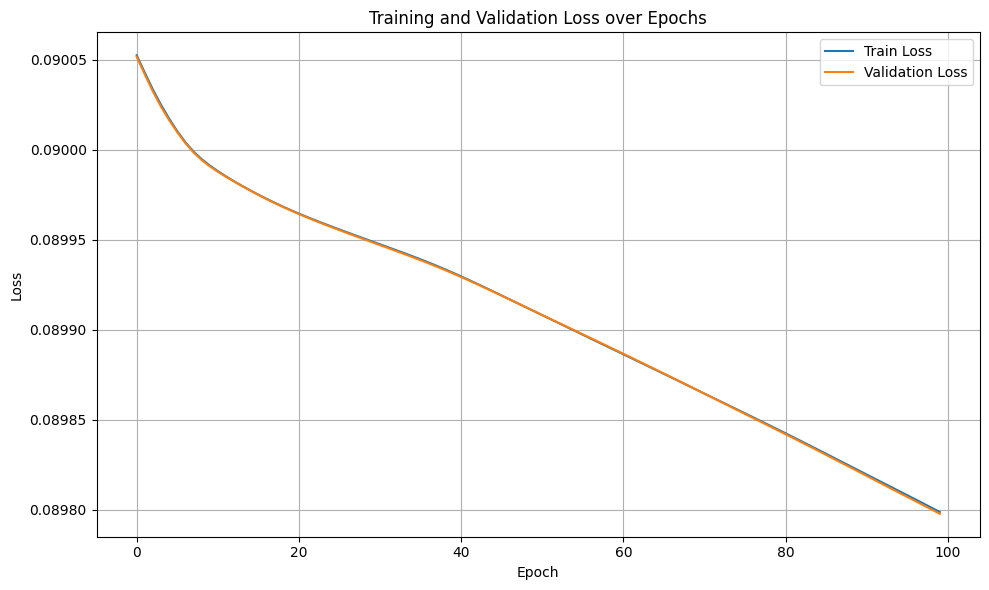


⚖️ Weight Distribution for init=xavier_uniform


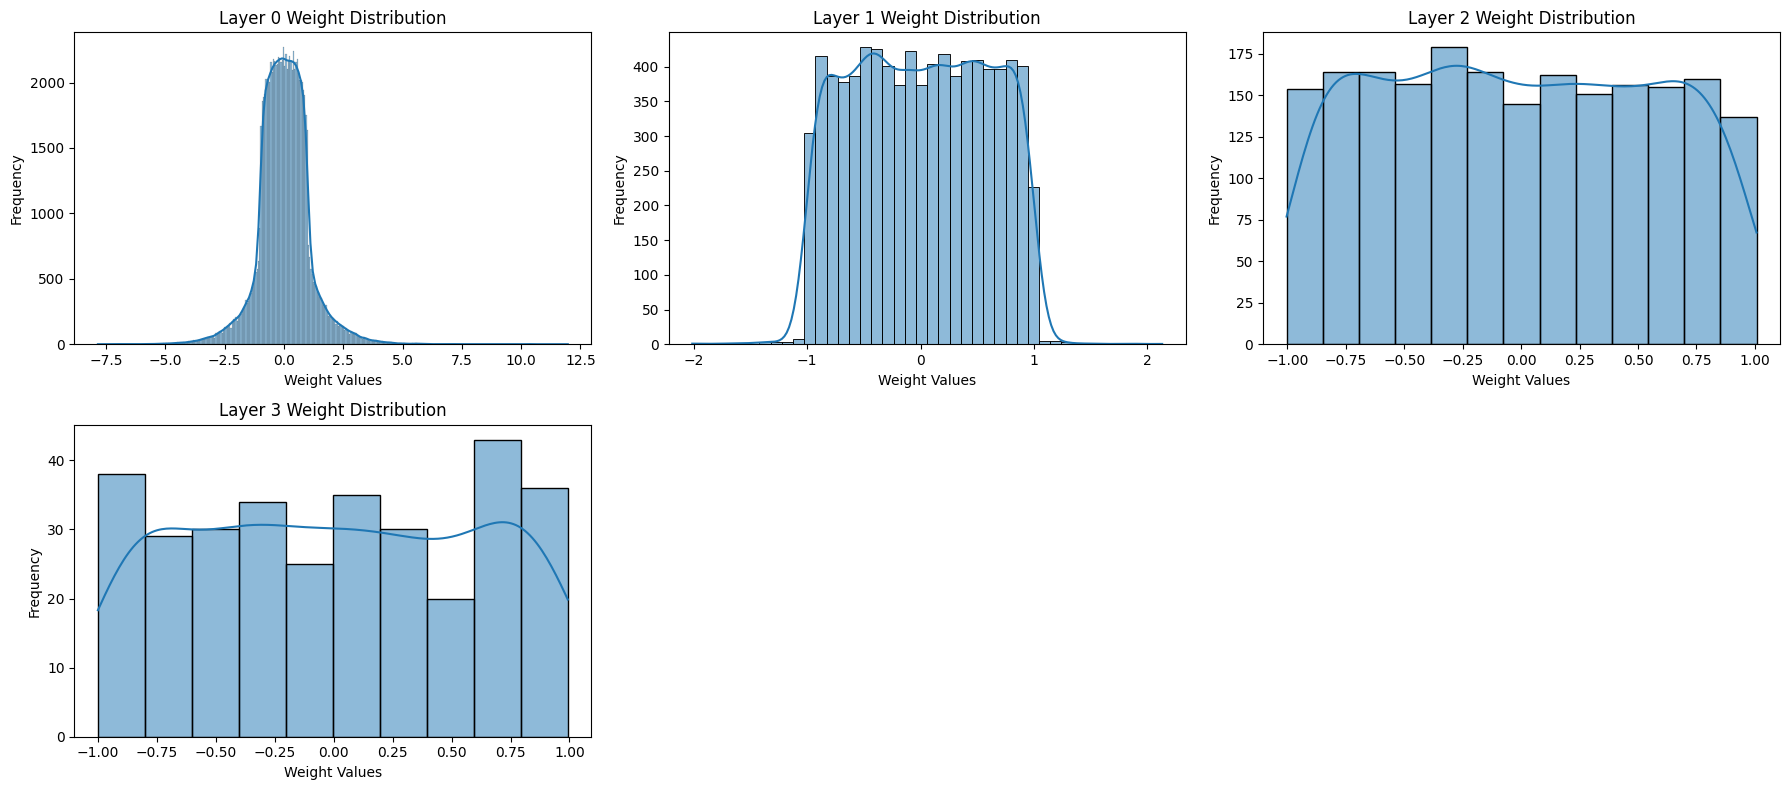


🌀 Gradient Distribution for init=xavier_uniform


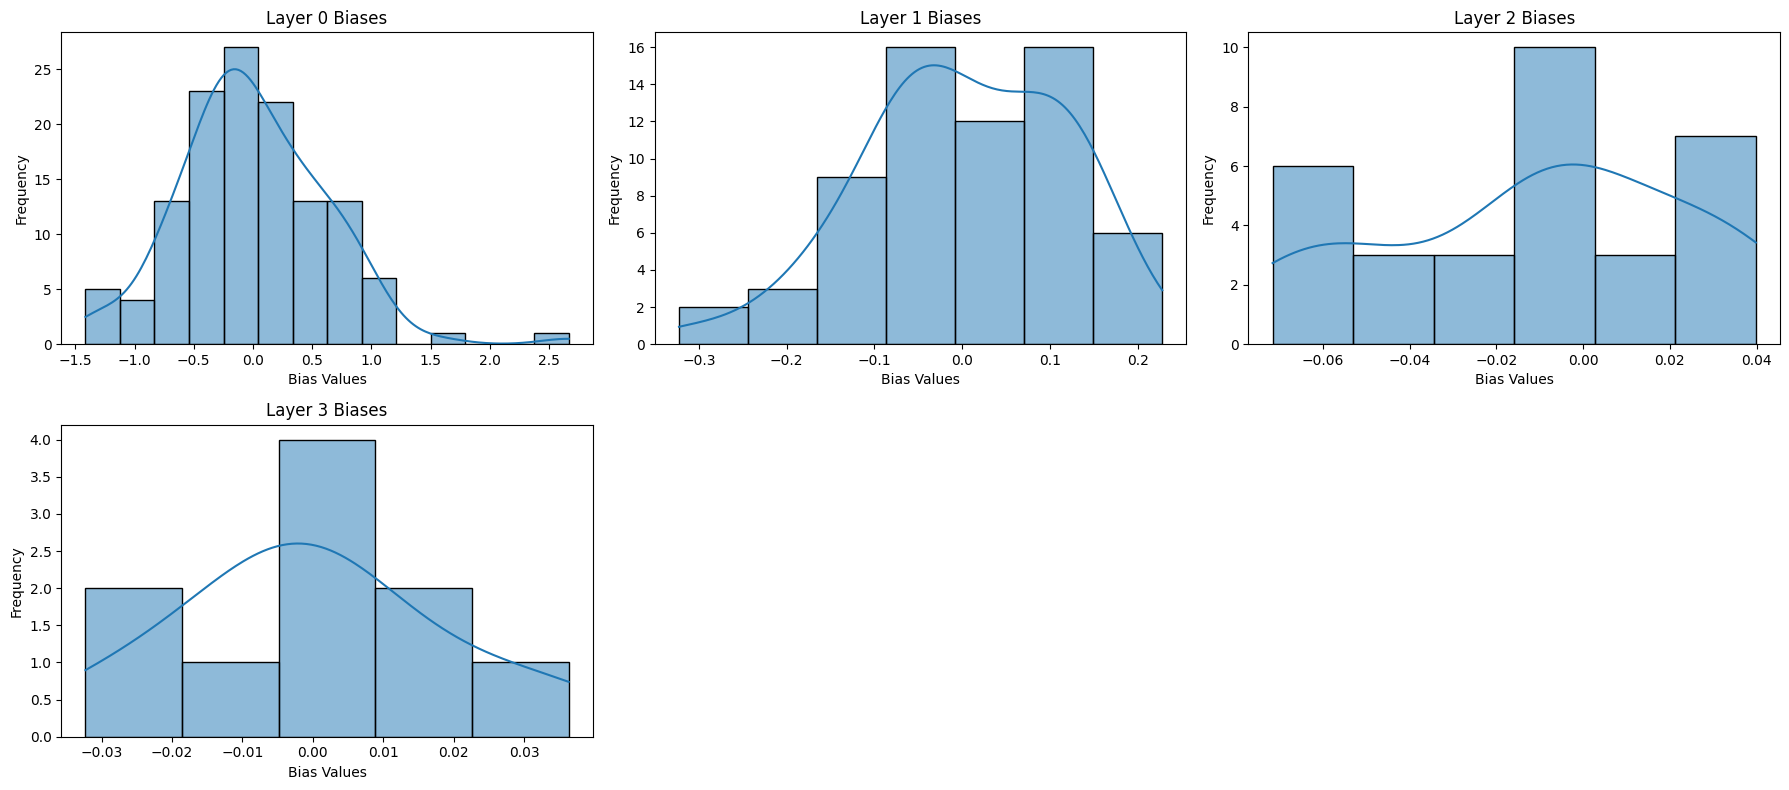


🚀 Running for initialization method: xavier_normal
Accuracy: 0.2678
Predictions: [4 1 0 0 4 1 1 1 0 4]
Target: [2 9 0 0 4 3 2 9 0 4]

📈 Loss Curve for init=xavier_normal


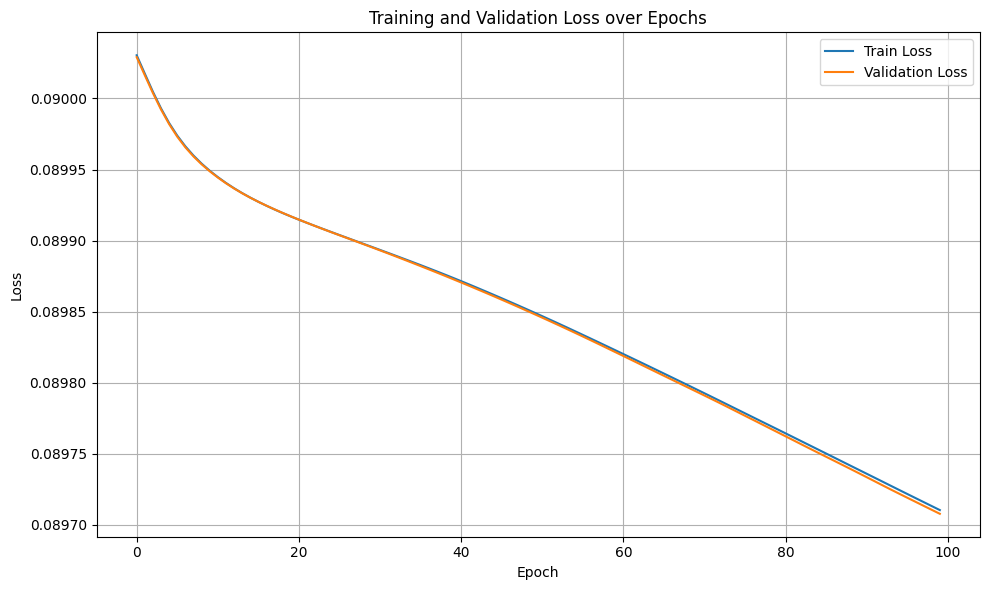


⚖️ Weight Distribution for init=xavier_normal


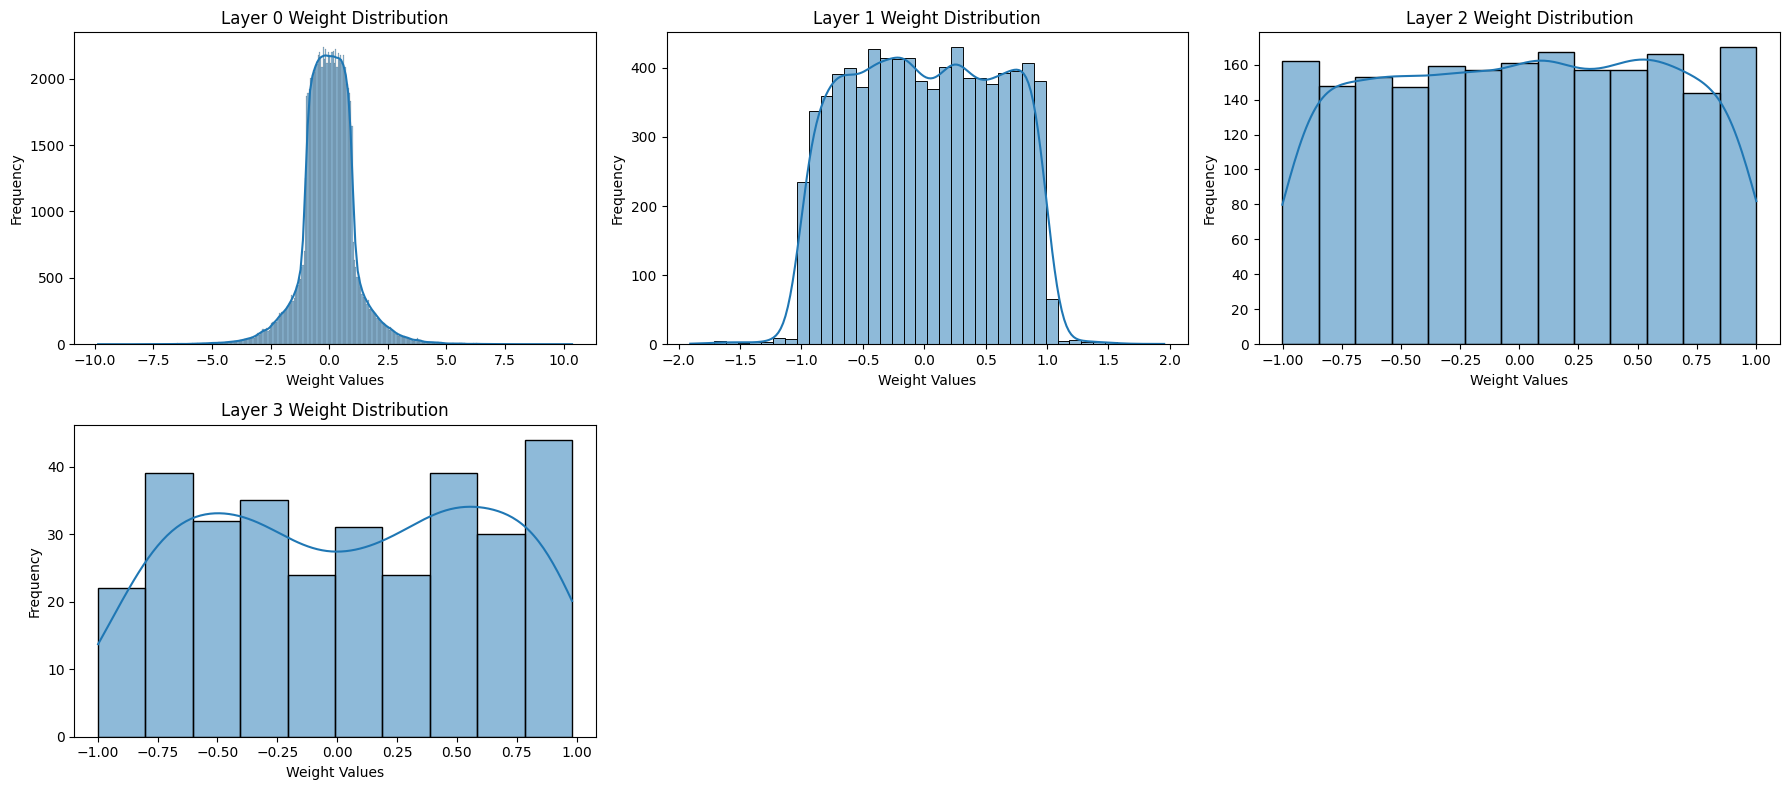


🌀 Gradient Distribution for init=xavier_normal


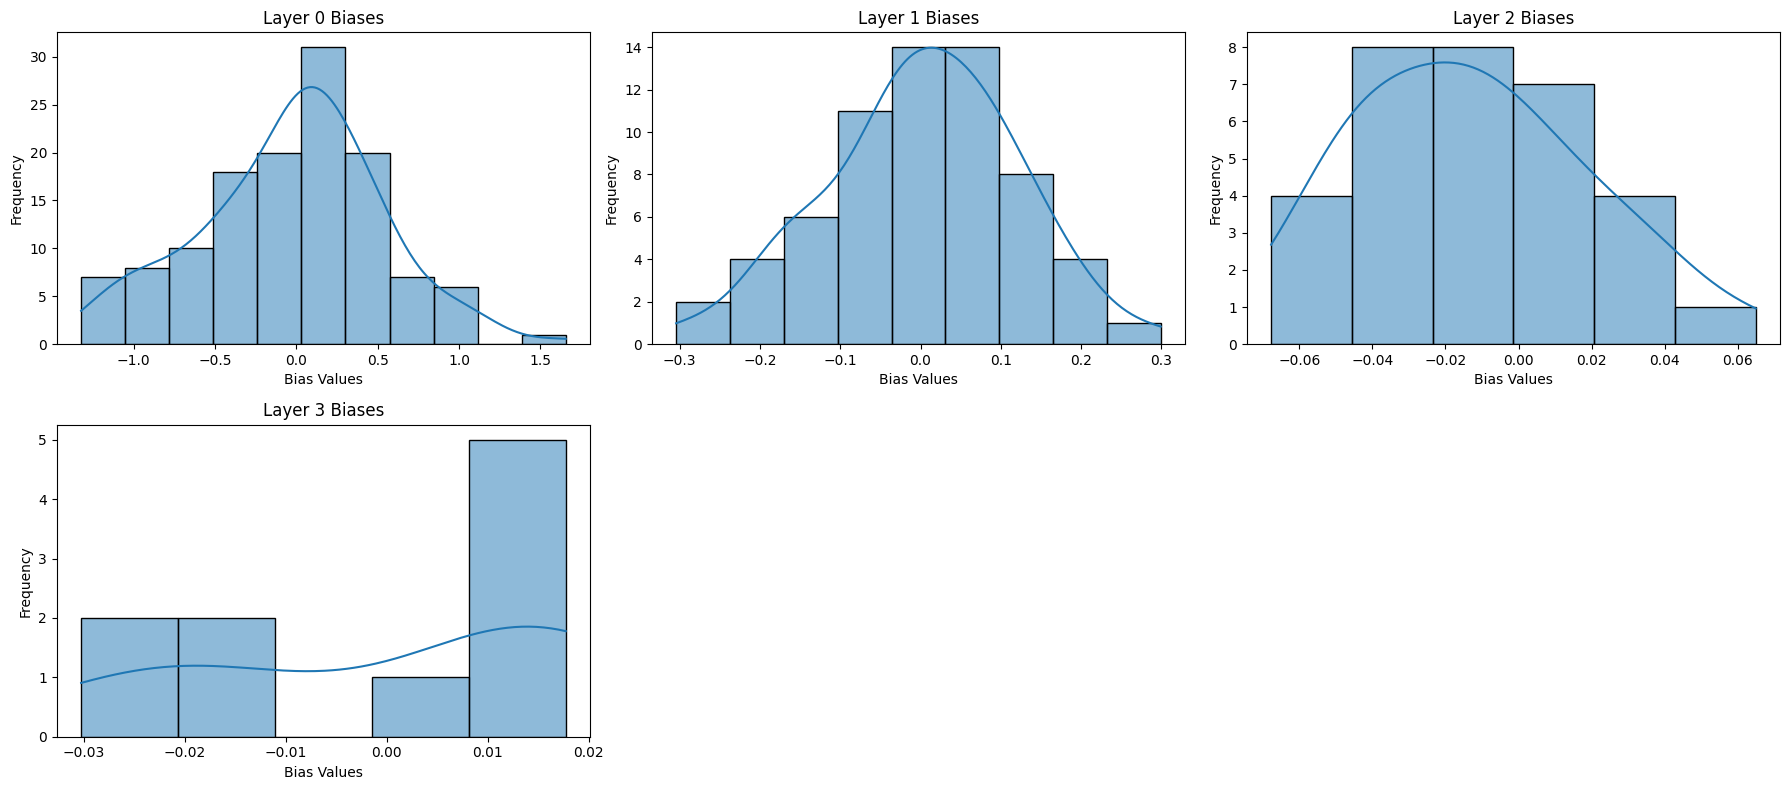


🚀 Running for initialization method: he_normal
Accuracy: 0.0986
Predictions: [0 0 0 0 0 0 0 0 0 0]
Target: [2 9 0 0 4 3 2 9 0 4]

📈 Loss Curve for init=he_normal


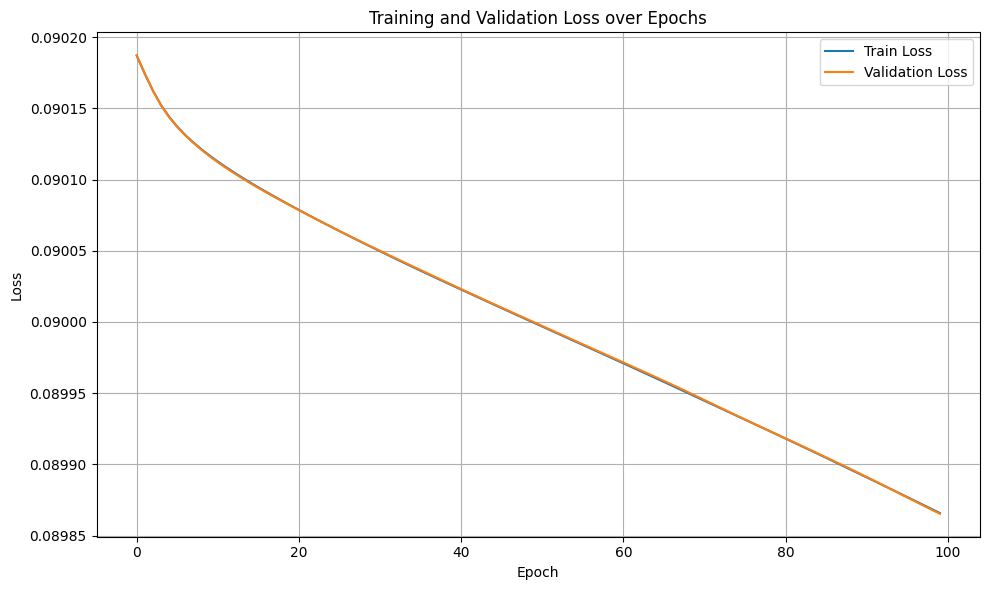


⚖️ Weight Distribution for init=he_normal


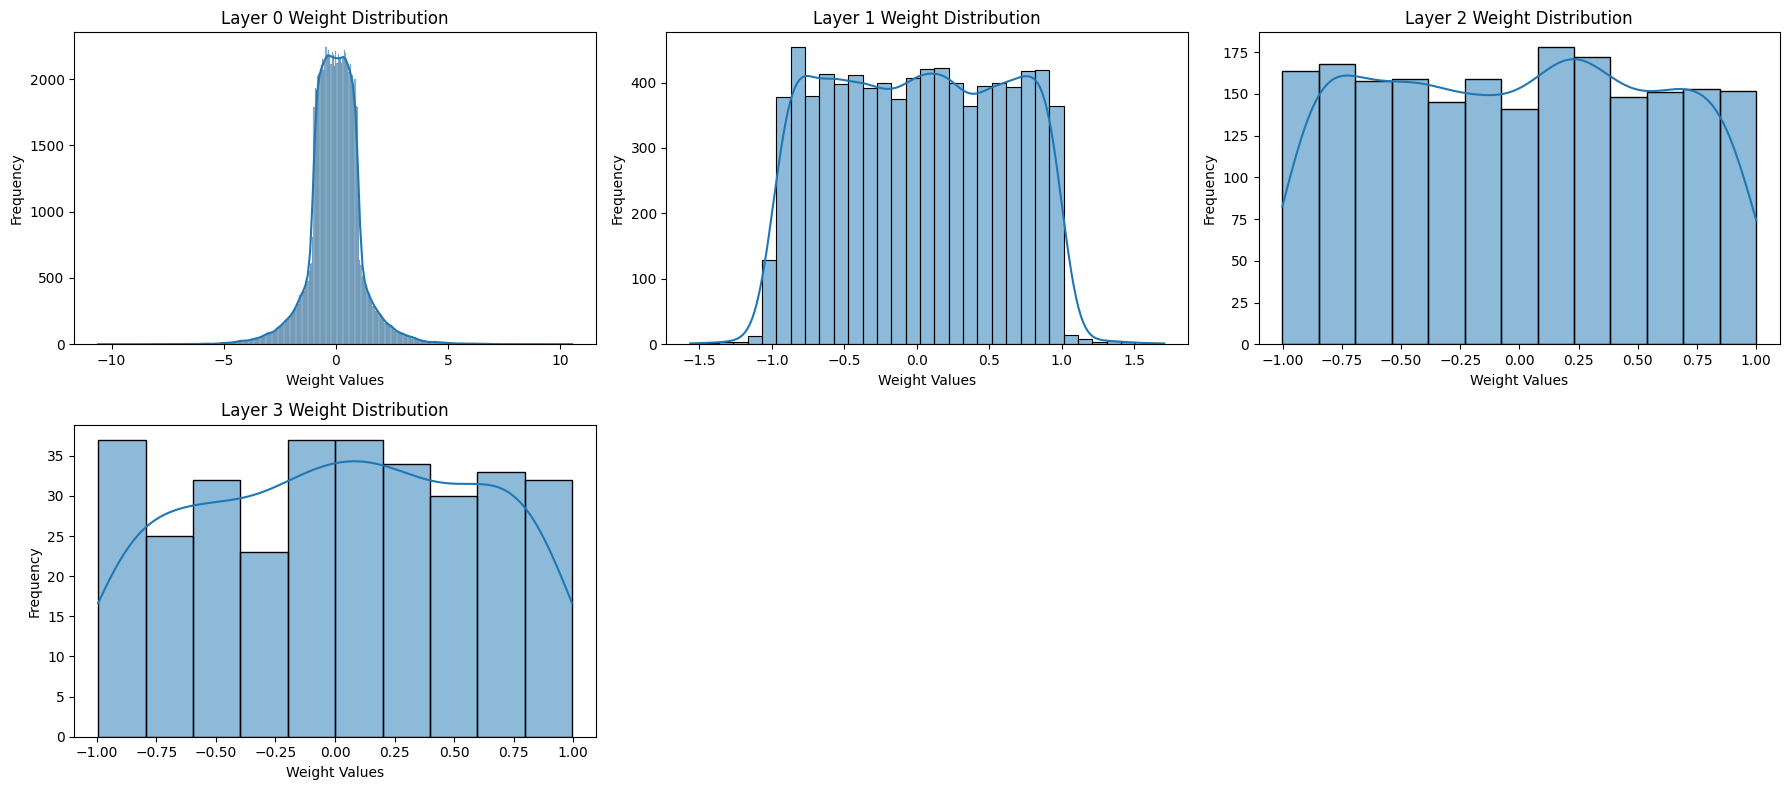


🌀 Gradient Distribution for init=he_normal


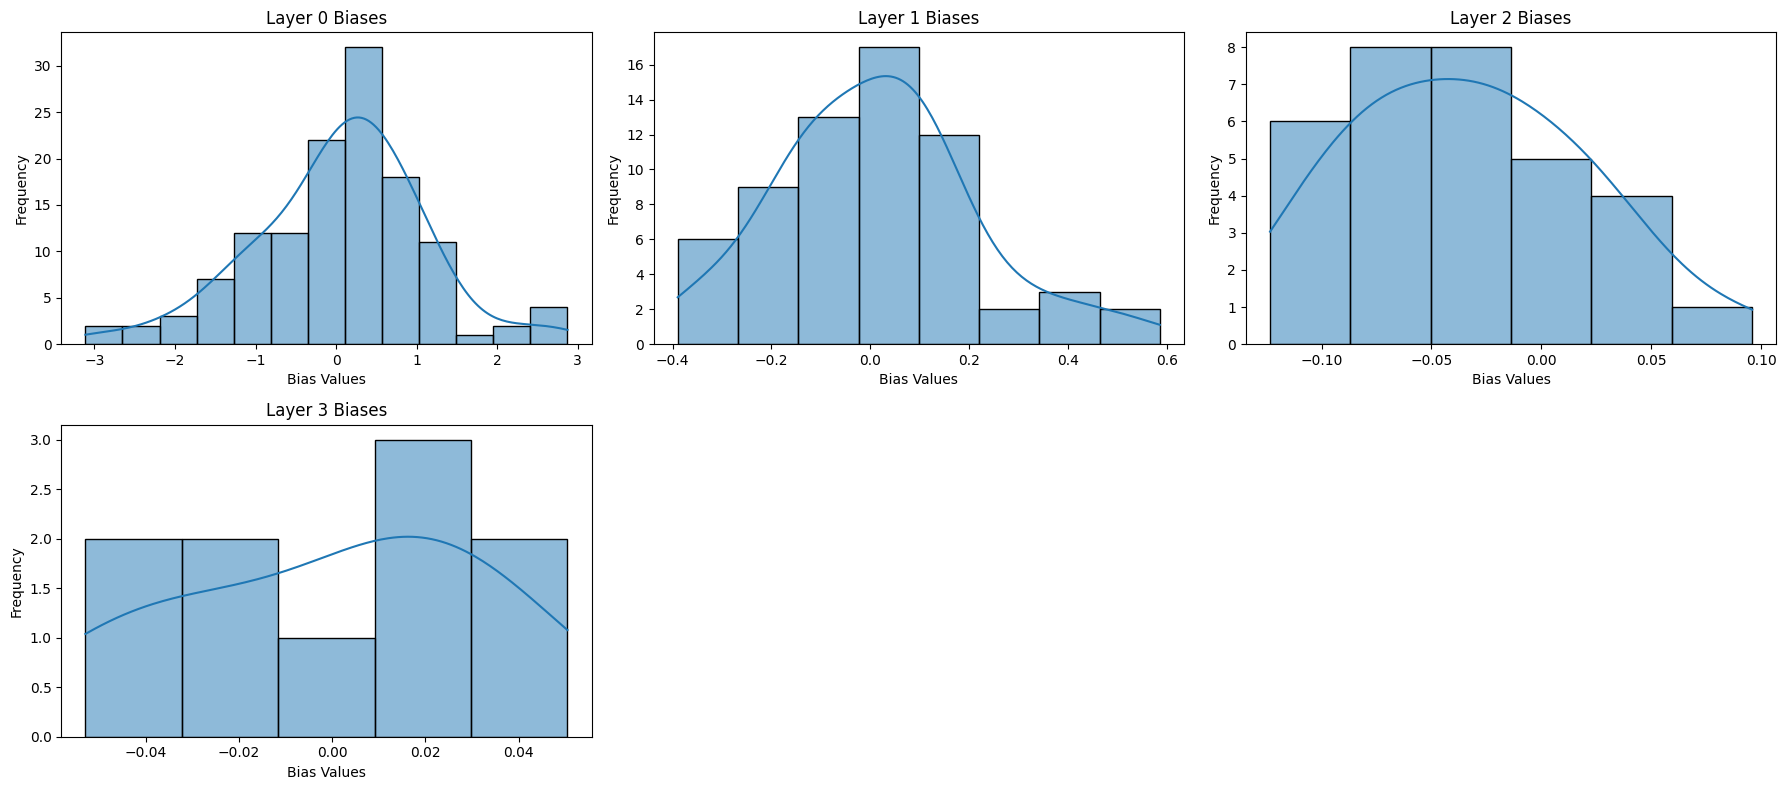


🚀 Running for initialization method: he_uniform
Accuracy: 0.1674
Predictions: [2 2 2 2 2 2 7 7 2 2]
Target: [2 9 0 0 4 3 2 9 0 4]

📈 Loss Curve for init=he_uniform


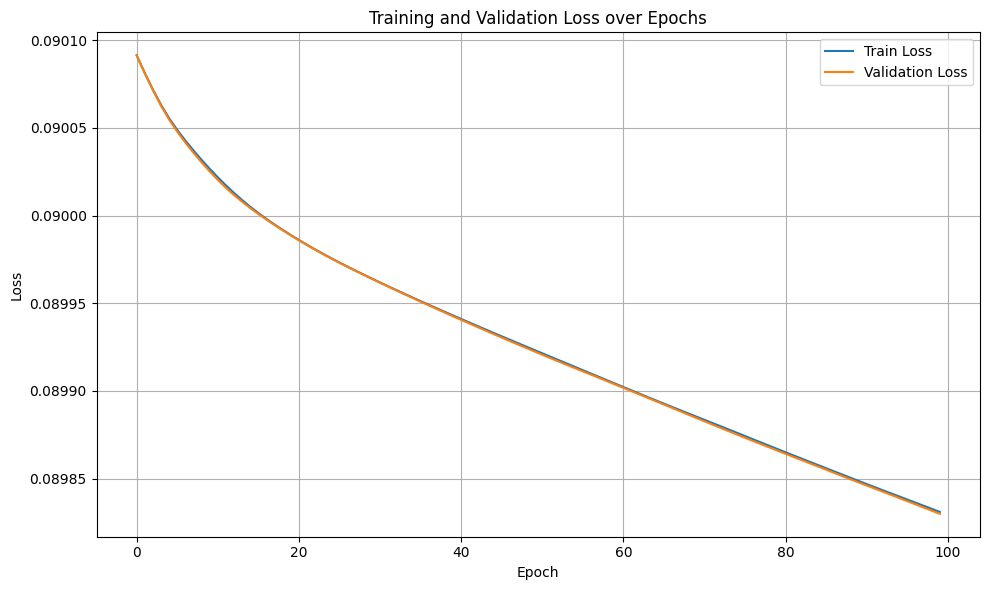


⚖️ Weight Distribution for init=he_uniform


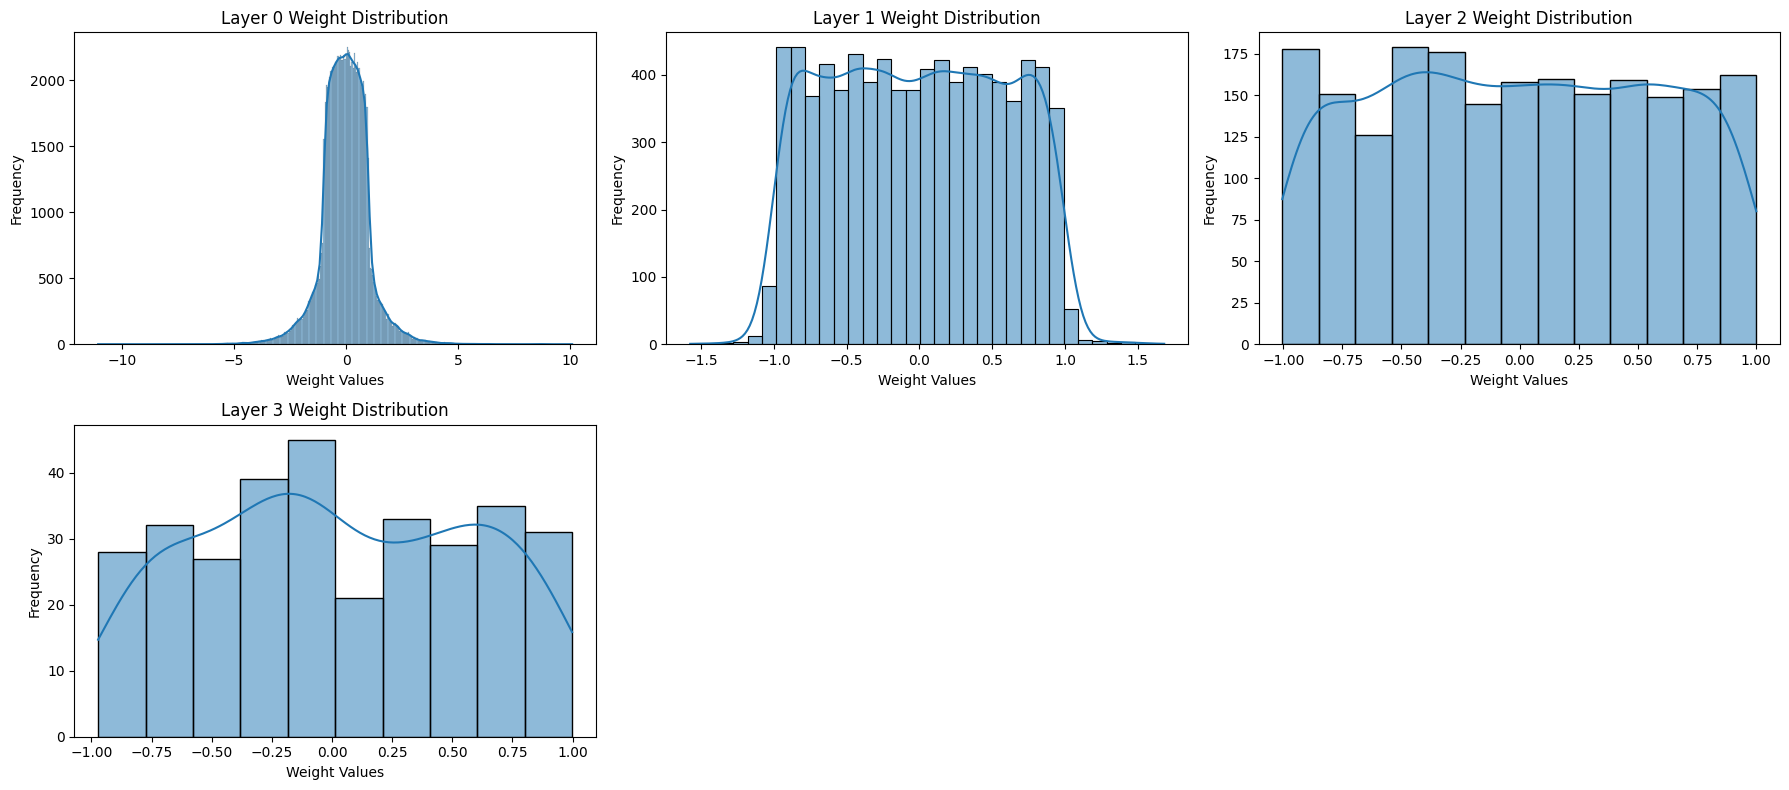


🌀 Gradient Distribution for init=he_uniform


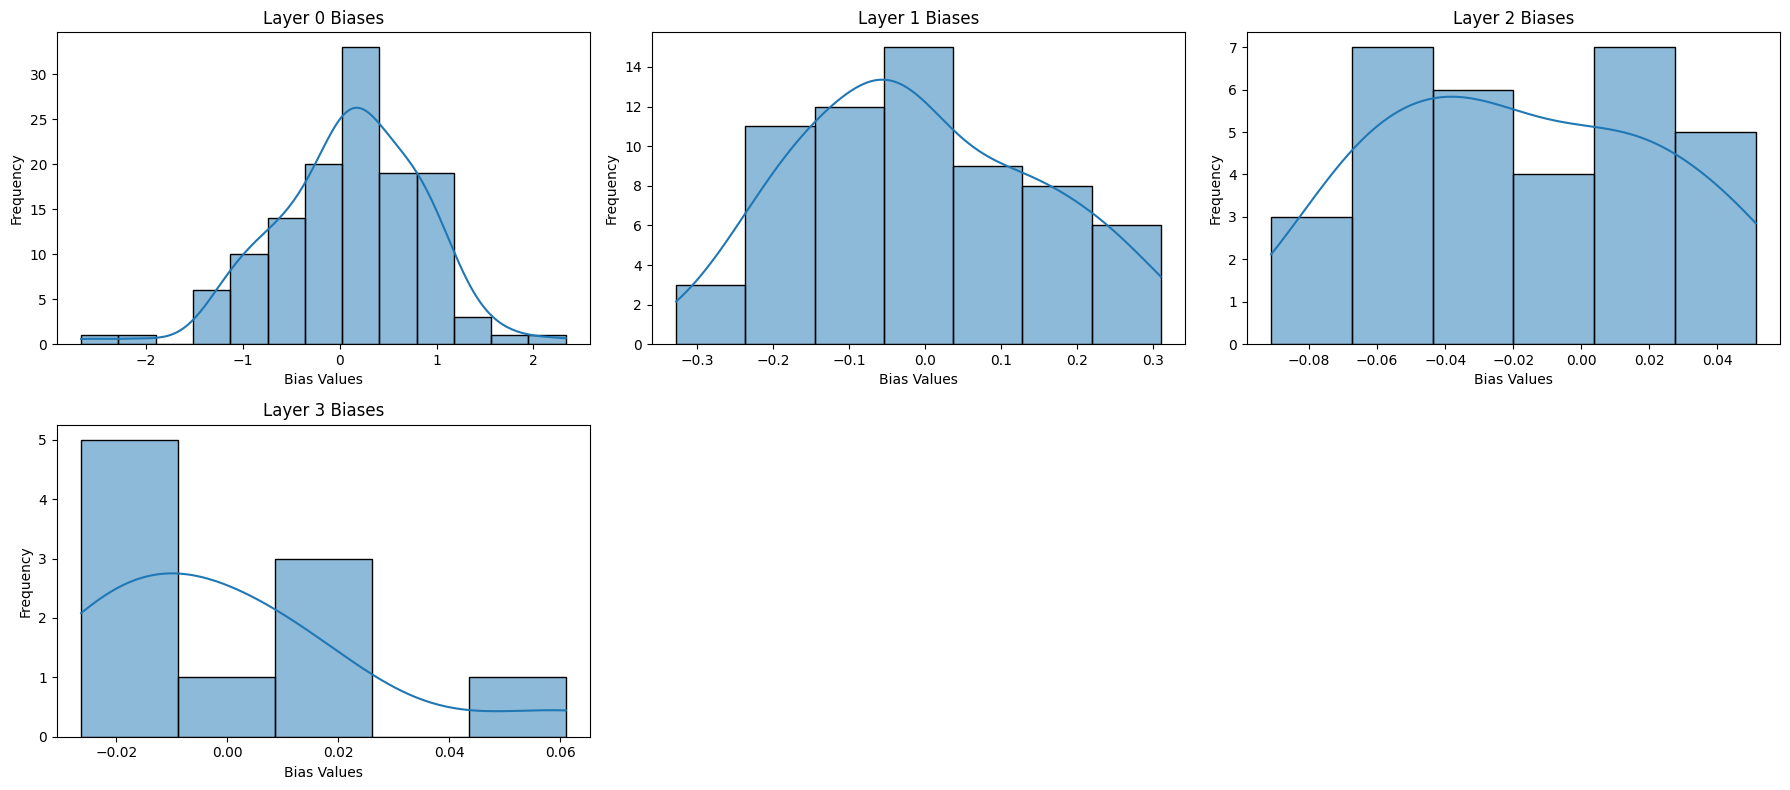

In [ ]:
def run_init_experiment(init_method):
    model = FFNN(
        loss='mse',
        batch_size=200,
        learning_rate=0.01,
        epochs=100,
        verbose=0
    )

    model.build_layers(
        Layer(n_neurons=128, init='uniform', activation='softmax'),
        Layer(n_neurons=64, init='uniform', activation='softmax'),
        Layer(n_neurons=32, init='uniform', activation='softmax'),
        Layer(n_neurons=10, init='uniform', activation='softmax'),
    )

    model.fit(X_train, y_train, X_val=X_val, y_val=y_val)

    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_pred_labels == y_test)

    return model, accuracy, y_pred_labels

# ------------------------ Run Semua Init ----------------------------
initializations = [
    'zero', 
    'uniform', 
    'normal', 
    'xavier_uniform', 
    'xavier_normal', 
    'he_normal', 
    'he_uniform'
]

init_results = {}

for init in initializations:
    print(f"\n🚀 Running for initialization method: {init}")
    model, acc, preds = run_init_experiment(init)

    init_results[init] = {
        "model": model,
        "accuracy": acc,
        "preds": preds
    }

    print(f"Accuracy: {acc:.4f}")
    print(f"Predictions: {preds[:10]}")
    print(f"Target: {y_test[:10]}")

    print(f"\n📈 Loss Curve for init={init}")
    model.plot_training_loss()
    plt.show()

    print(f"\n⚖️ Weight Distribution for init={init}")
    model.plot_weight_distribution()
    plt.show()

    print(f"\n🌀 Gradient Distribution for init={init}")
    model.plot_biases_distribution()
    plt.show()

## FFNN - Scratch (Basic) vs MLPClassifier - Library Sklearn

In [ ]:
def run_scratch_ffnn():
    model = FFNN(
        loss='cce',
        batch_size=200,
        learning_rate=0.01,
        epochs=100,
        verbose=0
    )

    model.build_layers(
        Layer(n_neurons=128, init='he_uniform', activation='relu'),
        Layer(n_neurons=64, init='he_uniform', activation='relu'),
        Layer(n_neurons=32, init='he_uniform', activation='relu'),
        Layer(n_neurons=10, init='he_uniform', activation='relu')
    )

    model.fit(X_train, y_train, X_val=X_val, y_val=y_val)

    y_pred = model.predict(X_test)
    y_pred_labels = y_pred  # sudah 1D, berisi label prediksi
    accuracy = np.mean(y_pred_labels == y_test)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Predictions: {y_pred_labels[:10]}")
    print(f"Target: {y_test[:10]}")
    return model, accuracy, y_pred_labels

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

def run_sklearn_mlp():
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    mlp = MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation='relu',
        solver='sgd',
        learning_rate_init=0.01,
        max_iter=100,
        batch_size=200,
        verbose=True,
        random_state=42
    )

    mlp.fit(X_train_scaled, y_train)
    y_pred = mlp.predict(X_test_scaled)
    accuracy = np.mean(y_pred == y_test)
    print(f"Sklearn MLPClassifier Accuracy: {accuracy:.4f}")
    return mlp, accuracy, y_pred

In [ ]:
# Scratch FFNN
run_scratch_ffnn()

# Sklearn MLPClassifier
mlp_model, mlp_acc, mlp_preds = run_sklearn_mlp()

Accuracy: 0.9654
Predictions: [2 9 0 0 4 3 2 9 0 4]
Target: [2 9 0 0 4 3 2 9 0 4]
Iteration 1, loss = 0.49546058
Iteration 2, loss = 0.17193005
Iteration 3, loss = 0.11931582
Iteration 4, loss = 0.09138258
Iteration 5, loss = 0.07348671
Iteration 6, loss = 0.05781999
Iteration 7, loss = 0.04754986
Iteration 8, loss = 0.03748776
Iteration 9, loss = 0.03231632
Iteration 10, loss = 0.02496973
Iteration 11, loss = 0.01977984
Iteration 12, loss = 0.01583858
Iteration 13, loss = 0.01274861
Iteration 14, loss = 0.01025690
Iteration 15, loss = 0.00815249
Iteration 16, loss = 0.00671373
Iteration 17, loss = 0.00545394
Iteration 18, loss = 0.00458895
Iteration 19, loss = 0.00385171
Iteration 20, loss = 0.00329646
Iteration 21, loss = 0.00280168
Iteration 22, loss = 0.00248186
Iteration 23, loss = 0.00221902
Iteration 24, loss = 0.00199024
Iteration 25, loss = 0.00179351
Iteration 26, loss = 0.00163644
Iteration 27, loss = 0.00150697
Iteration 28, loss = 0.00139843
Iteration 29, loss = 0.00129776

In [ ]:
print("Sklearn MLPClassifier Accuracy:", mlp_acc)
print("Predictions (Sklearn):", mlp_preds[:10])
print("Target:", y_test[:10])

Sklearn MLPClassifier Accuracy: 0.9704
Predictions (Sklearn): [2 9 0 0 4 3 2 9 0 4]
Target: [2 9 0 0 4 3 2 9 0 4]


## Fungsi Aktivasi


🚀 Running for activation function: linear


/Users/denisefeliciatiowanni/Desktop/uni/S03E02/IF3270 ML/ML-Tubes1-K33/src/basic/FFNN_basic_class.py:278: RuntimeWarning: overflow encountered in matmul
  delta = (delta @ self.layers[i].weights.T) * self.layers[i - 1].activation_derivative(zs[i - 1])
/Users/denisefeliciatiowanni/Desktop/uni/S03E02/IF3270 ML/ML-Tubes1-K33/src/basic/FFNN_basic_class.py:265: RuntimeWarning: invalid value encountered in matmul
  grad_w = (a_prev.T @ delta) / m


Accuracy: 0.0986
Predictions: [0 0 0 0 0 0 0 0 0 0]
Target: [2 9 0 0 4 3 2 9 0 4]

📈 Loss Curve for activation=linear


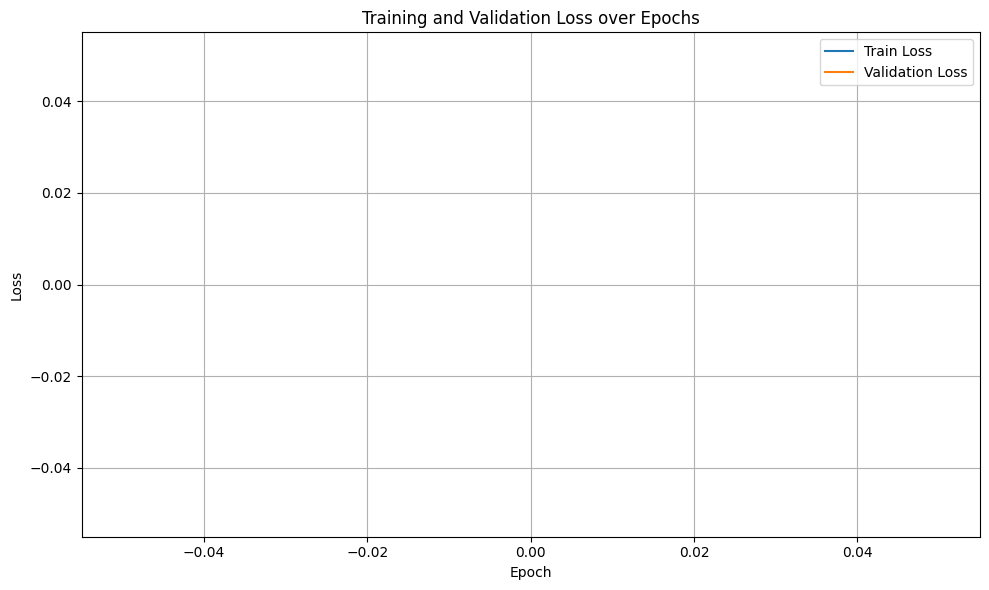


⚖️ Weight Distribution for activation=linear


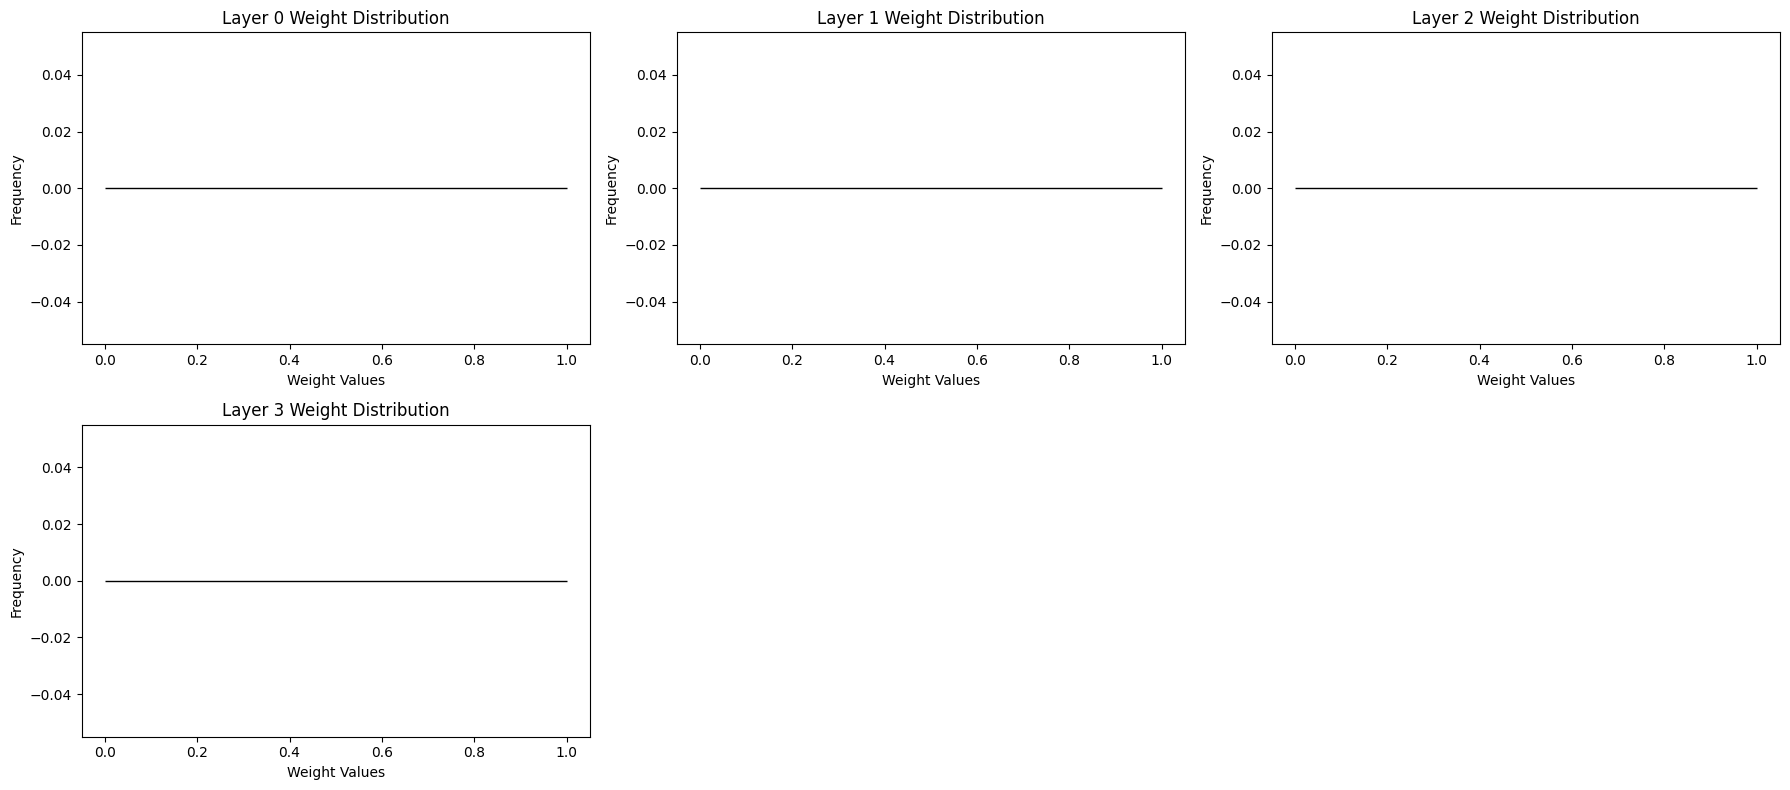


🌀 Gradient Distribution for activation=linear


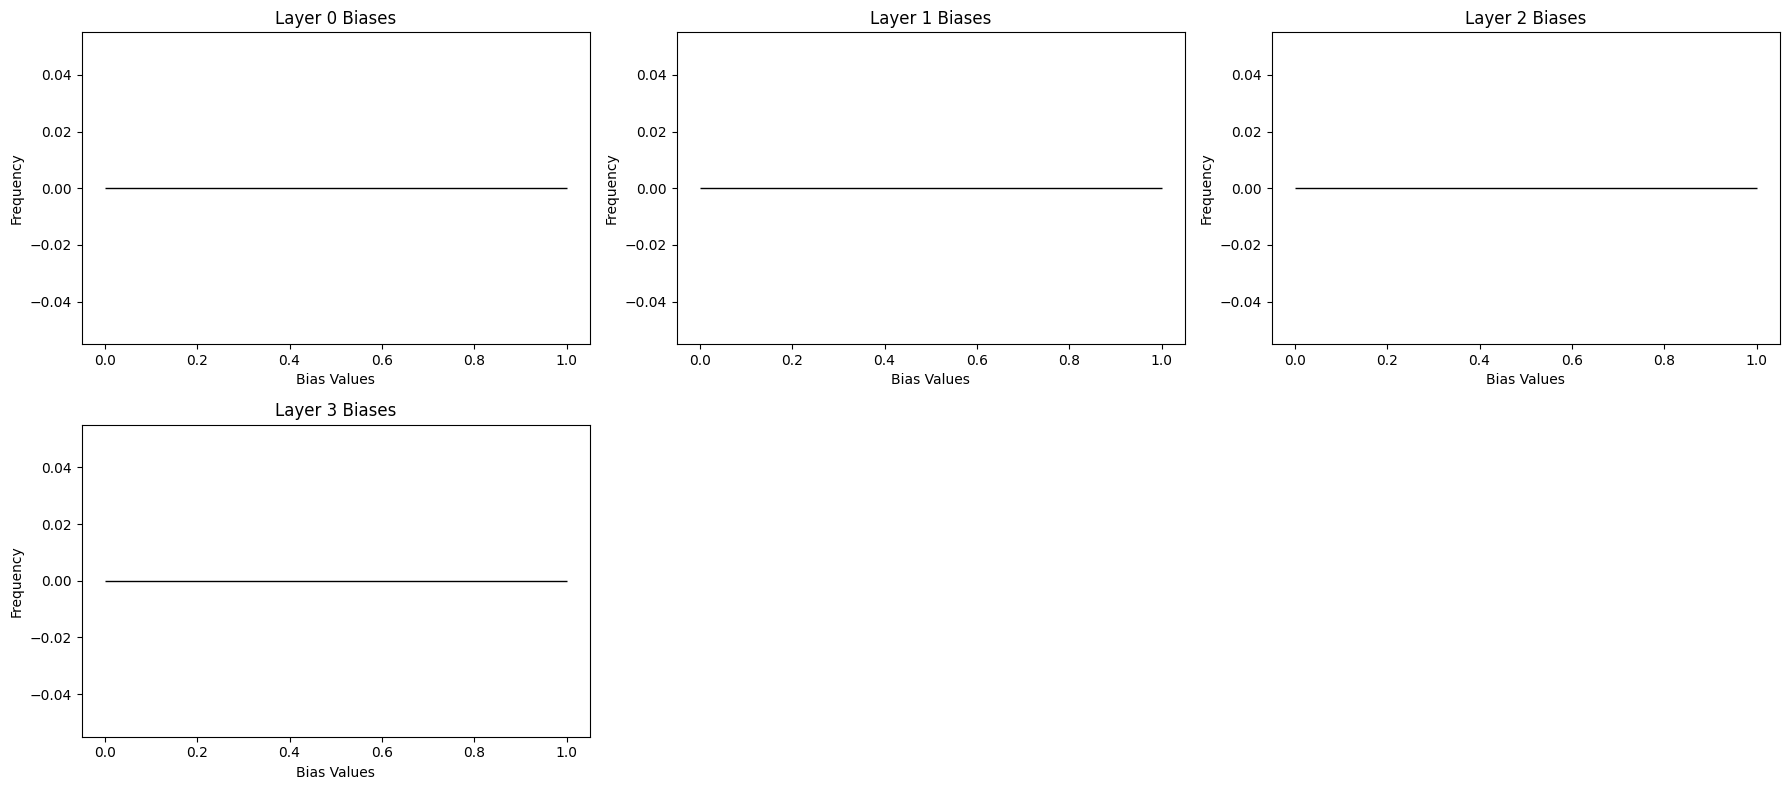


🚀 Running for activation function: relu


/Users/denisefeliciatiowanni/Desktop/uni/S03E02/IF3270 ML/ML-Tubes1-K33/src/basic/FFNN_basic_class.py:243: RuntimeWarning: overflow encountered in matmul
  z = activations[-1] @ layer.weights + layer.biases # @ itu dot product
/Users/denisefeliciatiowanni/Desktop/uni/S03E02/IF3270 ML/ML-Tubes1-K33/src/basic/FFNN_basic_class.py:243: RuntimeWarning: invalid value encountered in matmul
  z = activations[-1] @ layer.weights + layer.biases # @ itu dot product


Accuracy: 0.0986
Predictions: [0 0 0 0 0 0 0 0 0 0]
Target: [2 9 0 0 4 3 2 9 0 4]

📈 Loss Curve for activation=relu


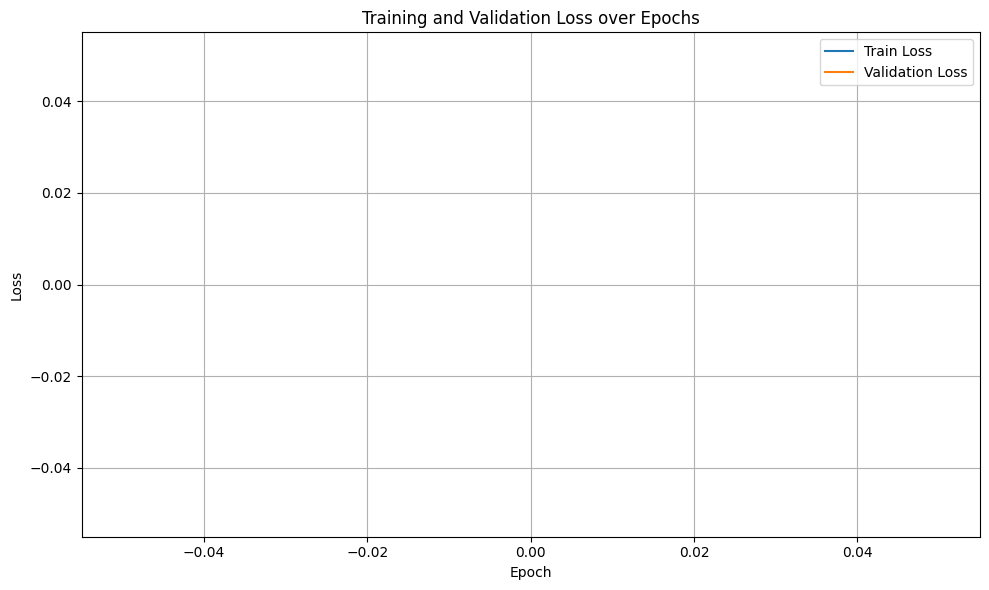


⚖️ Weight Distribution for activation=relu


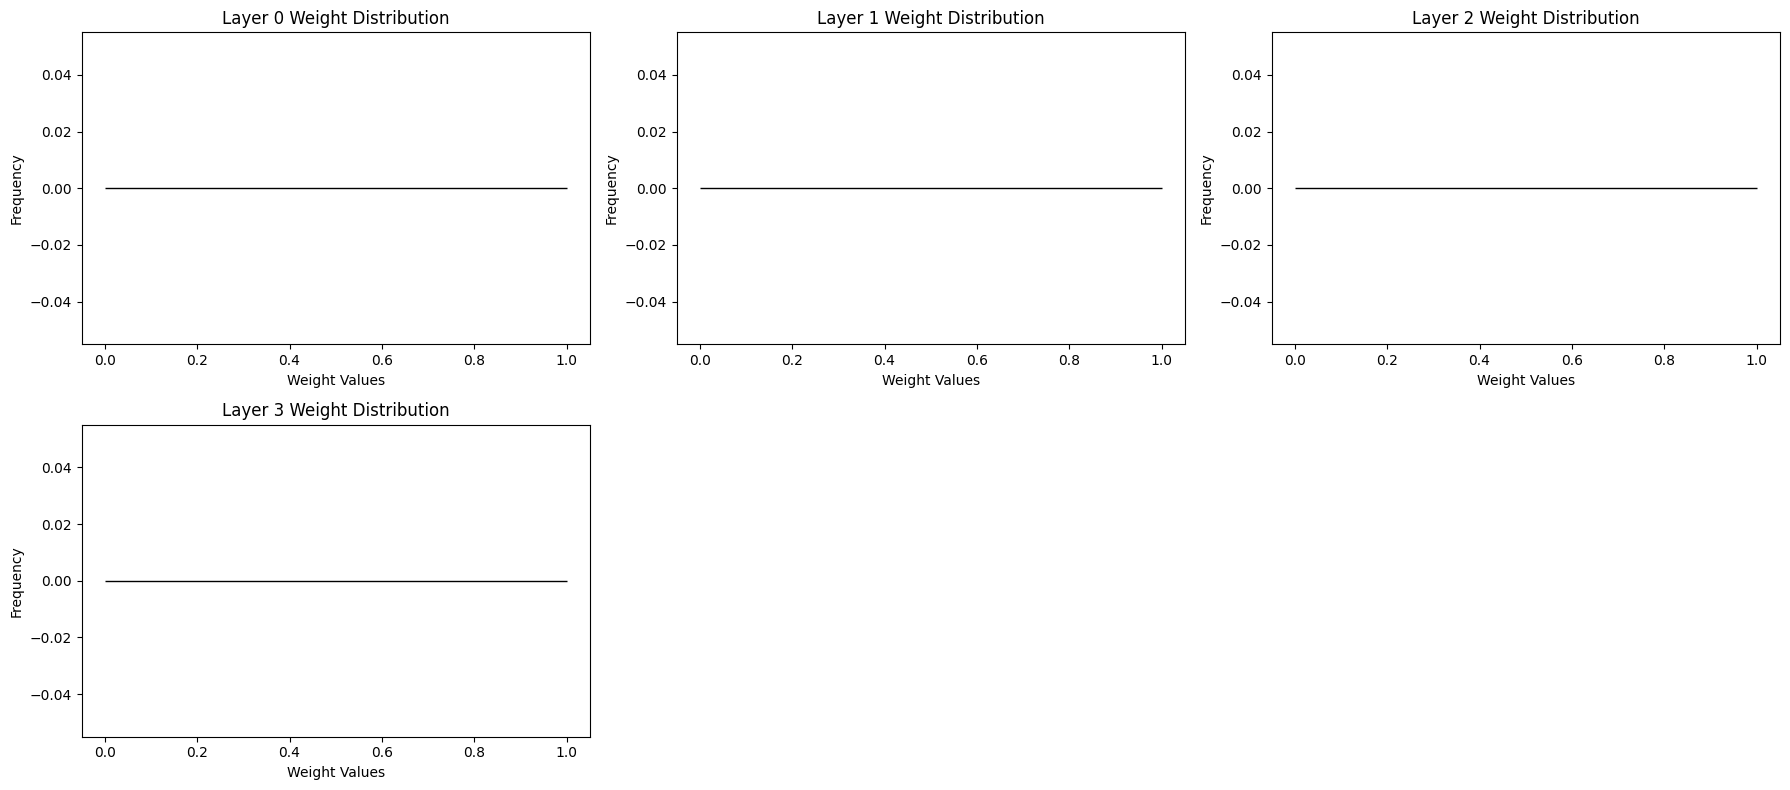


🌀 Gradient Distribution for activation=relu


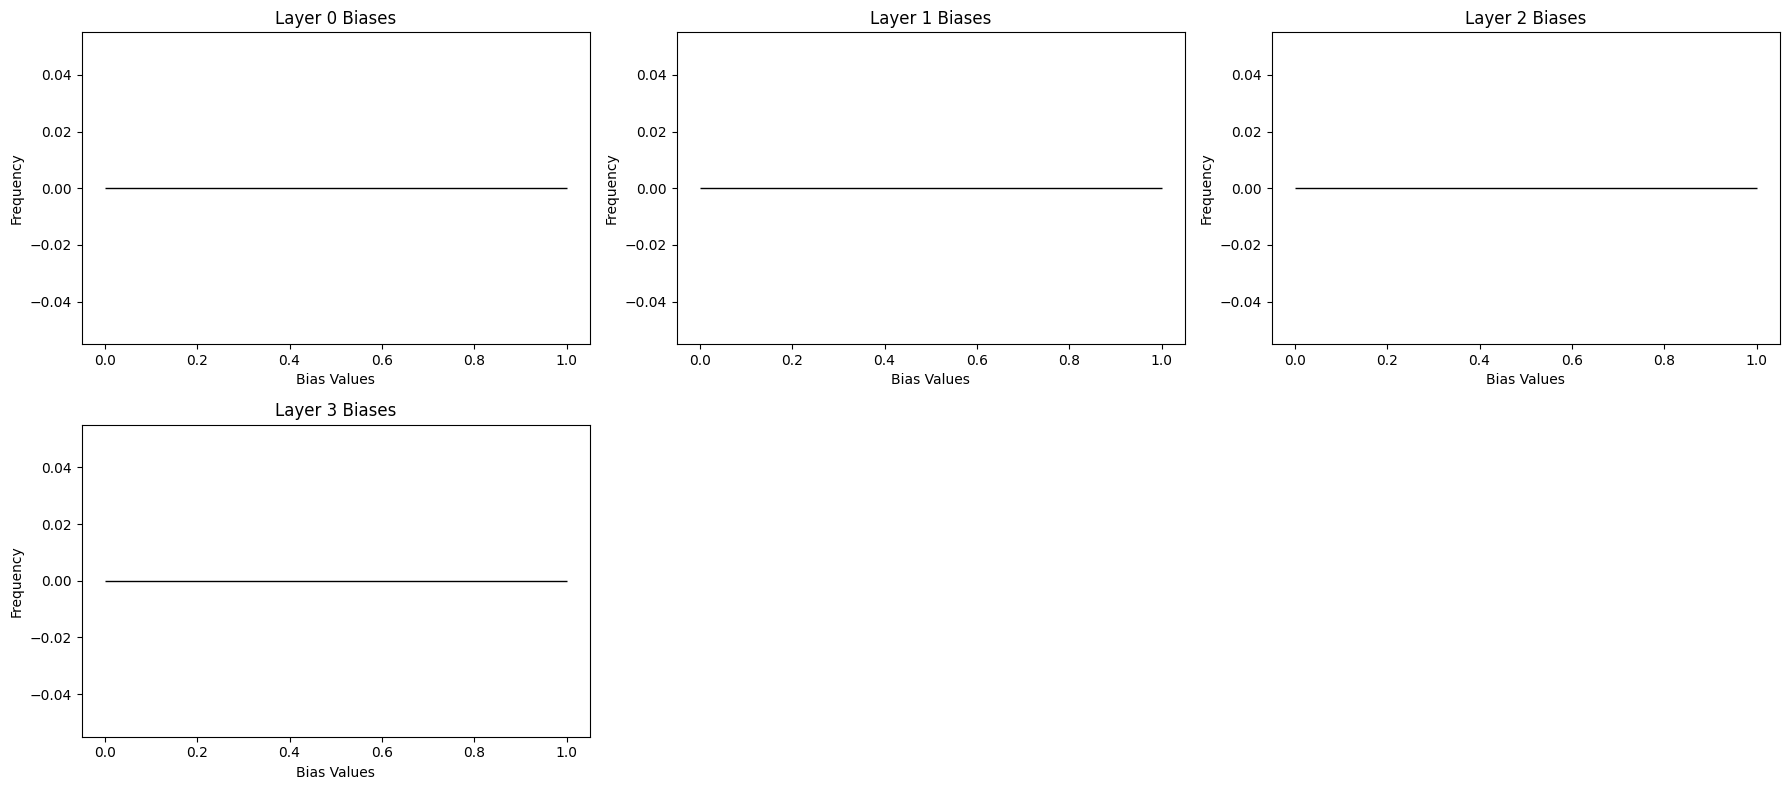


🚀 Running for activation function: leaky_relu


/Users/denisefeliciatiowanni/Desktop/uni/S03E02/IF3270 ML/ML-Tubes1-K33/src/basic/FFNN_basic_class.py:278: RuntimeWarning: overflow encountered in matmul
  delta = (delta @ self.layers[i].weights.T) * self.layers[i - 1].activation_derivative(zs[i - 1])
/Users/denisefeliciatiowanni/Desktop/uni/S03E02/IF3270 ML/ML-Tubes1-K33/src/basic/FFNN_basic_class.py:265: RuntimeWarning: invalid value encountered in matmul
  grad_w = (a_prev.T @ delta) / m


Accuracy: 0.0986
Predictions: [0 0 0 0 0 0 0 0 0 0]
Target: [2 9 0 0 4 3 2 9 0 4]

📈 Loss Curve for activation=leaky_relu


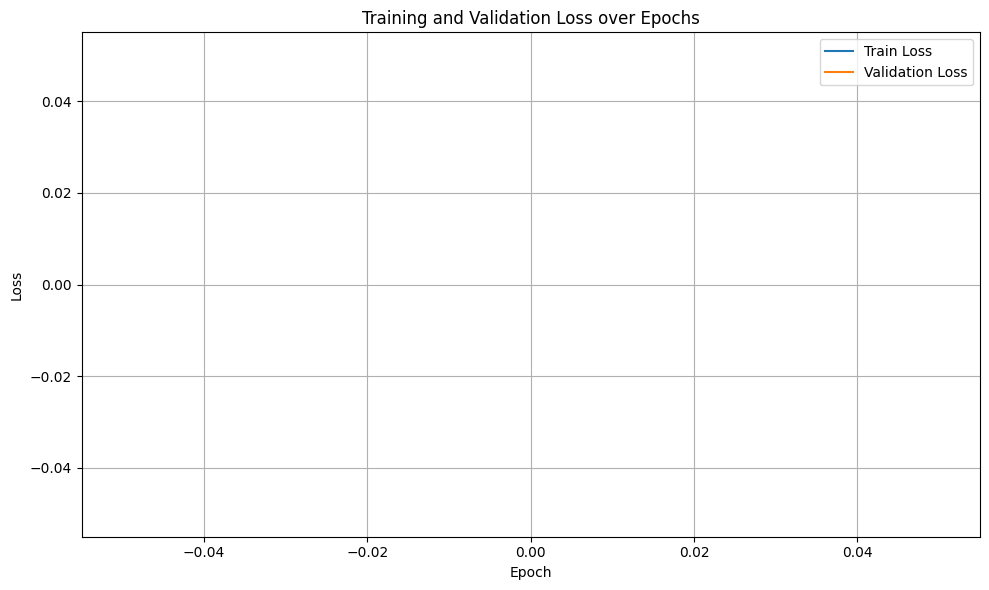


⚖️ Weight Distribution for activation=leaky_relu


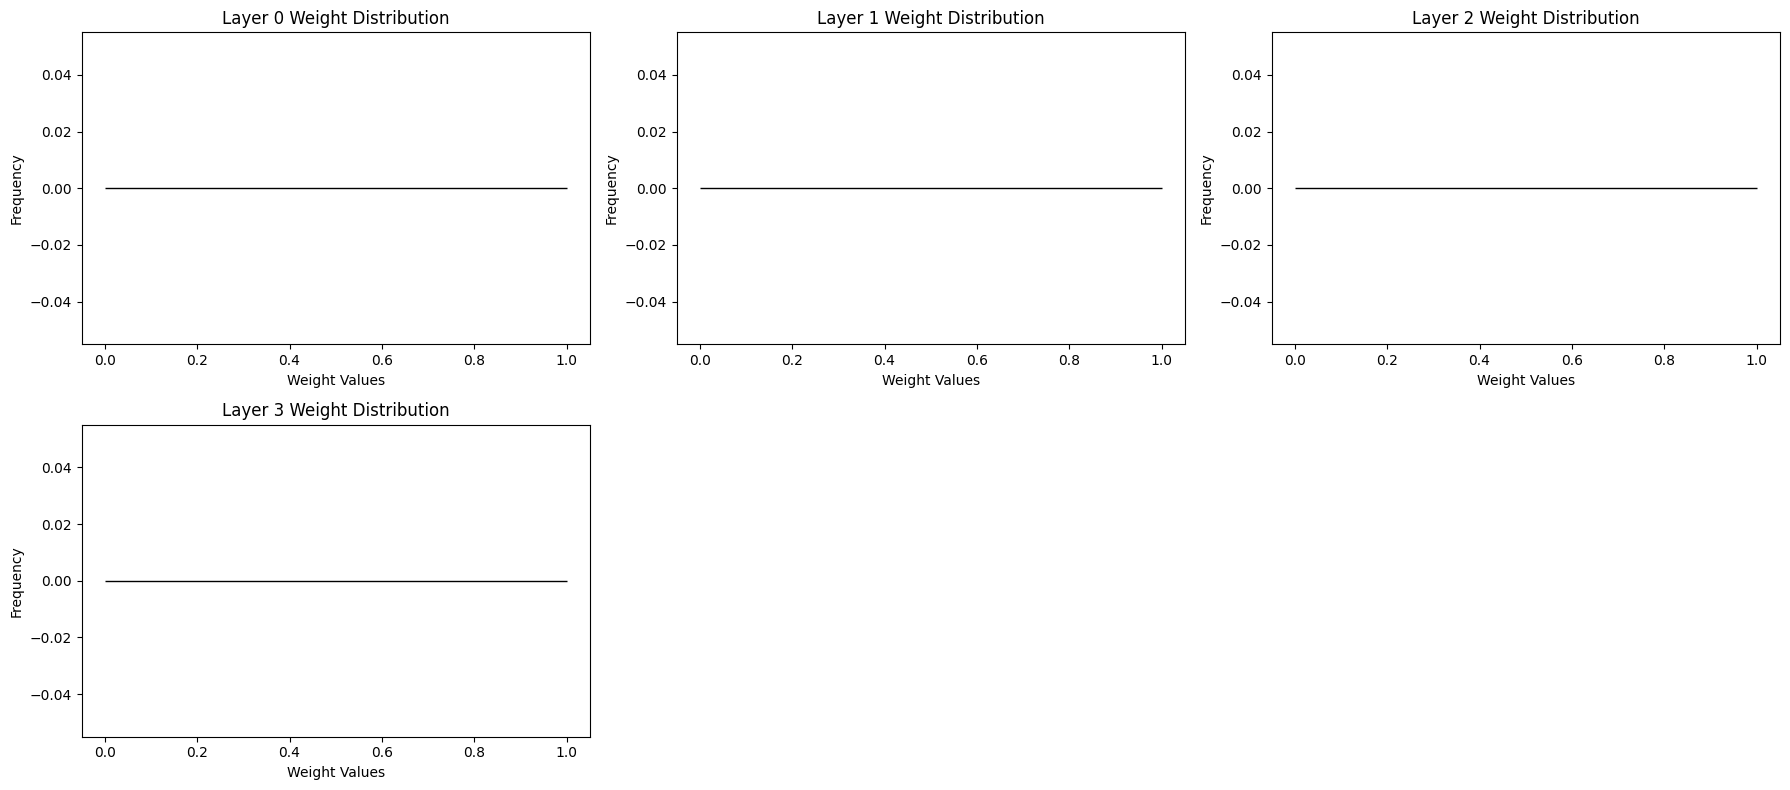


🌀 Gradient Distribution for activation=leaky_relu


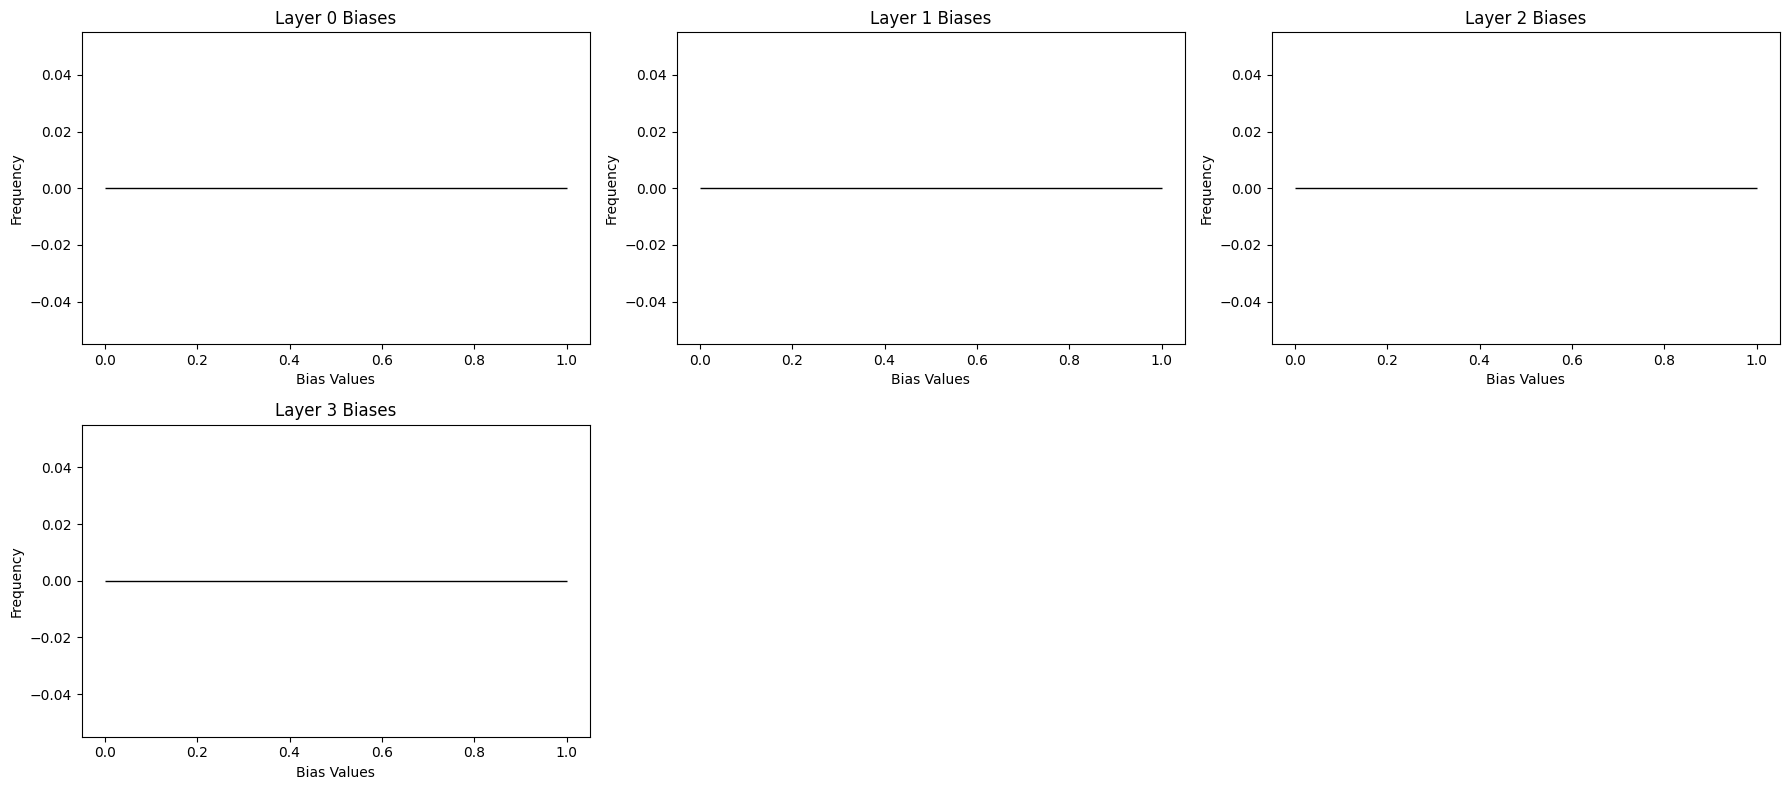


🚀 Running for activation function: elu


/Users/denisefeliciatiowanni/Desktop/uni/S03E02/IF3270 ML/ML-Tubes1-K33/src/basic/FFNN_basic_class.py:158: RuntimeWarning: overflow encountered in exp
  return np.where(x > 0, x, 0.01 * (np.exp(x) - 1))
/Users/denisefeliciatiowanni/Desktop/uni/S03E02/IF3270 ML/ML-Tubes1-K33/src/basic/FFNN_basic_class.py:181: RuntimeWarning: overflow encountered in exp
  return np.where(x > 0, 1, alpha * np.exp(x))
/Users/denisefeliciatiowanni/Desktop/uni/S03E02/IF3270 ML/ML-Tubes1-K33/src/basic/FFNN_basic_class.py:243: RuntimeWarning: overflow encountered in matmul
  z = activations[-1] @ layer.weights + layer.biases # @ itu dot product
/Users/denisefeliciatiowanni/Desktop/uni/S03E02/IF3270 ML/ML-Tubes1-K33/src/basic/FFNN_basic_class.py:278: RuntimeWarning: invalid value encountered in multiply
  delta = (delta @ self.layers[i].weights.T) * self.layers[i - 1].activation_derivative(zs[i - 1])


Accuracy: 0.0986
Predictions: [0 0 0 0 0 0 0 0 0 0]
Target: [2 9 0 0 4 3 2 9 0 4]

📈 Loss Curve for activation=elu


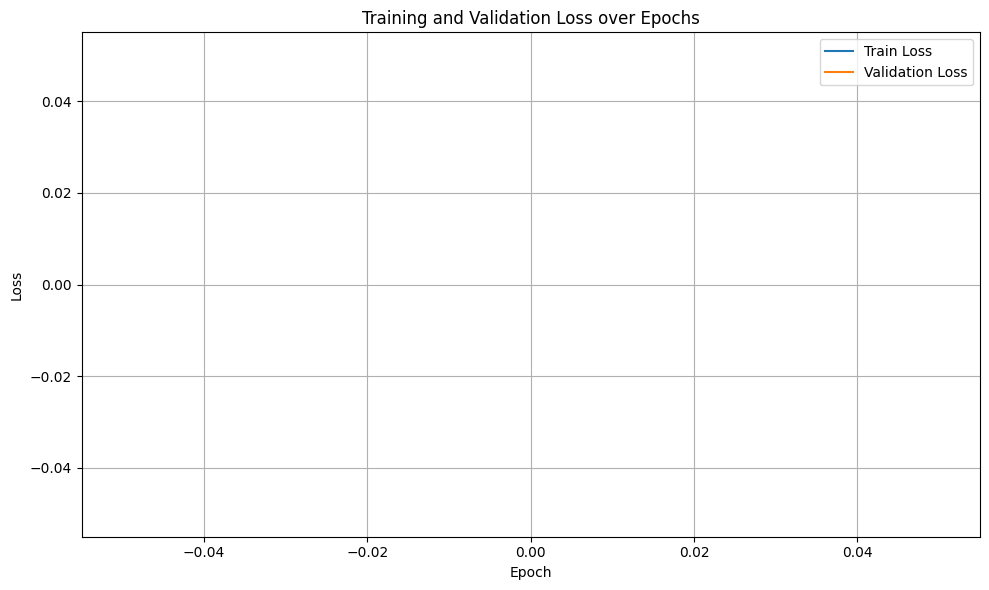


⚖️ Weight Distribution for activation=elu


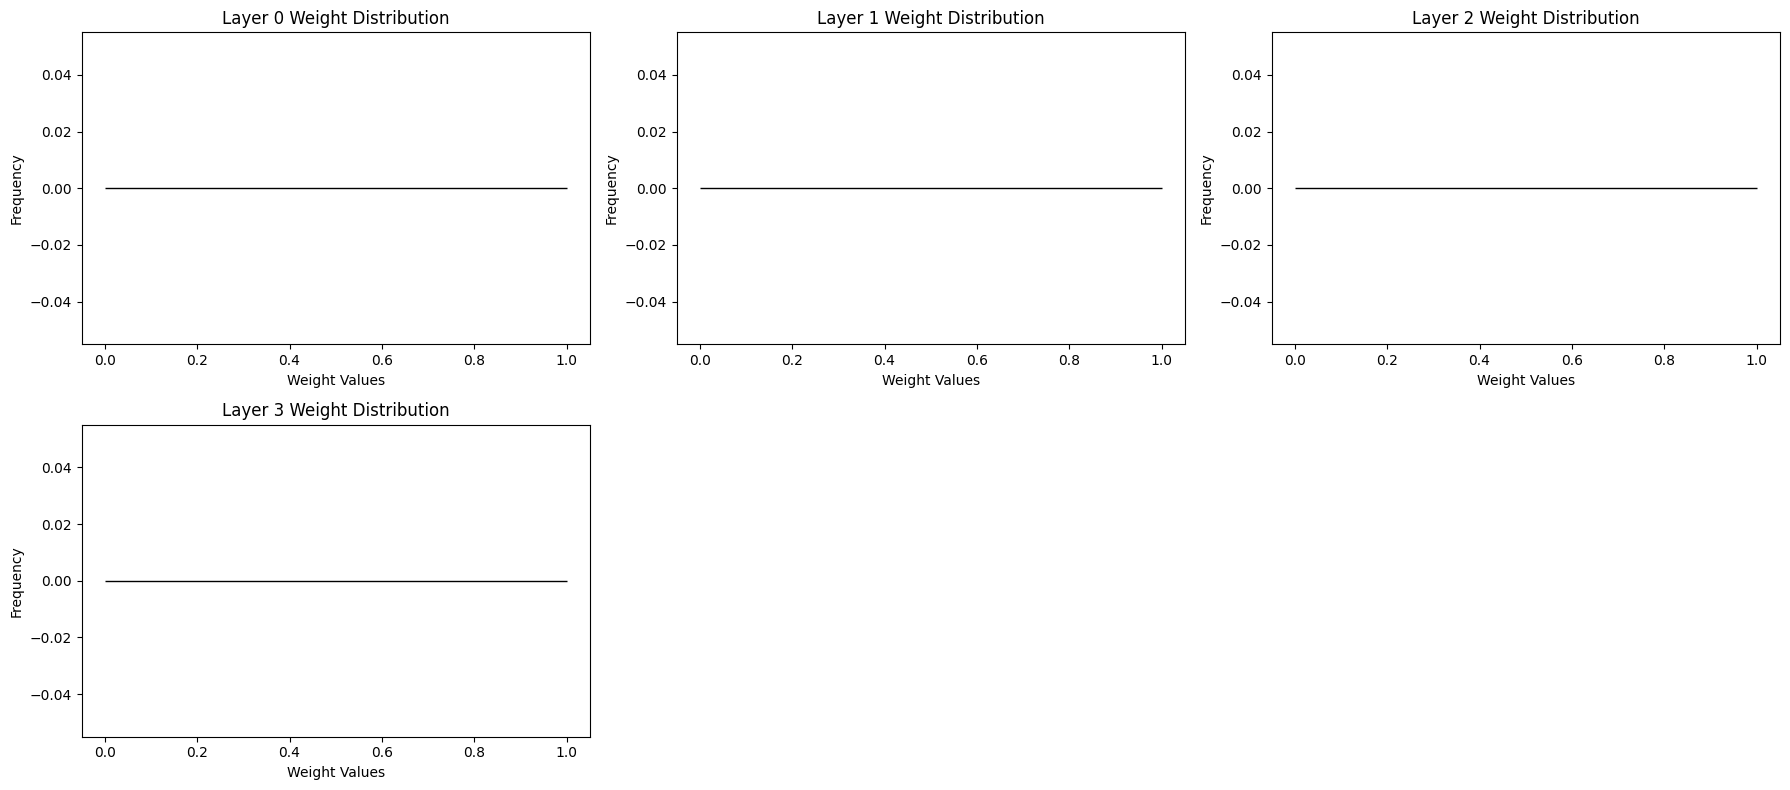


🌀 Gradient Distribution for activation=elu


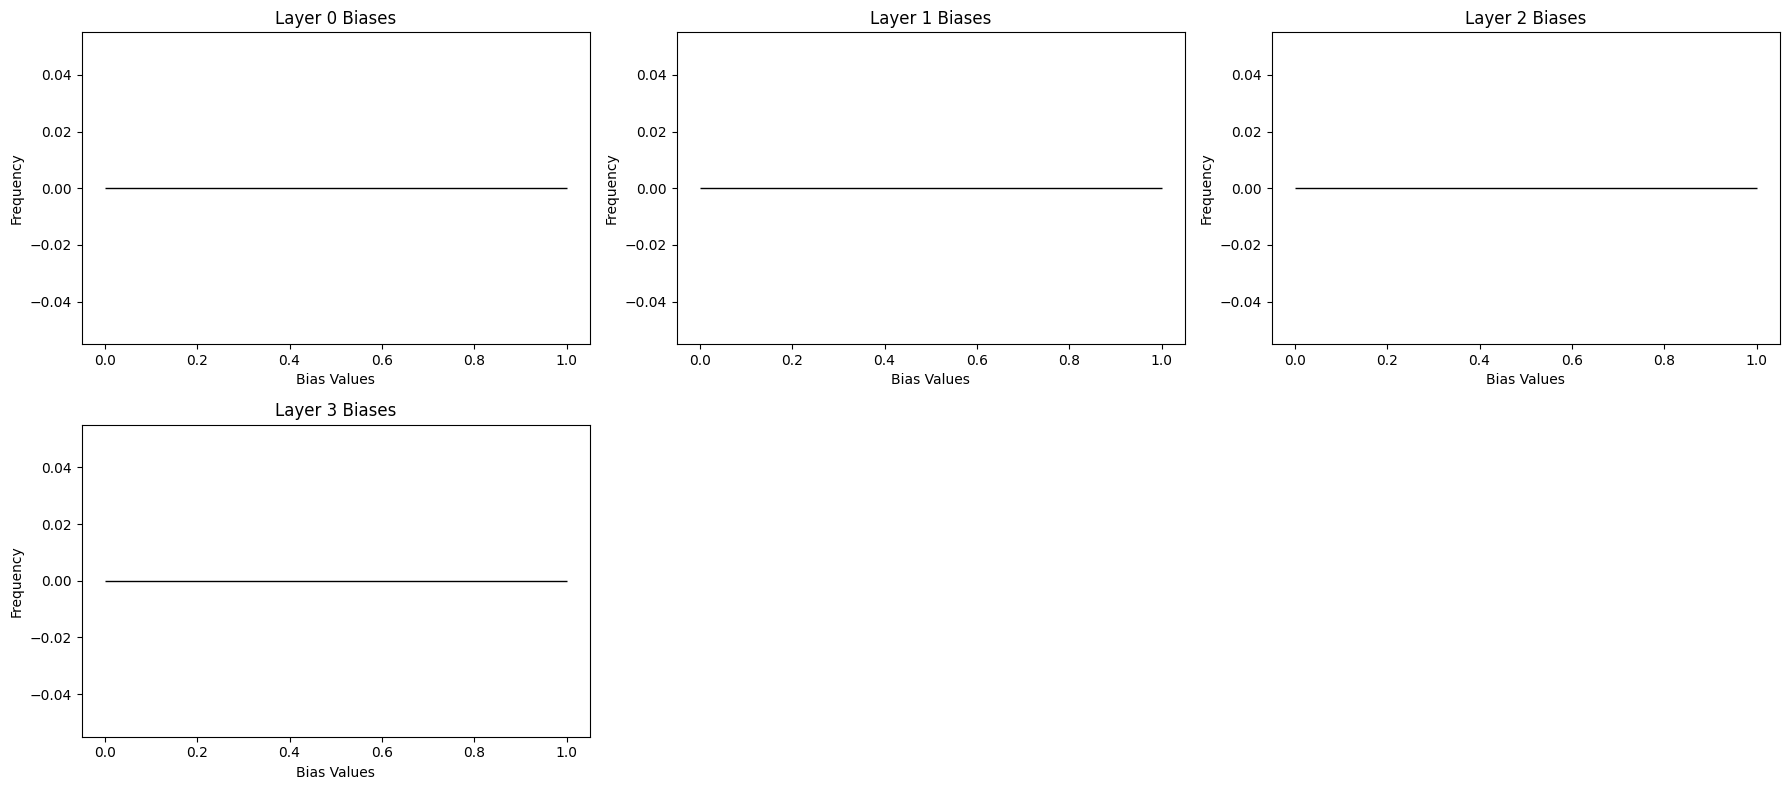


🚀 Running for activation function: sigmoid
Accuracy: 0.8936
Predictions: [5 9 0 0 4 3 2 7 0 4]
Target: [2 9 0 0 4 3 2 9 0 4]

📈 Loss Curve for activation=sigmoid


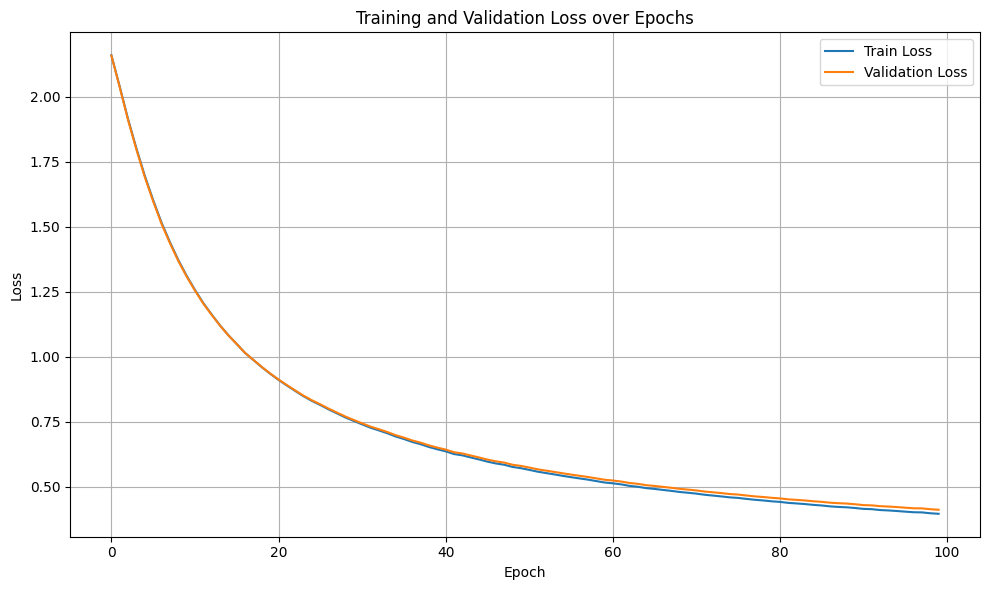


⚖️ Weight Distribution for activation=sigmoid


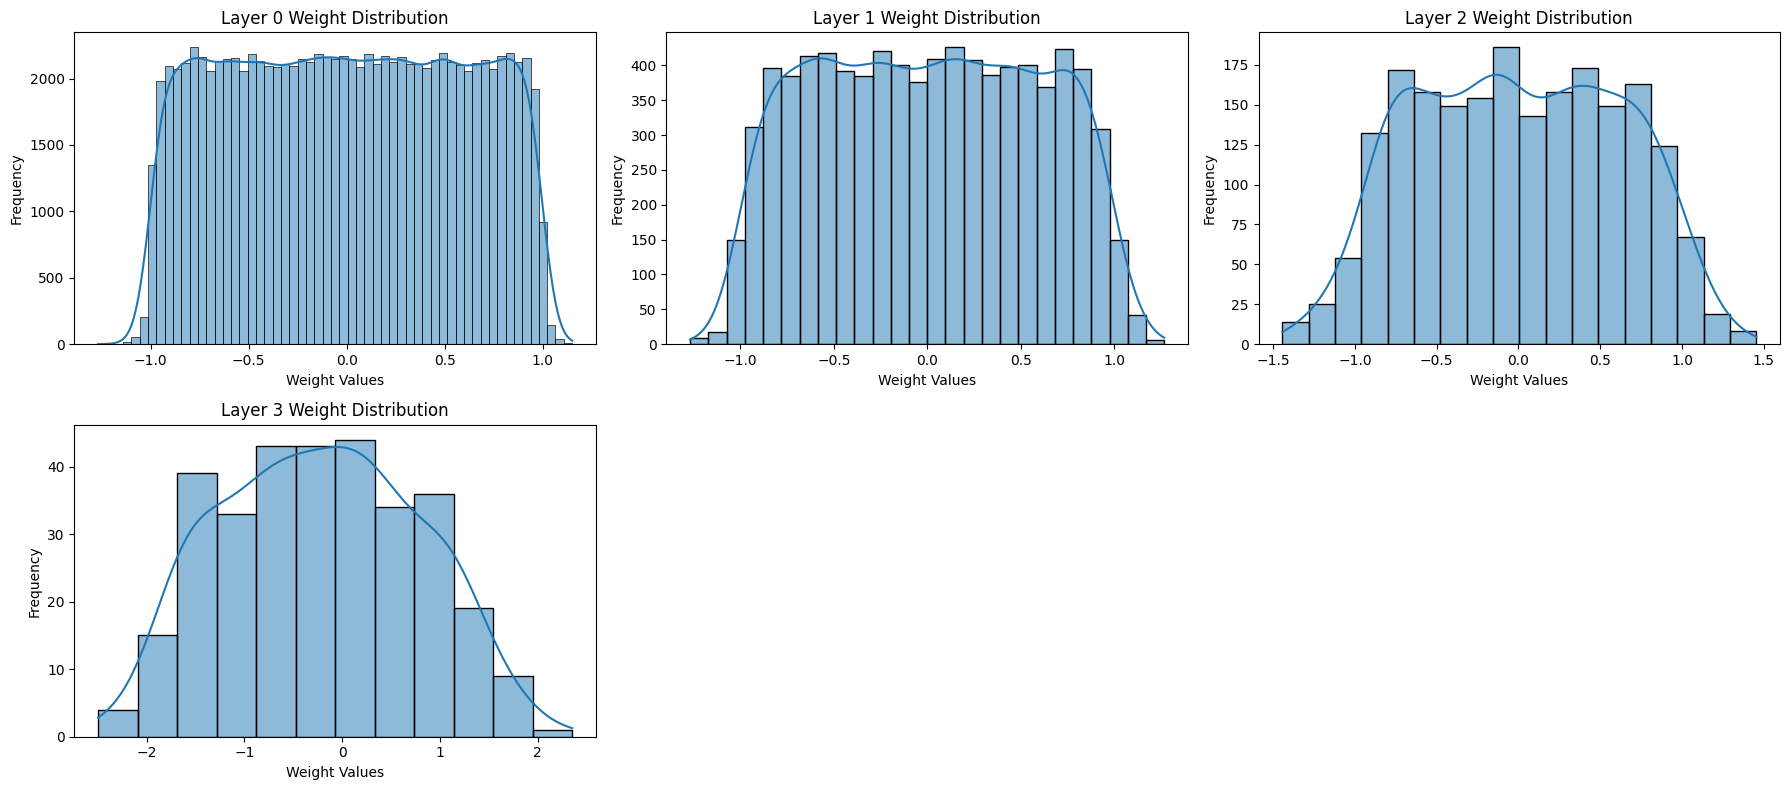


🌀 Gradient Distribution for activation=sigmoid


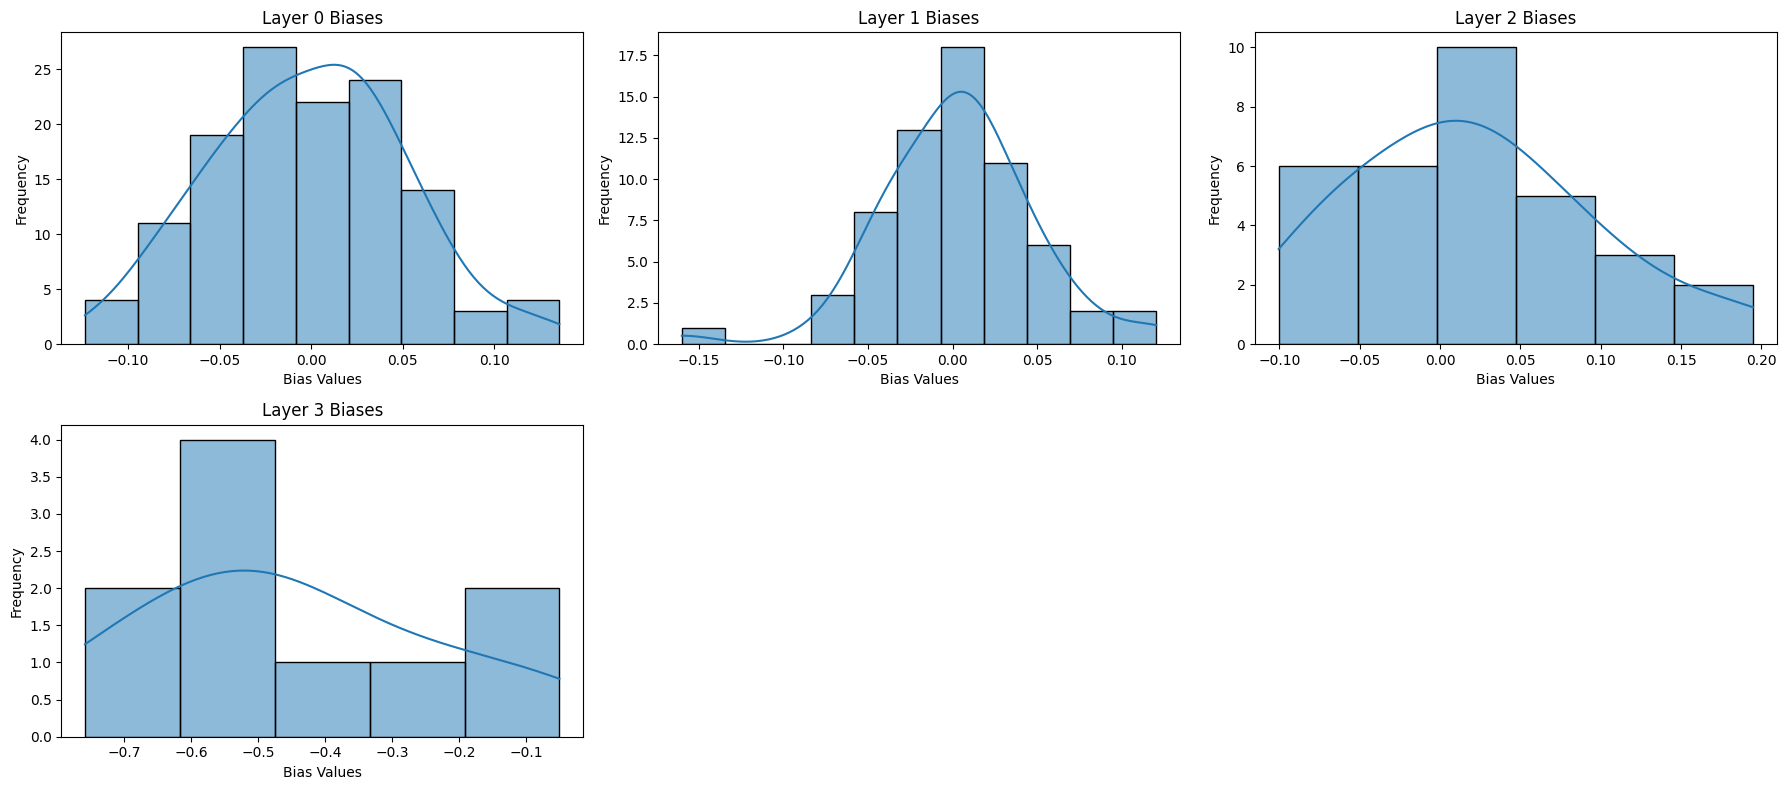


🚀 Running for activation function: tanh
Accuracy: 0.4828
Predictions: [6 6 0 0 9 3 6 3 0 6]
Target: [2 9 0 0 4 3 2 9 0 4]

📈 Loss Curve for activation=tanh


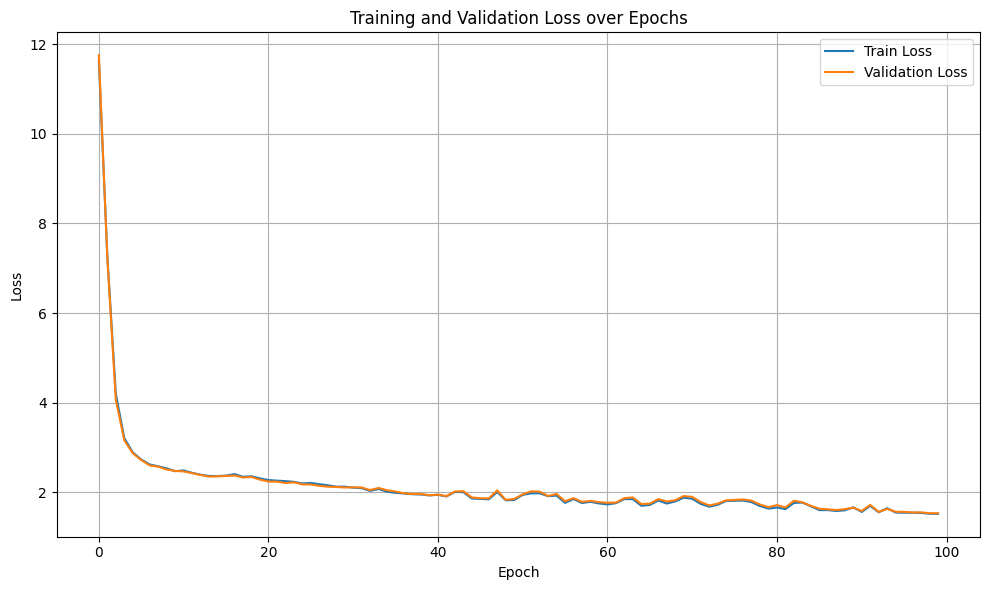


⚖️ Weight Distribution for activation=tanh


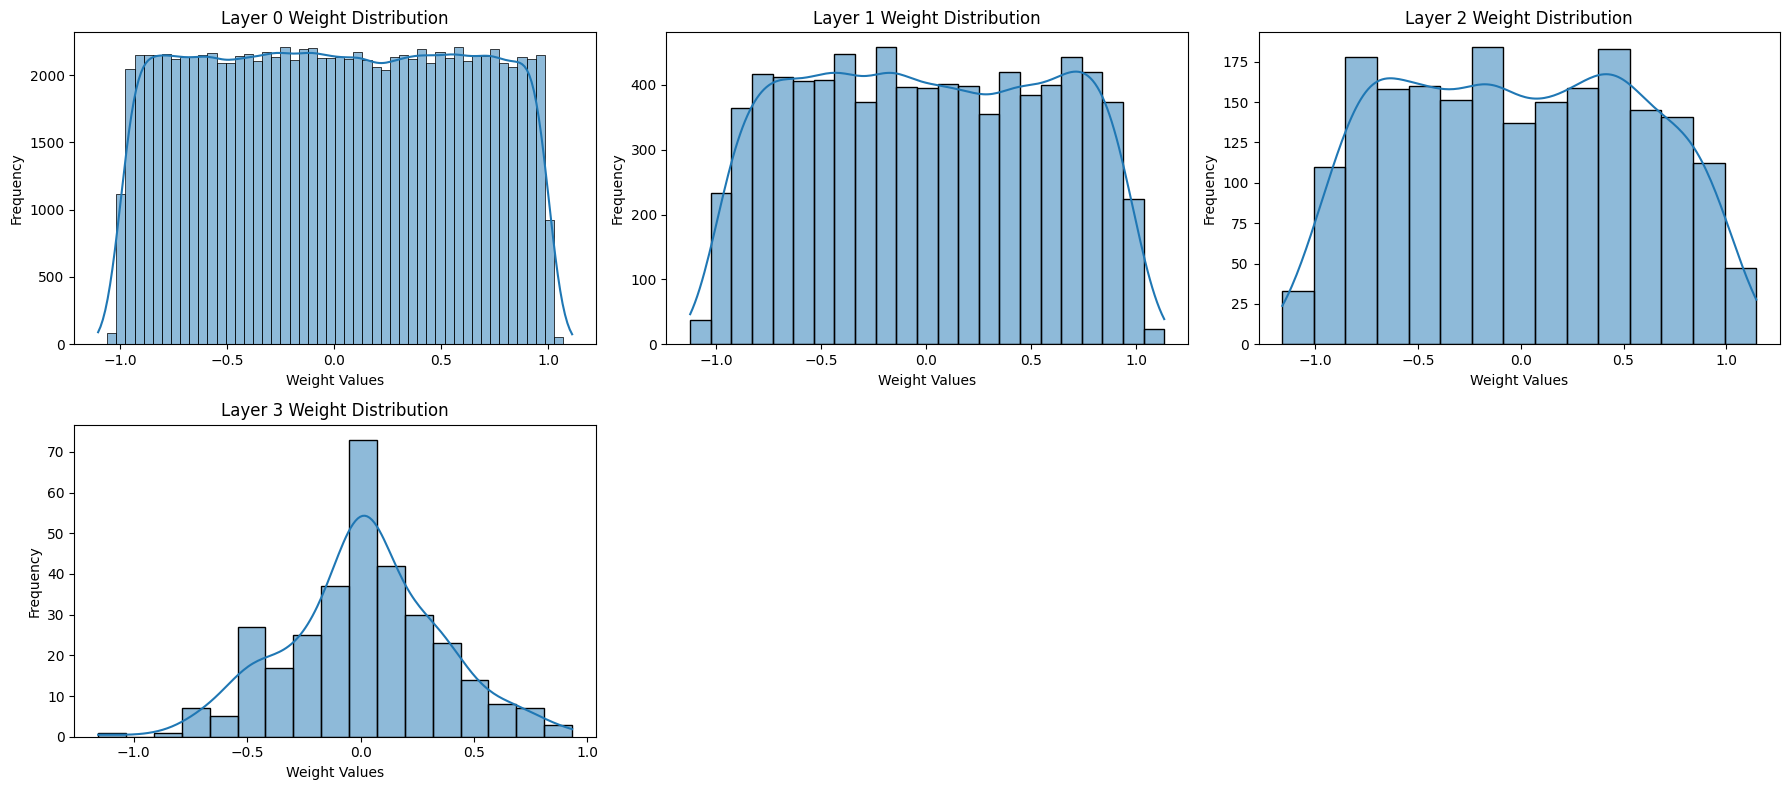


🌀 Gradient Distribution for activation=tanh


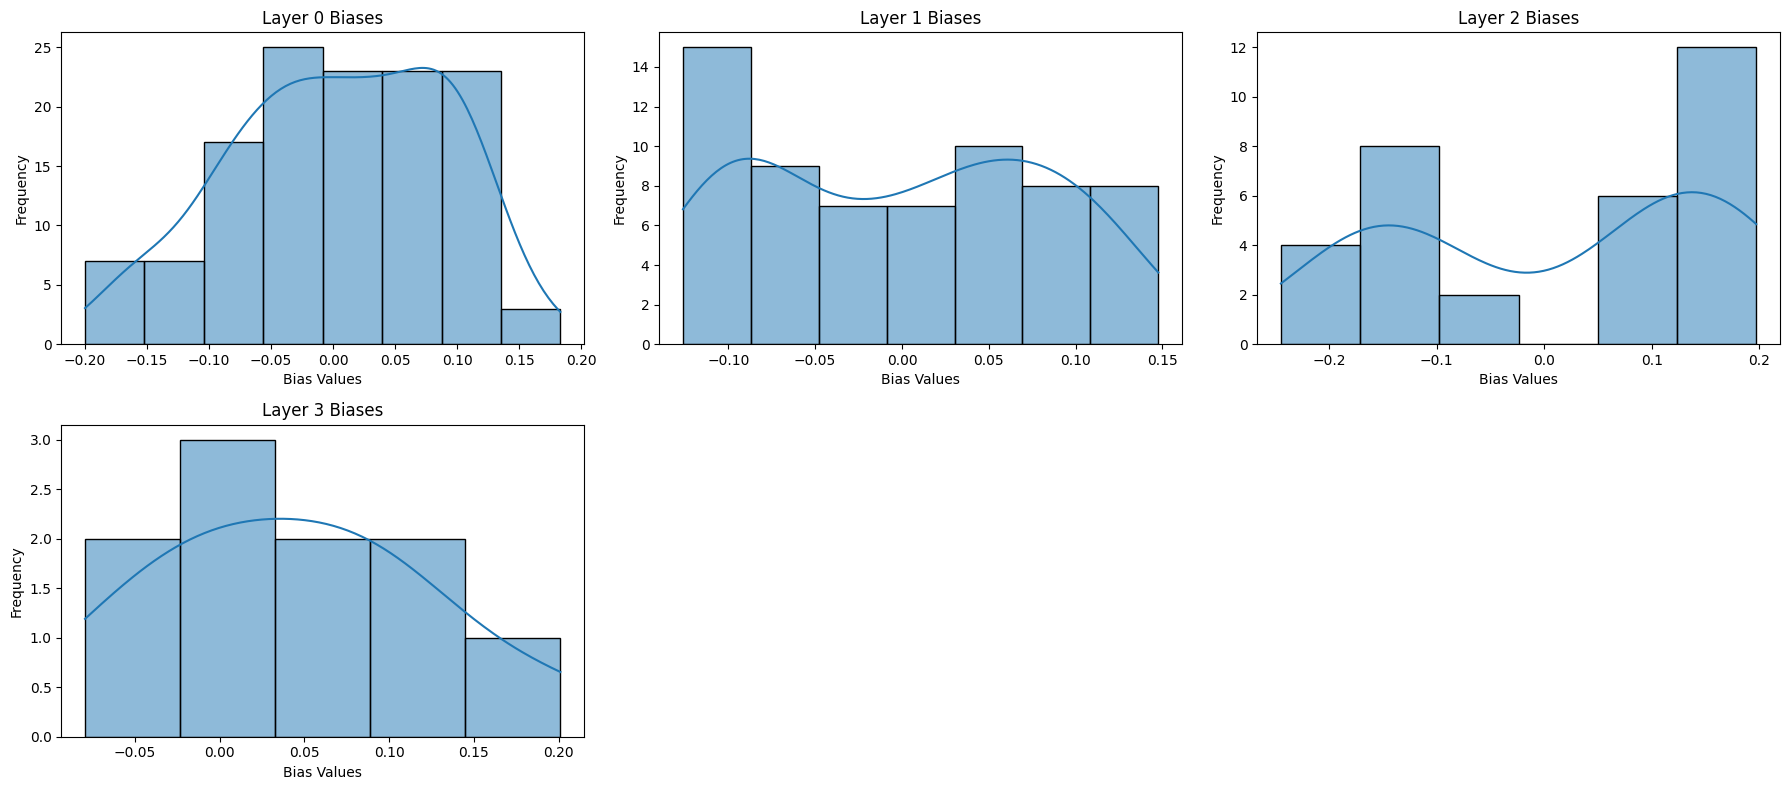

In [ ]:
def run_activation_experiment(activation_function):
    model = FFNN(
        loss='cce',
        batch_size=200,
        learning_rate=0.01,
        epochs=100,
        verbose=0
    )

    model.build_layers(
        Layer(n_neurons=128, init='uniform', activation=activation_function),
        Layer(n_neurons=64, init='uniform', activation=activation_function),
        Layer(n_neurons=32, init='uniform', activation=activation_function),
        Layer(n_neurons=10, init='uniform', activation=activation_function)
    )

    model.fit(X_train, y_train, X_val=X_val, y_val=y_val)

    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)

    return model, accuracy, y_pred


# ------------------------ Run Semua Aktivasi ----------------------------

activation_functions = [
    'linear',
    'relu',
    'leaky_relu',
    'elu',
    'sigmoid',
    'tanh'
]

activation_results = {}

for act in activation_functions:
    print(f"\n🚀 Running for activation function: {act}")
    model, acc, preds = run_activation_experiment(act)

    activation_results[act] = {
        "model": model,
        "accuracy": acc,
        "preds": preds
    }

    print(f"Accuracy: {acc:.4f}")
    print(f"Predictions: {preds[:10]}")
    print(f"Target: {y_test[:10]}")

    print(f"\n📈 Loss Curve for activation={act}")
    model.plot_training_loss()
    plt.show()

    print(f"\n⚖️ Weight Distribution for activation={act}")
    model.plot_weight_distribution()
    plt.show()

    print(f"\n🌀 Gradient Distribution for activation={act}")
    model.plot_biases_distribution()
    plt.show()